In [1]:
#Importing Libraries
from keras.preprocessing.image import ImageDataGenerator
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
from keras.preprocessing import image
from keras.models import Sequential,save_model
from keras.layers import *
from keras import Model
from keras.utils.vis_utils import plot_model
from keras.optimizers import *
from keras import regularizers
from keras.callbacks import LearningRateScheduler

In [2]:
from google.colab import drive
drive.mount('/content/drive' )

Mounted at /content/drive


In [ ]:
df_stds_7sensors=pd.read_csv('/content/drive/MyDrive/internship/train_raw_new.csv')
print(df_stds_7sensors.shape)
df_stds_7sensors.head()

(6400, 8)


MQ2  MQ3  MQ5  MQ6  MQ7  MQ8  MQ135   Gas
0  555  515  377  338  666  451    416  Null
1  555  516  377  339  666  451    416  Null
2  556  517  376  337  666  451    416  Null
3  556  516  376  336  665  451    416  Null
4  556  516  376  337  665  451    416  Null

In [ ]:
df_stds_7sensors['Gas']=df_stds_7sensors['Gas'].astype('category').cat.codes
df_stds_7sensors.head()

MQ2  MQ3  MQ5  MQ6  MQ7  MQ8  MQ135  Gas
0  555  515  377  338  666  451    416    1
1  555  516  377  339  666  451    416    1
2  556  517  376  337  666  451    416    1
3  556  516  376  336  665  451    416    1
4  556  516  376  337  665  451    416    1

In [ ]:
df_stds_sensors=df_stds_7sensors.iloc[:,:7]
df_stds_sensors.head()

MQ2  MQ3  MQ5  MQ6  MQ7  MQ8  MQ135
0  555  515  377  338  666  451    416
1  555  516  377  339  666  451    416
2  556  517  376  337  666  451    416
3  556  516  376  336  665  451    416
4  556  516  376  337  665  451    416

In [ ]:
seq=[]
for i,row in df_stds_sensors.iterrows():
    row1=np.array(row)
    row1=np.round(row1,decimals=3)
    seq.append(row1)
new_seq = pd.DataFrame(seq)
print(new_seq.shape)
new_seq.head()

(6400, 7)


0    1    2    3    4    5    6
0  555  515  377  338  666  451  416
1  555  516  377  339  666  451  416
2  556  517  376  337  666  451  416
3  556  516  376  336  665  451  416
4  556  516  376  337  665  451  416

In [ ]:
image_folder = "/content/drive/MyDrive/Thermal Cam Data/train_set"
image_generator32 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        image_folder, shuffle=False, class_mode='sparse',
        target_size=(32, 32),batch_size=6400)
image_generator32.class_indices

Found 6400 images belonging to 4 classes.


{'Null': 0, 'Perfume': 1, 'Smoke': 2, 'theMixture': 3}

In [ ]:
image_folder = "/content/drive/MyDrive/Thermal Cam Data/train_set"
image_generator128 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        image_folder, shuffle=False, class_mode='sparse',
        target_size=(128, 128),batch_size=6400)
image_generator128.class_indices

Found 6400 images belonging to 4 classes.


{'Null': 0, 'Perfume': 1, 'Smoke': 2, 'theMixture': 3}

In [ ]:
image_folder = "D:/Internship/extracted/train_set"
image_generator64 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        image_folder, shuffle=False, class_mode='sparse',
        target_size=(64, 64),batch_size=6400)
image_generator64.class_indices

Found 6400 images belonging to 4 classes.


{'Null': 0, 'Perfume': 1, 'Smoke': 2, 'theMixture': 3}

In [ ]:
image_files = pd.Series(image_generator64.filenames)
image_files = image_files.str.split("\\", expand=True)[1].str[:-4]
image_files = list(image_files)
print(image_files)
mq2=np.array(df_stds_7sensors['MQ2'])
mq3=np.array(df_stds_7sensors['MQ3'])
mq5=np.array(df_stds_7sensors['MQ5'])
mq6=np.array(df_stds_7sensors['MQ6'])
mq7=np.array(df_stds_7sensors['MQ7'])
mq8=np.array(df_stds_7sensors['MQ8'])
mq135=np.array(df_stds_7sensors['MQ135'])
Gas=np.array(df_stds_7sensors['Gas'])

df_new=pd.DataFrame({'MQ2':mq2,'MQ3':mq3,'MQ5':mq5,'MQ6':mq6,'MQ7':mq7,'MQ8':mq8,'MQ135':mq135,'Gas':Gas},index=image_files)

df_new.head()

['image1000001', 'image1000008', 'image100001', 'image1000015', 'image1000022', 'image1000029', 'image100003', 'image1000036', 'image1000043', 'image100005', 'image1000050', 'image1000057', 'image1000064', 'image100007', 'image1000071', 'image1000078', 'image1000085', 'image100009', 'image1000092', 'image1000099', 'image1000106', 'image100011', 'image1000113', 'image1000120', 'image1000127', 'image1000134', 'image1000141', 'image1000148', 'image1000155', 'image1000162', 'image1000169', 'image1000176', 'image1000183', 'image1000190', 'image1000197', 'image1000204', 'image1000260', 'image1000267', 'image100027', 'image1000274', 'image1000281', 'image1000288', 'image1000295', 'image1000302', 'image1000309', 'image1000316', 'image1000323', 'image1000330', 'image1000372', 'image1000379', 'image1000386', 'image1000393', 'image1000400', 'image1000407', 'image1000414', 'image1000421', 'image1000428', 'image100043', 'image1000435', 'image1000442', 'image1000449', 'image1000456', 'image1000463',

MQ2  MQ3  MQ5  MQ6  MQ7  MQ8  MQ135  Gas
image1000001  555  515  377  338  666  451    416    1
image1000008  555  516  377  339  666  451    416    1
image100001   556  517  376  337  666  451    416    1
image1000015  556  516  376  336  665  451    416    1
image1000022  556  516  376  337  665  451    416    1

In [ ]:
images32, labels32 = next(image_generator32)

KeyboardInterrupt: ignored

In [ ]:
images128, labels128 = next(image_generator128)

In [ ]:
images64, labels64= next(image_generator64)

Text(0.5, 1.0, 'Ground Truth : 1.0')

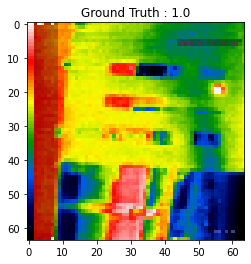

In [ ]:
plt.imshow(images64[3120,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(labels64[3120]))

In [ ]:
(trainAttrX, valAttrX, trainImagesX, valImagesX) = train_test_split(df_new, images32, test_size=0.20, random_state=42)
(valAttrX, testAttrX, valImagesX, testImagesX) = train_test_split(valAttrX, valImagesX, test_size=0.50, random_state=42)
print(trainAttrX.shape)
print(valAttrX.shape)
print(testAttrX.shape)
print(trainImagesX.shape)
print(valImagesX.shape)
print(testImagesX.shape)

(5120, 8)
(640, 8)
(640, 8)
(5120, 32, 32, 3)
(640, 32, 32, 3)
(640, 32, 32, 3)


In [ ]:
(trainAttrX, valAttrX, trainImagesX, valImagesX) = train_test_split(df_new, images128, test_size=0.20, random_state=42)
(valAttrX, testAttrX, valImagesX, testImagesX) = train_test_split(valAttrX, valImagesX, test_size=0.50, random_state=42)
print(trainAttrX.shape)
print(valAttrX.shape)
print(testAttrX.shape)
print(trainImagesX.shape)
print(valImagesX.shape)
print(testImagesX.shape)

(5120, 8)
(640, 8)
(640, 8)
(5120, 128, 128, 3)
(640, 128, 128, 3)
(640, 128, 128, 3)


In [ ]:
#(trainAttrX, valAttrX, trainImagesX, valImagesX) = train_test_split(df_new, images64, test_size=0.20, random_state=42)
#(valAttrX, testAttrX, valImagesX, testImagesX) = train_test_split(valAttrX, valImagesX, test_size=0.50, random_state=42)
print(trainAttrX.shape)
print(valAttrX.shape)
print(testAttrX.shape)
print(trainImagesX.shape)
print(valImagesX.shape)
print(testImagesX.shape)

NameError: ignored

In [ ]:
f1.close()
f2.close()

NameError: ignored

In [ ]:

import h5py
f1 =h5py.File('data32x32.hdf5','w')
dset1 = f1.create_dataset("trainImagesX", (5120,32,32,3), dtype='f', data=trainImagesX)
dset2 = f1.create_dataset("valImagesX", (640,32,32,3), dtype='f', data=valImagesX)
dset3 = f1.create_dataset("testImagesX", (640,32,32,3), dtype='f', data=testImagesX)
dset4 = f1.create_dataset("trainAttrX_new", (5120,7,1), dtype='i', data=trainAttrX_new)
dset5 = f1.create_dataset("valAttrX_new", (640,7,1), dtype='i', data=valAttrX_new)
dset6 = f1.create_dataset("testAttrX_new", (640,7,1), dtype='i', data=testAttrX_new)
dset7 = f1.create_dataset("trainY_new", (5120,), dtype='i', data=trainY_new)
dset8 = f1.create_dataset("valY_new", (640,), dtype='i', data=valY_new)
dset9 = f1.create_dataset("testY_new", (640,), dtype='i', data=testY_new)

OSError: ignored

In [3]:
import h5py
f2 = h5py.File('/content/drive/MyDrive/internship/data64x64.hdf5', 'r')
list(f2.keys())

trainImagesX= f2['trainImagesX']
trainImagesX=trainImagesX[:]

valImagesX= f2['valImagesX']
valImagesX=valImagesX[:]

testImagesX= f2['testImagesX']
testImagesX=testImagesX[:]

trainAttrX_new= f2['trainAttrX_new']
trainAttrX_new=trainAttrX_new[:]

valAttrX_new= f2['valAttrX_new']
valAttrX_new=valAttrX_new[:]

testAttrX_new= f2['testAttrX_new']
testAttrX_new=testAttrX_new[:]

trainY_new=f2['trainY_new']
trainY_new=trainY_new[:]

valY_new= f2['valY_new']
valY_new=valY_new[:]

testY_new= f2['testY_new']
testY_new=testY_new[:]


In [ ]:
np.savetxt("trainImagesX.txt",trainImagesX)

np.savetxt("valImagesX.txt",valImagesX)

np.savetxt("testImagesX.txt",testImagesX)

np.savetxt("trainAttrX_new.txt",trainAttrX_new)

np.savetxt("valAttrX_new.txt",valAttrX_new)

np.savetxt("valAttrX_new.txt",valAttrX_new)



ValueError: ignored

In [ ]:
trainY = trainAttrX["Gas"]
valY = valAttrX["Gas"]
testY = testAttrX["Gas"]
valY.head()

image500092     1
image1600279    2
image2500418    3
mix1400631      0
image2915241    3
Name: Gas, dtype: int8

In [ ]:
trainAttrX=trainAttrX.drop(columns=['Gas'])
valAttrX=valAttrX.drop(columns=['Gas'])
testAttrX=testAttrX.drop(columns=['Gas'])
valAttrX.head()

MQ2  MQ3  MQ5  MQ6  MQ7  MQ8  MQ135
image500092   772  535  431  429  571  655    485
image1600279  722  523  459  461  673  729    486
image2500418  572  354  362  395  580  575    300
mix1400631    520  399  372  343  422  255    376
image2915241  711  415  308  343  597  613    349

In [ ]:
def create_array(arr):
    seq=[]
    for i,row in arr.iterrows():
        row1=np.array(row)
        row1=np.round(row1,decimals=3)
        seq.append(row1)
    seq=np.array(seq)
    return seq

In [ ]:
trainAttrX_new=create_array(trainAttrX)
valAttrX_new=create_array(valAttrX)
testAttrX_new=create_array(testAttrX)
print(trainAttrX_new.shape)
print(valAttrX_new.shape)
print(testAttrX_new.shape)

(5120, 7)
(640, 7)
(640, 7)


In [ ]:
trainAttrX_new=trainAttrX_new.reshape(trainAttrX_new.shape[0],7,1)
valAttrX_new=valAttrX_new.reshape(valAttrX_new.shape[0],7,1)
testAttrX_new=testAttrX_new.reshape(testAttrX_new.shape[0],7,1)
print(trainAttrX_new.shape)
print(valAttrX_new.shape)
print(testAttrX_new.shape)

(5120, 7, 1)
(640, 7, 1)
(640, 7, 1)


In [ ]:
#trainY_new=np.array(trainY)
#valY_new=np.array(valY)
#testY_new=np.array(testY)
print(trainY_new.shape)
print(valY_new.shape)
print(testY_new.shape)

(5120,)
(640,)
(640,)


**Normal Fusion 32x32**

In [ ]:
cnn_input = Input(shape = (32,32,3))
y = Conv2D(64, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l1_l2(l1 = 0.005, l2 =0.005))(cnn_input)
y = MaxPooling2D((2, 2), padding = 'same')(y)
#y = Dropout(0.25)(y)
y= Conv2D(32, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l1_l2(l1 = 0.005, l2 =0.005))(y)
y = MaxPooling2D((2, 2), padding = 'same')(y)
#y = Dropout(0.25)(y)
y= Conv2D(16, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l2(0.005))(y)
y = MaxPooling2D((2, 2), padding = 'same')(y)
y = Dropout(0.25)(y)
cnn_flatten= Flatten()(y)


lstm_input = Input(shape=(7,1))
lstm_output =(LSTM(5,return_sequences=False,input_shape = (7,1),kernel_regularizer=regularizers.l2( 0.001)))(lstm_input)

merge = concatenate([cnn_flatten, lstm_output])
#output1 = Dense(16, activation='relu')(merge)
output = Dense(4, activation='softmax',name='FUSION_output')(merge)


output_cnn=Dense(4, activation='softmax',name='CNN_output')(cnn_flatten)
#model_cnn=Model(inputs=cnn1.input,outputs=output_cnn)

output_lstm=Dense(4, activation='softmax',name='LSTM_output')(lstm_output)
#model_lstm=Model(inputs=lstm1.input,outputs=output_lstm)


model_normalfusion32= Model(inputs=[cnn_input, lstm_input], outputs=[output])

model_normalfusion32.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 30, 30, 64)   1792        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 15, 15, 64)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 13, 13, 32)   18464       max_pooling2d[0][0]              
______________________________________________________________________________________________

In [ ]:
opt = Adam(lr=0.006, decay=1e-3)
model_normalfusion32.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history=model_normalfusion32.fit([trainImagesX, trainAttrX_new], trainY_new,epochs=100, batch_size=20,validation_data=([valImagesX, valAttrX_new],valY_new))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
256/256 [==============================] - 44s 43ms/step - loss: 2.0423 - accuracy: 0.3659 - val_loss: 1.1355 - val_accuracy: 0.5500
Epoch 2/100
256/256 [==============================] - 10s 39ms/step - loss: 1.1068 - accuracy: 0.5688 - val_loss: 1.0767 - val_accuracy: 0.5656
Epoch 3/100
256/256 [==============================] - 10s 40ms/step - loss: 1.0845 - accuracy: 0.5753 - val_loss: 1.0559 - val_accuracy: 0.5875
Epoch 4/100
256/256 [==============================] - 10s 41ms/step - loss: 1.0671 - accuracy: 0.5848 - val_loss: 1.0851 - val_accuracy: 0.5641
Epoch 5/100
256/256 [==============================] - 10s 40ms/step - loss: 0.9821 - accuracy: 0.6433 - val_loss: 0.8443 - val_accuracy: 0.7391
Epoch 6/100
256/256 [==============================] - 10s 40ms/step - loss: 0.8285 - accuracy: 0.7386 - val_loss: 0.7451 - val_accuracy: 0.7563
Epoch 7/100
256/256 [==============================] - 12s 47ms/step - loss: 0.7417 - accuracy: 0.7685 - val_loss: 0.7077 - val_ac

In [ ]:
score = model_normalfusion32.evaluate([testImagesX,testAttrX_new],testY_new, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.30621543526649475
Test accuracy: 0.921875


In [ ]:
model_normalfusion32.save('model_normalfusion32_15july.h5')

In [ ]:
model_normalfusion32 = tf.keras.models.load_model('model_normalfusion32_15july.h5')
result=model_normalfusion32.predict([testImagesX,testAttrX_new])
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

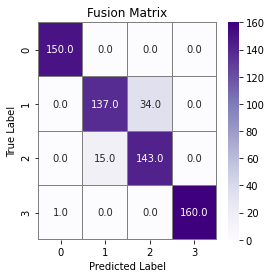

In [ ]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

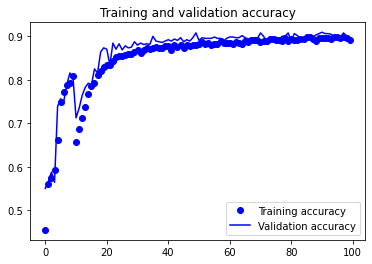

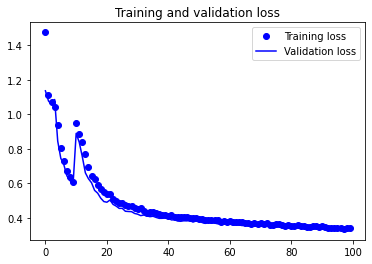

In [ ]:
#Loss and Accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
def f1_score(pred, act):
    target_names = ["Class {}".format(i) for i in range(4)]
    print(classification_report(act, pred, target_names=target_names))
    
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00       150
     Class 1       0.90      0.80      0.85       171
     Class 2       0.81      0.91      0.85       158
     Class 3       1.00      0.99      1.00       161

    accuracy                           0.92       640
   macro avg       0.93      0.93      0.92       640
weighted avg       0.92      0.92      0.92       640



In [ ]:
cnn_input = Input(shape = (128,128,3))
y = Conv2D(64, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l1_l2(l1 = 0.005, l2 =0.005))(cnn_input)
y = MaxPooling2D((2, 2), padding = 'same')(y)
#y = Dropout(0.25)(y)
y= Conv2D(32, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l1_l2(l1 = 0.005, l2 =0.005))(y)
y = MaxPooling2D((2, 2), padding = 'same')(y)
#y = Dropout(0.25)(y)
y= Conv2D(16, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l2(0.005))(y)
y = MaxPooling2D((2, 2), padding = 'same')(y)
y = Dropout(0.25)(y)
cnn_flatten= Flatten()(y)


lstm_input = Input(shape=(7,1))
lstm_output =(LSTM(5,return_sequences=False,input_shape = (7,1),kernel_regularizer=regularizers.l2( 0.001)))(lstm_input)

merge = concatenate([cnn_flatten, lstm_output])
#output1 = Dense(16, activation='relu')(merge)
output = Dense(4, activation='softmax',name='FUSION_output')(merge)


output_cnn=Dense(4, activation='softmax',name='CNN_output')(cnn_flatten)
#model_cnn=Model(inputs=cnn1.input,outputs=output_cnn)

output_lstm=Dense(4, activation='softmax',name='LSTM_output')(lstm_output)
#model_lstm=Model(inputs=lstm1.input,outputs=output_lstm)


model_normalfusion128= Model(inputs=[cnn_input, lstm_input], outputs=[output])

model_normalfusion128.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 126, 126, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 63, 63, 64)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 61, 61, 32)   18464       max_pooling2d[0][0]              
______________________________________________________________________________________________

In [ ]:
print(trainImagesX.shape)

(5120, 128, 128, 3)


In [ ]:
opt = Adam(lr=0.006, decay=1e-3)
model_normalfusion128.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history=model_normalfusion128.fit([trainImagesX, trainAttrX_new], trainY_new,epochs=100, batch_size=20,validation_data=([valImagesX, valAttrX_new],valY_new))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
256/256 [==============================] - 58s 17ms/step - loss: 2.0718 - accuracy: 0.4384 - val_loss: 0.7304 - val_accuracy: 0.7453
Epoch 2/100
256/256 [==============================] - 3s 13ms/step - loss: 0.6552 - accuracy: 0.7704 - val_loss: 0.5637 - val_accuracy: 0.8141
Epoch 3/100
256/256 [==============================] - 3s 13ms/step - loss: 0.5724 - accuracy: 0.7994 - val_loss: 0.5032 - val_accuracy: 0.8438
Epoch 4/100
256/256 [==============================] - 4s 15ms/step - loss: 0.4996 - accuracy: 0.8370 - val_loss: 0.4630 - val_accuracy: 0.8578
Epoch 5/100
256/256 [==============================] - 3s 13ms/step - loss: 0.4741 - accuracy: 0.8447 - val_loss: 0.4243 - val_accuracy: 0.8609
Epoch 6/100
256/256 [==============================] - 3s 14ms/step - loss: 0.4118 - accuracy: 0.8680 - val_loss: 0.4173 - val_accuracy: 0.8672
Epoch 7/100
256/256 [==============================] - 3s 13ms/step - loss: 0.4023 - accuracy: 0.8731 - val_loss: 0.3989 - val_accuracy

In [ ]:
score = model_normalfusion128.evaluate([testImagesX,testAttrX_new],testY_new, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2283567190170288
Test accuracy: 0.9468749761581421


In [ ]:
model_normalfusion128.save('model_normalfusion128_15july.h5')

In [ ]:
model_normalfusion128 = tf.keras.models.load_model('model_normalfusion128_15july.h5')
result=model_normalfusion128.predict([testImagesX,testAttrX_new])
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

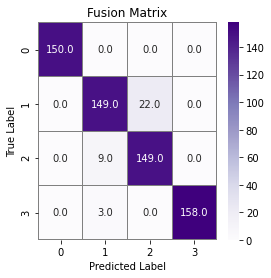

In [ ]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

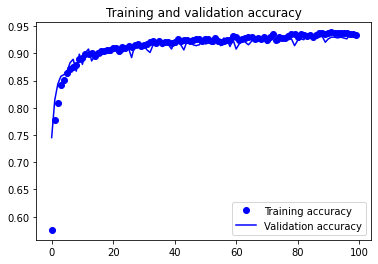

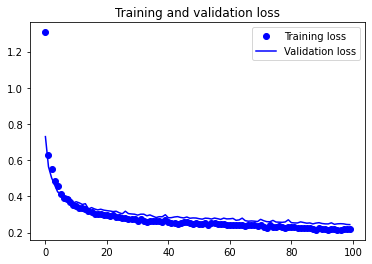

In [ ]:
#Loss and Accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
def f1_score(pred, act):
    target_names = ["Class {}".format(i) for i in range(4)]
    print(classification_report(act, pred, target_names=target_names))
    
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       150
     Class 1       0.93      0.87      0.90       171
     Class 2       0.87      0.94      0.91       158
     Class 3       1.00      0.98      0.99       161

    accuracy                           0.95       640
   macro avg       0.95      0.95      0.95       640
weighted avg       0.95      0.95      0.95       640



In [ ]:
cnn_input = Input(shape = (64,64,3))
y = Conv2D(64, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l1_l2(l1 = 0.005, l2 =0.005))(cnn_input)
y = MaxPooling2D((2, 2), padding = 'same')(y)
#y = Dropout(0.25)(y)
y= Conv2D(32, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l1_l2(l1 = 0.005, l2 =0.005))(y)
y = MaxPooling2D((2, 2), padding = 'same')(y)
#y = Dropout(0.25)(y)
y= Conv2D(16, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l2(0.005))(y)
y = MaxPooling2D((2, 2), padding = 'same')(y)
y = Dropout(0.25)(y)
cnn_flatten= Flatten()(y)


lstm_input = Input(shape=(7,1))
lstm_output =(LSTM(5,return_sequences=False,input_shape = (7,1),kernel_regularizer=regularizers.l2( 0.001)))(lstm_input)

merge = concatenate([cnn_flatten, lstm_output])
#output1 = Dense(16, activation='relu')(merge)
output = Dense(4, activation='softmax',name='FUSION_output')(merge)


output_cnn=Dense(4, activation='softmax',name='CNN_output')(cnn_flatten)
#model_cnn=Model(inputs=cnn1.input,outputs=output_cnn)

output_lstm=Dense(4, activation='softmax',name='LSTM_output')(lstm_output)
#model_lstm=Model(inputs=lstm1.input,outputs=output_lstm)


model_normalfusion64 = Model(inputs=[cnn_input, lstm_input], outputs=[output])

model_normalfusion64.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 62, 62, 64)   1792        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 31, 31, 64)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 29, 29, 32)   18464       max_pooling2d[0][0]              
______________________________________________________________________________________________

In [ ]:
opt = Adam(lr=0.006, decay=1e-3)
model_normalfusion64.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history=model_normalfusion64.fit([trainImagesX, trainAttrX_new], trainY_new,epochs=100, batch_size=20,validation_data=([valImagesX, valAttrX_new],valY_new))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
256/256 [==============================] - 52s 11ms/step - loss: 2.0802 - accuracy: 0.4388 - val_loss: 1.0547 - val_accuracy: 0.6031
Epoch 2/100
256/256 [==============================] - 2s 7ms/step - loss: 1.0528 - accuracy: 0.6061 - val_loss: 0.7513 - val_accuracy: 0.7531
Epoch 3/100
256/256 [==============================] - 2s 7ms/step - loss: 0.7560 - accuracy: 0.7517 - val_loss: 0.6228 - val_accuracy: 0.8094
Epoch 4/100
256/256 [==============================] - 2s 7ms/step - loss: 0.6765 - accuracy: 0.7799 - val_loss: 0.5819 - val_accuracy: 0.8188
Epoch 5/100
256/256 [==============================] - 2s 7ms/step - loss: 0.6148 - accuracy: 0.7871 - val_loss: 0.5407 - val_accuracy: 0.8328
Epoch 6/100
256/256 [==============================] - 2s 7ms/step - loss: 0.5938 - accuracy: 0.8006 - val_loss: 0.5539 - val_accuracy: 0.8250
Epoch 7/100
256/256 [==============================] - 2s 7ms/step - loss: 0.5750 - accuracy: 0.8044 - val_loss: 0.5129 - val_accuracy: 0.84

In [ ]:
score = model_normalfusion64.evaluate([testImagesX,testAttrX_new],testY_new, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.26440179347991943
Test accuracy: 0.9156249761581421


In [ ]:
model_normalfusion64.save('model_normalfusion64_16July.h5')

In [ ]:
model_normalfusion64.save_weights('model_normalfusion64weights.h5')

In [ ]:
model_normalfusion64 = tf.keras.models.load_model('model_normalfusion64_16July.h5')
result=model_normalfusion64.predict([testImagesX,testAttrX_new])

In [ ]:
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

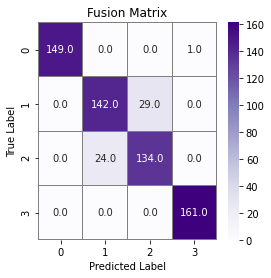

In [ ]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

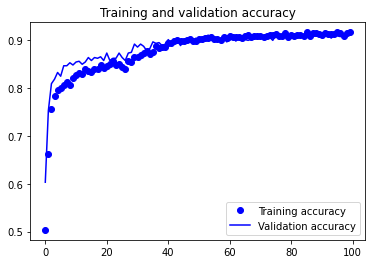

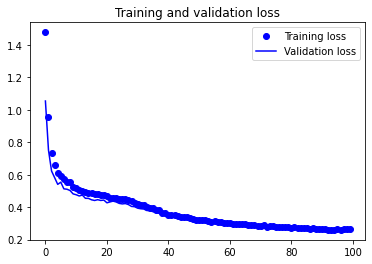

In [ ]:
#Loss and Accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
def f1_score(pred, act):
    target_names = ["Class {}".format(i) for i in range(4)]
    print(classification_report(act, pred, target_names=target_names))
    
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       1.00      0.99      1.00       150
     Class 1       0.86      0.83      0.84       171
     Class 2       0.82      0.85      0.83       158
     Class 3       0.99      1.00      1.00       161

    accuracy                           0.92       640
   macro avg       0.92      0.92      0.92       640
weighted avg       0.92      0.92      0.92       640



Co Learning : Normal Fusion (Only Sensor, Images Null)

In [ ]:
#Generating black images
testImagesX_black=[]
img=np.zeros((64,64,3),dtype='uint8')
for i in range(len(testImagesX)):
  testImagesX_black.append(img)
testImagesX_black=np.array(testImagesX_black)

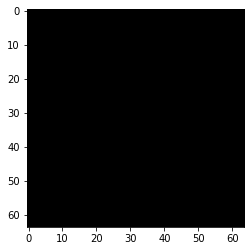

In [ ]:
import tensorflow as tf
plt.imshow(tf.squeeze(testImagesX_black[0]))

In [ ]:
from keras.models import load_model
model_test = load_model('model_normalfusion64_16July.h5')

In [ ]:
result=model_test.predict([testImagesX_black,testAttrX_new])

In [ ]:
pred_fusion = np.argmax(result, axis=-1)
pred_fusion
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

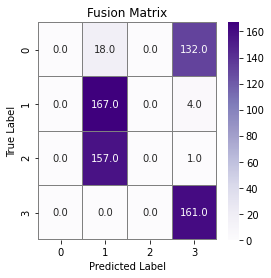

In [ ]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

In [ ]:
def f1_score(pred, act):
    target_names = ["Class {}".format(i) for i in range(4)]
    print(classification_report(act, pred, target_names=target_names))
    
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       150
     Class 1       0.49      0.98      0.65       171
     Class 2       0.00      0.00      0.00       158
     Class 3       0.54      1.00      0.70       161

    accuracy                           0.51       640
   macro avg       0.26      0.49      0.34       640
weighted avg       0.27      0.51      0.35       640



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Co Learning

In [ ]:
def fusion_evaluation(history):
    cnn_acc = history.history['CNN_output_accuracy']
    cnn_val_acc = history.history['val_CNN_output_accuracy']
    cnn_loss = history.history['CNN_output_loss']
    cnn_val_loss = history.history['val_CNN_output_loss']
    epochs = range(len(cnn_acc))
    #fig1 = plt.figure(figsize=(10,10))
    title='CNN'
    plot_graph(cnn_acc,cnn_val_acc,cnn_loss,cnn_val_loss,epochs,title)
    
    
    lstm_acc = history.history['LSTM_output_accuracy']
    lstm_val_acc = history.history['val_LSTM_output_accuracy']
    lstm_loss = history.history['LSTM_output_loss']
    lstm_val_loss = history.history['val_LSTM_output_loss']
    title='LSTM'
    plot_graph(lstm_acc,lstm_val_acc,lstm_loss,lstm_val_loss,epochs,title)
    
    fusion_acc = history.history['FUSION_output_accuracy']
    fusion_val_acc = history.history['val_FUSION_output_accuracy']
    fusion_loss = history.history['FUSION_output_loss']
    fusion_val_loss = history.history['val_FUSION_output_loss']
    title='Fusion'
    plot_graph(fusion_acc,fusion_val_acc,fusion_loss,fusion_val_loss,epochs,title)
    
def plot_graph(acc,val_acc,loss,val_loss,epochs,title):
    fig = plt.figure(figsize=(20,6))
    fig.suptitle(title, fontsize=30)
    plt.subplot(121)
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [8]:
def test_model(model,testI,testA,testy):
    result=model.predict([testI,testA])
    pred_cnn = np.argmax(result[0], axis=-1)
    pred_lstm = np.argmax(result[1], axis=-1)
    pred_fusion = np.argmax(result[2], axis=-1)
   
    compare=pd.DataFrame({'Actual':testY_new,'Predicted_CNN':pred_cnn,'Predicted_lstm':pred_lstm,'Predicted_fusion':pred_fusion})
    pd.set_option('display.max_rows', compare.shape[0]+1)
    print(compare)
   
    conf_matrx(testy, pred_cnn,title='CNN')
    f1_score(pred_cnn,testy)
    conf_matrx(testy, pred_lstm,title='LSTM')
    f1_score(pred_lstm,testy)
    conf_matrx(testy, pred_fusion,title='FUSION')
    f1_score(pred_fusion,testy)
   
   
def conf_matrx(testY, pred,title):
    cm = confusion_matrix(testY,pred)
    f,ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

   
def f1_score(pred, act):
    target_names = ["Class {}".format(i) for i in range(4)]
    print(classification_report(act, pred, target_names=target_names))

In [ ]:
cnn_input = Input(shape = (32,32,3))
y = Conv2D(64, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l1_l2(l1 = 0.005, l2 =0.005))(cnn_input)
y = MaxPooling2D((2, 2), padding = 'same')(y)
#y = Dropout(0.25)(y)
y= Conv2D(32, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l1_l2(l1 = 0.005, l2 =0.005))(y)
y = MaxPooling2D((2, 2), padding = 'same')(y)
#y = Dropout(0.25)(y)
y= Conv2D(16, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l2(0.005))(y)
y = MaxPooling2D((2, 2), padding = 'same')(y)
y = Dropout(0.25)(y)
cnn_flatten= Flatten()(y)


lstm_input = Input(shape=(7,1))
lstm_output =(LSTM(5,return_sequences=False,input_shape = (7,1),kernel_regularizer=regularizers.l2( 0.001)))(lstm_input)

merge = concatenate([cnn_flatten, lstm_output])
#output1 = Dense(16, activation='relu')(merge)
output = Dense(4, activation='softmax',name='FUSION_output')(merge)


output_cnn=Dense(4, activation='softmax',name='CNN_output')(cnn_flatten)
#model_cnn=Model(inputs=cnn1.input,outputs=output_cnn)

output_lstm=Dense(4, activation='softmax',name='LSTM_output')(lstm_output)
#model_lstm=Model(inputs=lstm1.input,outputs=output_lstm)


modelfusion32multi = Model(inputs=[cnn_input, lstm_input], outputs=[output_cnn,output_lstm,output])

modelfusion32multi.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 30, 30, 64)   1792        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 15, 15, 64)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 13, 13, 32)   18464       max_pooling2d[0][0]              
______________________________________________________________________________________________

In [ ]:
opt = Adam(lr=0.006, decay=1e-3)
modelfusion32multi.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history=modelfusion32multi.fit([trainImagesX, trainAttrX_new], [trainY_new,trainY_new,trainY_new],epochs=100, batch_size=20,validation_data=([valImagesX, valAttrX_new],[valY_new,valY_new,valY_new]))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
256/256 [==============================] - 36s 46ms/step - loss: 4.8668 - CNN_output_loss: 1.3595 - LSTM_output_loss: 1.3894 - FUSION_output_loss: 1.3610 - CNN_output_accuracy: 0.3190 - LSTM_output_accuracy: 0.2598 - FUSION_output_accuracy: 0.3033 - val_loss: 3.7794 - val_CNN_output_loss: 1.1352 - val_LSTM_output_loss: 1.3900 - val_FUSION_output_loss: 1.1240 - val_CNN_output_accuracy: 0.4250 - val_LSTM_output_accuracy: 0.2406 - val_FUSION_output_accuracy: 0.4547
Epoch 2/100
256/256 [==============================] - 11s 44ms/step - loss: 3.5096 - CNN_output_loss: 0.9833 - LSTM_output_loss: 1.3872 - FUSION_output_loss: 0.9796 - CNN_output_accuracy: 0.5809 - LSTM_output_accuracy: 0.2482 - FUSION_output_accuracy: 0.5856 - val_loss: 3.1590 - val_CNN_output_loss: 0.8033 - val_LSTM_output_loss: 1.3862 - val_FUSION_output_loss: 0.7939 - val_CNN_output_accuracy: 0.6891 - val_LSTM_output_accuracy: 0.2313 - val_FUSION_output_accuracy: 0.6891
Epoch 3/100
256/256 [=====================

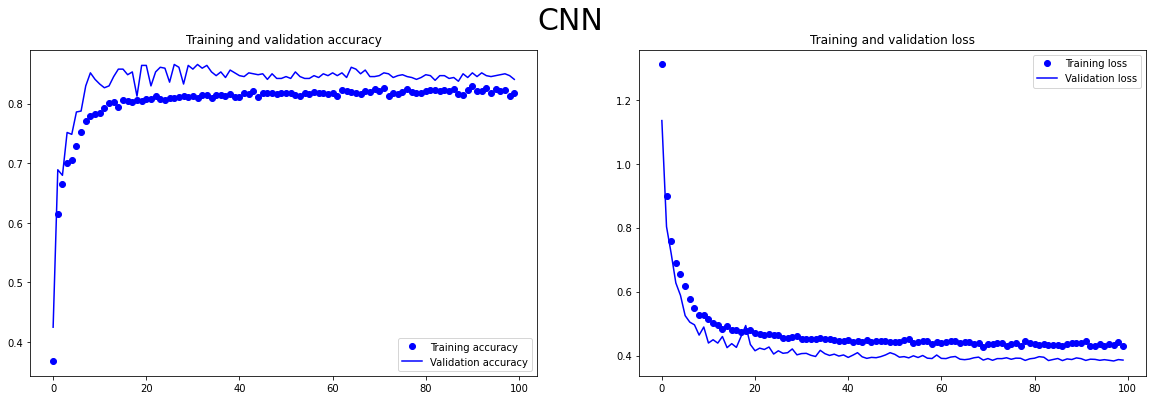

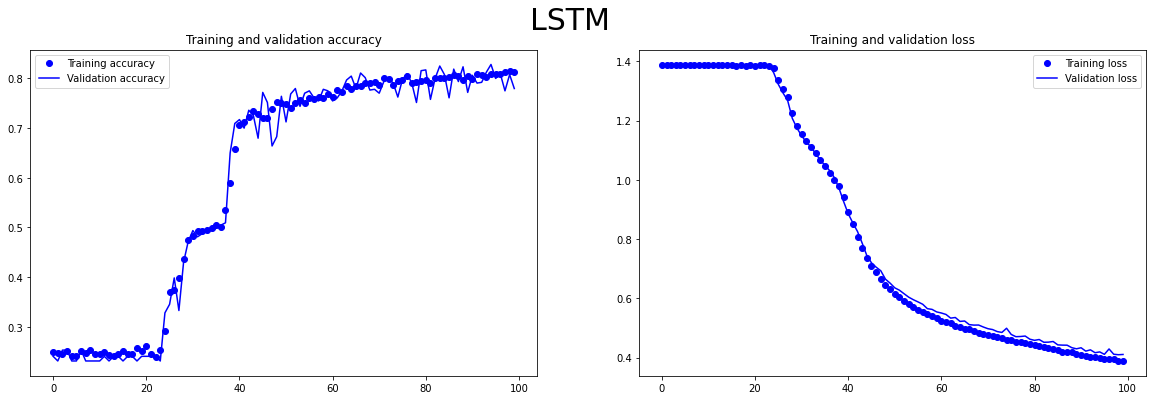

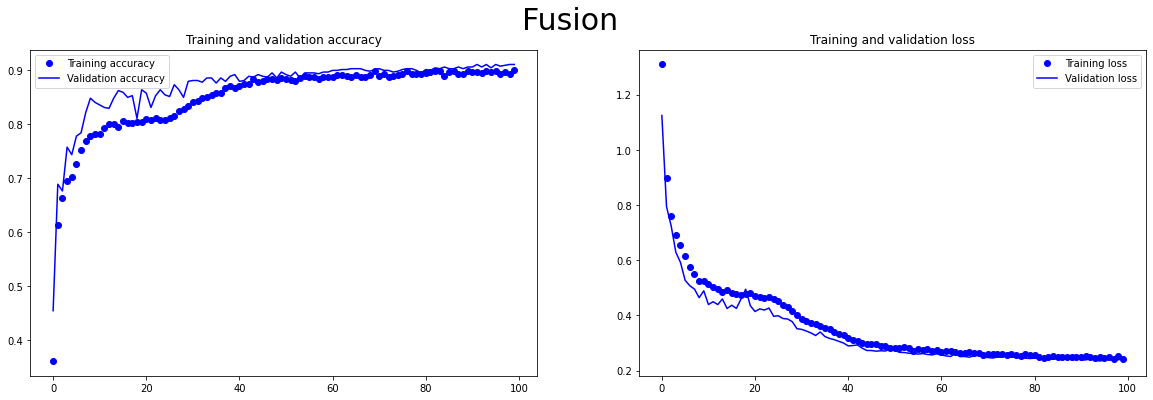

In [ ]:
fusion_evaluation(history)


     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              2               1                 2
1         1              1               1                 1
2         2              2               1                 2
3         0              0               0                 0
4         1              2               1                 2
5         1              3               1                 1
6         3              3               3                 3
7         2              1               2                 2
8         2              2               2                 2
9         3              3               3                 3
10        3              3               3                 3
11        0              0               0                 0
12        1              3               2                 1
13        0              0               0                 0
14        2              2               1                 2
15        2             

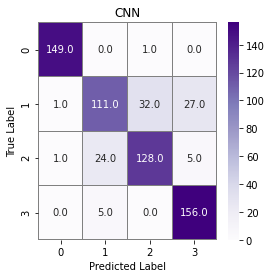

              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99       150
     Class 1       0.79      0.65      0.71       171
     Class 2       0.80      0.81      0.80       158
     Class 3       0.83      0.97      0.89       161

    accuracy                           0.85       640
   macro avg       0.85      0.86      0.85       640
weighted avg       0.85      0.85      0.85       640



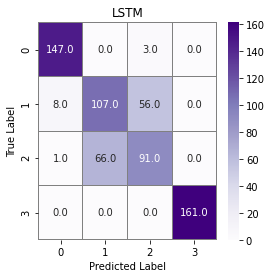

              precision    recall  f1-score   support

     Class 0       0.94      0.98      0.96       150
     Class 1       0.62      0.63      0.62       171
     Class 2       0.61      0.58      0.59       158
     Class 3       1.00      1.00      1.00       161

    accuracy                           0.79       640
   macro avg       0.79      0.80      0.79       640
weighted avg       0.79      0.79      0.79       640



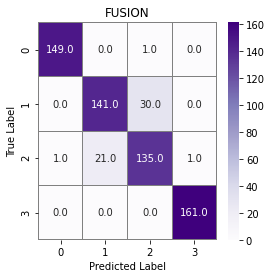

              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99       150
     Class 1       0.87      0.82      0.85       171
     Class 2       0.81      0.85      0.83       158
     Class 3       0.99      1.00      1.00       161

    accuracy                           0.92       640
   macro avg       0.92      0.92      0.92       640
weighted avg       0.92      0.92      0.92       640



In [ ]:
test_model(modelfusion32multi,testImagesX,testAttrX_new,testY_new)


In [ ]:
modelfusion32multi.save('model_normalfusion32multi_16July.h5')

In [ ]:
cnn_input = Input(shape = (64,64,3))
y = Conv2D(64, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l1_l2(l1 = 0.005, l2 =0.005))(cnn_input)
y = MaxPooling2D((2, 2), padding = 'same')(y)
#y = Dropout(0.25)(y)
y= Conv2D(32, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l1_l2(l1 = 0.005, l2 =0.005))(y)
y = MaxPooling2D((2, 2), padding = 'same')(y)
#y = Dropout(0.25)(y)
y= Conv2D(16, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l2(0.005))(y)
y = MaxPooling2D((2, 2), padding = 'same')(y)
y = Dropout(0.25)(y)
cnn_flatten= Flatten()(y)


lstm_input = Input(shape=(7,1))
lstm_output =(LSTM(5,return_sequences=False,input_shape = (7,1),kernel_regularizer=regularizers.l2( 0.001)))(lstm_input)

merge = concatenate([cnn_flatten, lstm_output])
#output1 = Dense(16, activation='relu')(merge)
output = Dense(4, activation='softmax',name='FUSION_output')(merge)


output_cnn=Dense(4, activation='softmax',name='CNN_output')(cnn_flatten)
#model_cnn=Model(inputs=cnn1.input,outputs=output_cnn)

output_lstm=Dense(4, activation='softmax',name='LSTM_output')(lstm_output)
#model_lstm=Model(inputs=lstm1.input,outputs=output_lstm)


modelfusion64multi = Model(inputs=[cnn_input, lstm_input], outputs=[output_cnn,output_lstm,output])

modelfusion64multi.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 62, 62, 64)   1792        input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 31, 31, 64)   0           conv2d_3[0][0]                   
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 29, 29, 32)   18464       max_pooling2d_3[0][0]            
____________________________________________________________________________________________

In [ ]:
opt = Adam(lr=0.006, decay=1e-3)

modelfusion64multi .compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history=modelfusion64multi.fit([trainImagesX, trainAttrX_new], [trainY_new,trainY_new,trainY_new],epochs=100, batch_size=20,validation_data=([valImagesX, valAttrX_new],[valY_new,valY_new,valY_new]))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
256/256 [==============================] - 53s 182ms/step - loss: 4.3140 - CNN_output_loss: 1.0471 - LSTM_output_loss: 1.3929 - FUSION_output_loss: 1.0327 - CNN_output_accuracy: 0.5278 - LSTM_output_accuracy: 0.2451 - FUSION_output_accuracy: 0.5255 - val_loss: 2.5357 - val_CNN_output_loss: 0.4695 - val_LSTM_output_loss: 1.3878 - val_FUSION_output_loss: 0.4626 - val_CNN_output_accuracy: 0.7984 - val_LSTM_output_accuracy: 0.2313 - val_FUSION_output_accuracy: 0.8094
Epoch 2/100
256/256 [==============================] - 39s 151ms/step - loss: 2.5548 - CNN_output_loss: 0.4846 - LSTM_output_loss: 1.3869 - FUSION_output_loss: 0.4808 - CNN_output_accuracy: 0.7879 - LSTM_output_accuracy: 0.2690 - FUSION_output_accuracy: 0.7936 - val_loss: 2.4391 - val_CNN_output_loss: 0.4338 - val_LSTM_output_loss: 1.3855 - val_FUSION_output_loss: 0.4294 - val_CNN_output_accuracy: 0.8328 - val_LSTM_output_accuracy: 0.2750 - val_FUSION_output_accuracy: 0.8281
Epoch 3/100
256/256 [===================

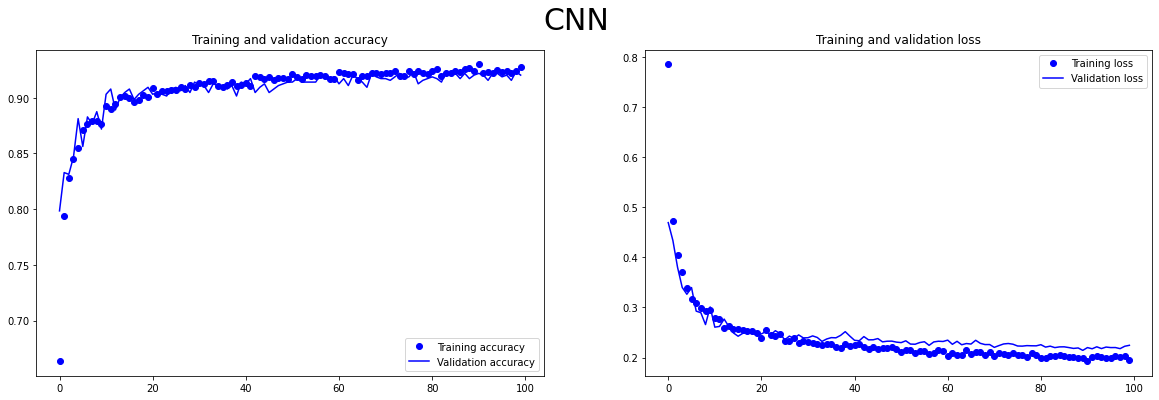

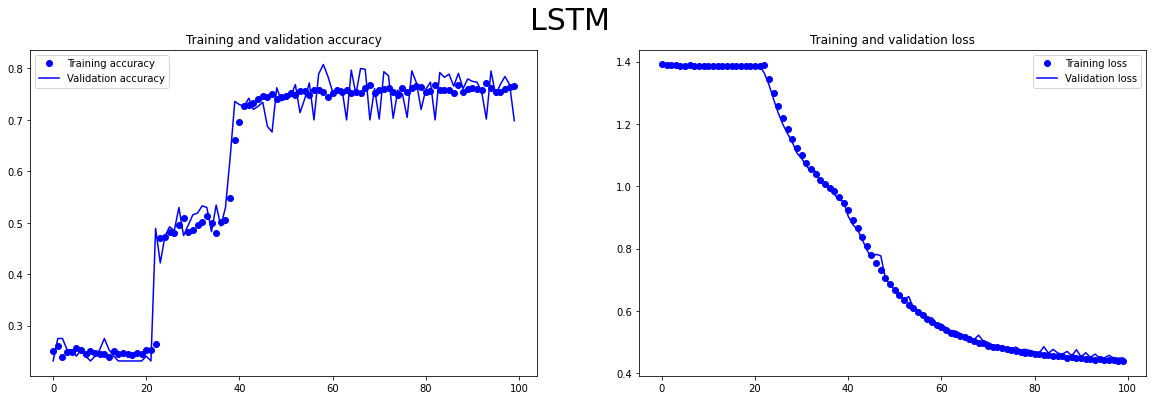

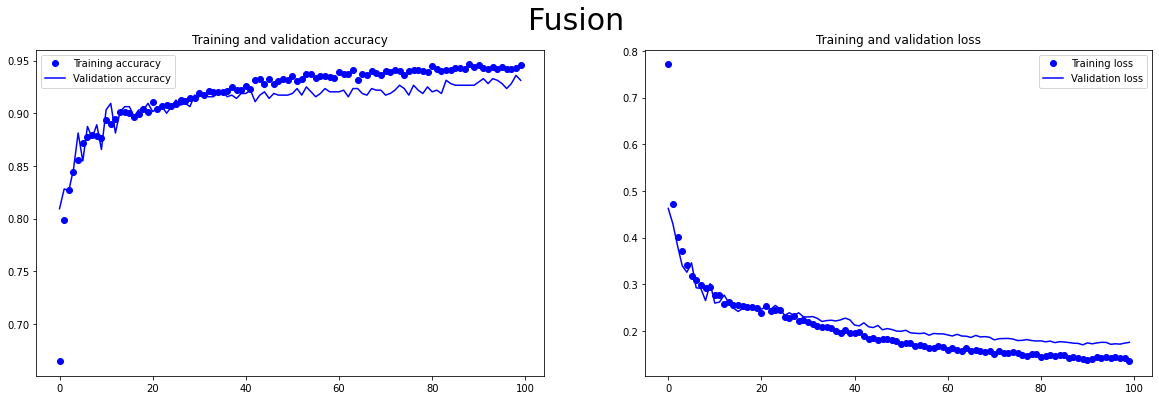

In [ ]:
fusion_evaluation(history)


     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              2               2                 2
1         1              1               2                 1
2         2              2               2                 2
3         0              0               0                 0
4         1              2               2                 2
5         1              1               2                 1
6         3              3               3                 3
7         2              1               1                 1
8         2              2               2                 2
9         3              3               3                 3
10        3              3               3                 3
11        0              0               0                 0
12        1              1               1                 1
13        0              0               0                 0
14        2              2               2                 2
15        2             

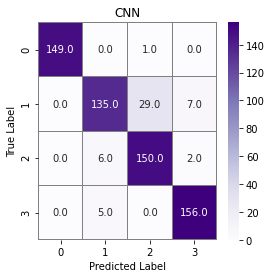

              precision    recall  f1-score   support

     Class 0       1.00      0.99      1.00       150
     Class 1       0.92      0.79      0.85       171
     Class 2       0.83      0.95      0.89       158
     Class 3       0.95      0.97      0.96       161

    accuracy                           0.92       640
   macro avg       0.93      0.93      0.92       640
weighted avg       0.93      0.92      0.92       640



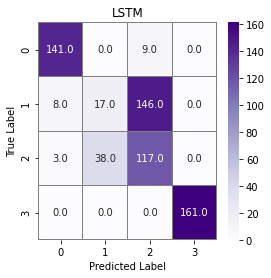

              precision    recall  f1-score   support

     Class 0       0.93      0.94      0.93       150
     Class 1       0.31      0.10      0.15       171
     Class 2       0.43      0.74      0.54       158
     Class 3       1.00      1.00      1.00       161

    accuracy                           0.68       640
   macro avg       0.67      0.69      0.66       640
weighted avg       0.66      0.68      0.64       640



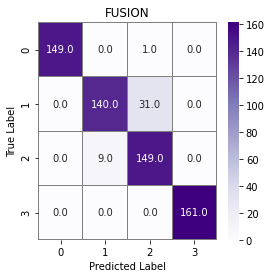

              precision    recall  f1-score   support

     Class 0       1.00      0.99      1.00       150
     Class 1       0.94      0.82      0.88       171
     Class 2       0.82      0.94      0.88       158
     Class 3       1.00      1.00      1.00       161

    accuracy                           0.94       640
   macro avg       0.94      0.94      0.94       640
weighted avg       0.94      0.94      0.94       640



In [ ]:
test_model(modelfusion64multi,testImagesX,testAttrX_new,testY_new)


In [ ]:
modelfusion64multi.save('model_normalfusion64multi_16July.h5')

In [ ]:
modelfusion64multi.save_weights('model_normalfusion64multiweights.h5')

In [ ]:
cnn_input = Input(shape = (128,128,3))
y = Conv2D(64, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l1_l2(l1 = 0.005, l2 =0.005))(cnn_input)
y = MaxPooling2D((2, 2), padding = 'same')(y)
#y = Dropout(0.25)(y)
y= Conv2D(32, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l1_l2(l1 = 0.005, l2 =0.005))(y)
y = MaxPooling2D((2, 2), padding = 'same')(y)
#y = Dropout(0.25)(y)
y= Conv2D(16, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l2(0.005))(y)
y = MaxPooling2D((2, 2), padding = 'same')(y)
y = Dropout(0.25)(y)
cnn_flatten= Flatten()(y)


lstm_input = Input(shape=(7,1))
lstm_output =(LSTM(5,return_sequences=False,input_shape = (7,1),kernel_regularizer=regularizers.l2( 0.001)))(lstm_input)

merge = concatenate([cnn_flatten, lstm_output])
#output1 = Dense(16, activation='relu')(merge)
output = Dense(4, activation='softmax',name='FUSION_output')(merge)


output_cnn=Dense(4, activation='softmax',name='CNN_output')(cnn_flatten)
#model_cnn=Model(inputs=cnn1.input,outputs=output_cnn)

output_lstm=Dense(4, activation='softmax',name='LSTM_output')(lstm_output)
#model_lstm=Model(inputs=lstm1.input,outputs=output_lstm)


modelfusion128multi = Model(inputs=[cnn_input, lstm_input], outputs=[output_cnn,output_lstm,output])

modelfusion128multi.summary()

In [ ]:
opt = Adam(lr=0.006, decay=1e-3)
modelfusion128multi.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history=modelfusion128multi.fit([trainImagesX, trainAttrX_new], [trainY_new,trainY_new,trainY_new],epochs=100, batch_size=20,validation_data=([valImagesX, valAttrX_new],[valY_new,valY_new,valY_new]))

In [ ]:
fusion_evaluation(history)


In [ ]:
test_model(modelfusion128multi,testImagesX,testAttrX_new,testY_new)


In [ ]:
modelfusion64multi.save('model_normalfusion128multi_16July.h5')

In [ ]:
image_generator32 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        image_folder, shuffle=False, class_mode='sparse',
        target_size=(32, 32),batch_size=6400)
image_generator32.class_indices

NameError: ignored

**Black Image + Full Sensor**

In [ ]:
from keras.models import load_model
model_test= load_model('/content/drive/MyDrive/Thermal Cam Data/model_normalfusion32_15july.h5')


In [ ]:
#Generating black images
testImagesX_black=[]
img=np.zeros((32,32,3),dtype='uint8')
for i in range(len(testImagesX)):
  testImagesX_black.append(img)
testImagesX_black=np.array(testImagesX_black)

In [ ]:
result=model_test.predict([testImagesX_black,testAttrX_new])
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

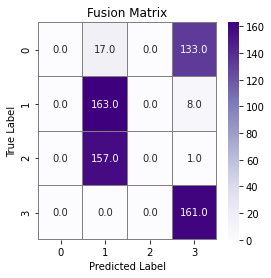

In [ ]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

In [ ]:
def f1_score(pred, act):
    target_names = ["Class {}".format(i) for i in range(4)]
    print(classification_report(act, pred, target_names=target_names))
    
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       150
     Class 1       0.48      0.95      0.64       171
     Class 2       0.00      0.00      0.00       158
     Class 3       0.53      1.00      0.69       161

    accuracy                           0.51       640
   macro avg       0.25      0.49      0.33       640
weighted avg       0.26      0.51      0.35       640



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
score = model_test.evaluate([testImagesX_black,testAttrX_new],testY_new, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.432128667831421
Test accuracy: 0.5062500238418579


**Full Thermal Image (Colored) + 10% Sensor Missing**


In [ ]:
df_mv = testAttrX_new.copy()

for k in range(0,round(len(df_mv)*0.1)):
        df_mv[random.randint(0, len(df_mv))] = 0

In [ ]:
result=model_test.predict([testImagesX,df_mv])
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

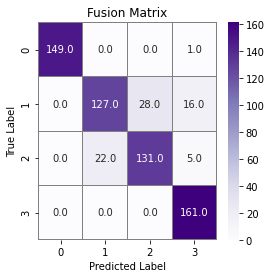

In [ ]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

In [ ]:
def f1_score(pred, act):
    target_names = ["Class {}".format(i) for i in range(4)]
    print(classification_report(act, pred, target_names=target_names))
    
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       1.00      0.99      1.00       150
     Class 1       0.85      0.74      0.79       171
     Class 2       0.82      0.83      0.83       158
     Class 3       0.88      1.00      0.94       161

    accuracy                           0.89       640
   macro avg       0.89      0.89      0.89       640
weighted avg       0.89      0.89      0.89       640



**Full Thermal Image(Colored) + 20% Sensor Missing**

In [ ]:
df_mv2 = testAttrX_new.copy()

for k in range(0,round(len(df_mv2)*0.2)):
        df_mv2[random.randint(0, len(df_mv2))] = 0

In [ ]:
result=model_test.predict([testImagesX,df_mv2])
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

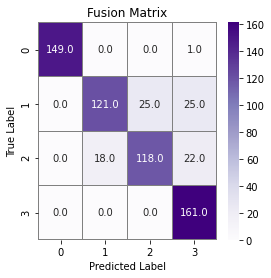

In [ ]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

In [ ]:
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       1.00      0.99      1.00       150
     Class 1       0.87      0.71      0.78       171
     Class 2       0.83      0.75      0.78       158
     Class 3       0.77      1.00      0.87       161

    accuracy                           0.86       640
   macro avg       0.87      0.86      0.86       640
weighted avg       0.86      0.86      0.85       640



**Full Thermal Image + 30% Sensor Missing**

In [ ]:
df_mv3 = testAttrX_new.copy()

for k in range(0,round(len(df_mv3)*0.3)):
        df_mv3[random.randint(0, len(df_mv3))] = 0

In [ ]:
result=model_test.predict([testImagesX,df_mv3])
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

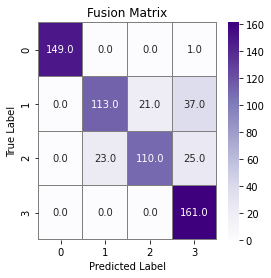

In [ ]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

In [ ]:
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       1.00      0.99      1.00       150
     Class 1       0.83      0.66      0.74       171
     Class 2       0.84      0.70      0.76       158
     Class 3       0.72      1.00      0.84       161

    accuracy                           0.83       640
   macro avg       0.85      0.84      0.83       640
weighted avg       0.84      0.83      0.83       640



**Full Thermal Image + 40% Sensor Missing**

In [ ]:
df_mv4 = testAttrX_new.copy()

for k in range(0,round(len(df_mv4)*0.4)):
        df_mv4[random.randint(0, len(df_mv4))] = 0

In [ ]:
result=model_test.predict([testImagesX,df_mv4])
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

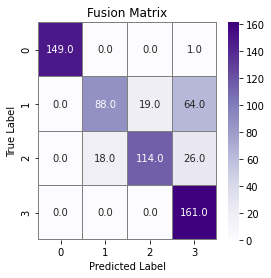

In [ ]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

In [ ]:
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       1.00      0.99      1.00       150
     Class 1       0.83      0.51      0.64       171
     Class 2       0.86      0.72      0.78       158
     Class 3       0.64      1.00      0.78       161

    accuracy                           0.80       640
   macro avg       0.83      0.81      0.80       640
weighted avg       0.83      0.80      0.79       640



**Full Thermal Image + 50% Sensor Missing**

In [ ]:
df_mv5 = testAttrX_new.copy()

for k in range(0,round(len(df_mv5)*0.5)):
        df_mv5[random.randint(0, len(df_mv5))] = 0

In [ ]:
result=model_test.predict([testImagesX,df_mv5])
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

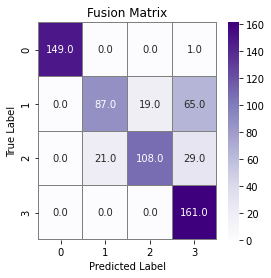

In [ ]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

In [ ]:
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       1.00      0.99      1.00       150
     Class 1       0.81      0.51      0.62       171
     Class 2       0.85      0.68      0.76       158
     Class 3       0.63      1.00      0.77       161

    accuracy                           0.79       640
   macro avg       0.82      0.80      0.79       640
weighted avg       0.82      0.79      0.78       640



**Full Thermal Image + 60% Sensor Missing**

In [ ]:
df_mv6 = testAttrX_new.copy()

for k in range(0,round(len(df_mv6)*0.6)):
        df_mv6[random.randint(0, len(df_mv6))] = 0


In [ ]:
result=model_test.predict([testImagesX,df_mv6])
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

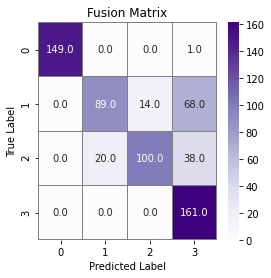

In [ ]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

In [ ]:
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       1.00      0.99      1.00       150
     Class 1       0.82      0.52      0.64       171
     Class 2       0.88      0.63      0.74       158
     Class 3       0.60      1.00      0.75       161

    accuracy                           0.78       640
   macro avg       0.82      0.79      0.78       640
weighted avg       0.82      0.78      0.77       640



**Full Thermal Image + 70% Sensor Missing**

In [ ]:
df_mv7 = testAttrX_new.copy()

for k in range(0,round(len(df_mv7)*0.7)):
        df_mv7[random.randint(0, len(df_mv7))] = 0

In [ ]:
result=model_test.predict([testImagesX,df_mv7])
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

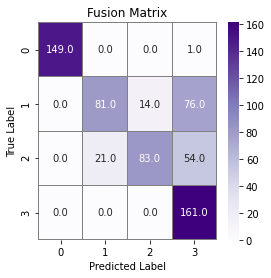

In [ ]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

In [ ]:
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       1.00      0.99      1.00       150
     Class 1       0.79      0.47      0.59       171
     Class 2       0.86      0.53      0.65       158
     Class 3       0.55      1.00      0.71       161

    accuracy                           0.74       640
   macro avg       0.80      0.75      0.74       640
weighted avg       0.80      0.74      0.73       640



**Full Thermal Image + 80% Sensor Missing**

In [ ]:
df_mv8 = testAttrX_new.copy()

for k in range(0,round(len(df_mv8)*0.8)):
        df_mv8[random.randint(0, len(df_mv8))] = 0

IndexError: ignored

In [ ]:
result=model_test.predict([testImagesX,df_mv8])
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

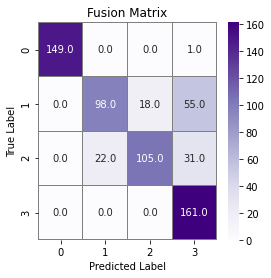

In [ ]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

In [ ]:
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       1.00      0.99      1.00       150
     Class 1       0.82      0.57      0.67       171
     Class 2       0.85      0.66      0.75       158
     Class 3       0.65      1.00      0.79       161

    accuracy                           0.80       640
   macro avg       0.83      0.81      0.80       640
weighted avg       0.83      0.80      0.80       640



**Full Thermal Image + 90% Sensor Missing**

In [ ]:
df_mv9 = testAttrX_new.copy()

for k in range(0,round(len(df_mv9)*0.9)):
        df_mv9[random.randint(0, len(df_mv9)-1)] = 0

In [ ]:
result=model_test.predict([testImagesX,df_mv9])
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

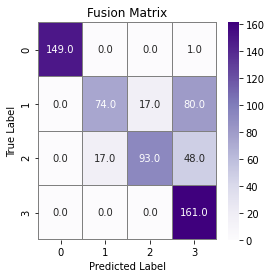

In [ ]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

In [ ]:
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       1.00      0.99      1.00       150
     Class 1       0.81      0.43      0.56       171
     Class 2       0.85      0.59      0.69       158
     Class 3       0.56      1.00      0.71       161

    accuracy                           0.75       640
   macro avg       0.80      0.75      0.74       640
weighted avg       0.80      0.75      0.74       640



**Multi Fusion - 32x32**

In [5]:
from keras.models import load_model
model_test= load_model('model_fusion64multi_17July.h5')

**Black Image + Full thermal Image**

In [6]:
#Generating black images
testImagesX_black=[]
img=np.zeros((64,64,3),dtype='uint8')
for i in range(len(testImagesX)):
  testImagesX_black.append(img)
testImagesX_black=np.array(testImagesX_black)

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              1               1                 1
1         1              1               2                 1
2         2              1               2                 1
3         0              1               0                 3
4         1              1               1                 1
5         1              1               1                 1
6         3              1               3                 3
7         2              1               1                 1
8         2              1               2                 1
9         3              1               3                 3
10        3              1               3                 3
11        0              1               0                 3
12        1              1               1                 1
13        0              1               0                 3
14        2              1               1                 1
15        2             

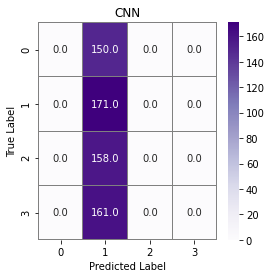

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       150
     Class 1       0.27      1.00      0.42       171
     Class 2       0.00      0.00      0.00       158
     Class 3       0.00      0.00      0.00       161

    accuracy                           0.27       640
   macro avg       0.07      0.25      0.11       640
weighted avg       0.07      0.27      0.11       640



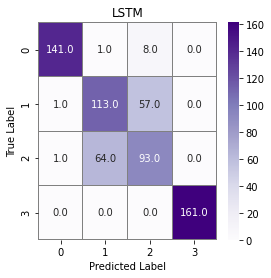

              precision    recall  f1-score   support

     Class 0       0.99      0.94      0.96       150
     Class 1       0.63      0.66      0.65       171
     Class 2       0.59      0.59      0.59       158
     Class 3       1.00      1.00      1.00       161

    accuracy                           0.79       640
   macro avg       0.80      0.80      0.80       640
weighted avg       0.80      0.79      0.80       640



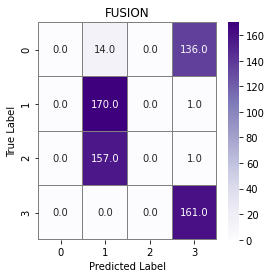

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       150
     Class 1       0.50      0.99      0.66       171
     Class 2       0.00      0.00      0.00       158
     Class 3       0.54      1.00      0.70       161

    accuracy                           0.52       640
   macro avg       0.26      0.50      0.34       640
weighted avg       0.27      0.52      0.35       640



In [9]:
test_model(model_test,testImagesX_black,testAttrX_new,testY_new)

**Full Thermal Image (Colored) + 10% Sensor Missing**


In [10]:
df_mv = testAttrX_new.copy()

for k in range(0,round(len(df_mv)*0.1)):
        df_mv[random.randint(0, len(df_mv))] = 0

In [11]:
np.where(np.all(df_mv == 0, axis=1))

(array([  9,  19,  29,  35,  44,  51,  53,  57,  63, 129, 139, 149, 153,
        178, 185, 213, 227, 241, 242, 248, 259, 277, 293, 302, 308, 311,
        335, 366, 375, 382, 389, 394, 407, 414, 420, 429, 430, 441, 464,
        467, 474, 485, 487, 497, 513, 516, 523, 535, 561, 575, 576, 585,
        586, 594, 596, 609, 615, 632]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              1               1                 1
1         1              1               2                 2
2         2              2               2                 2
3         0              0               0                 0
4         1              2               1                 2
5         1              2               1                 2
6         3              3               3                 3
7         2              1               1                 1
8         2              2               2                 2
9         3              3               3                 3
10        3              3               3                 3
11        0              0               0                 0
12        1              1               1                 1
13        0              0               0                 0
14        2              2               1                 2
15        2             

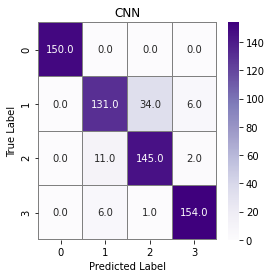

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       150
     Class 1       0.89      0.77      0.82       171
     Class 2       0.81      0.92      0.86       158
     Class 3       0.95      0.96      0.95       161

    accuracy                           0.91       640
   macro avg       0.91      0.91      0.91       640
weighted avg       0.91      0.91      0.91       640



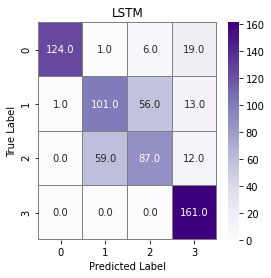

              precision    recall  f1-score   support

     Class 0       0.99      0.83      0.90       150
     Class 1       0.63      0.59      0.61       171
     Class 2       0.58      0.55      0.57       158
     Class 3       0.79      1.00      0.88       161

    accuracy                           0.74       640
   macro avg       0.75      0.74      0.74       640
weighted avg       0.74      0.74      0.74       640



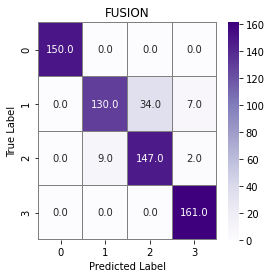

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       150
     Class 1       0.94      0.76      0.84       171
     Class 2       0.81      0.93      0.87       158
     Class 3       0.95      1.00      0.97       161

    accuracy                           0.92       640
   macro avg       0.92      0.92      0.92       640
weighted avg       0.92      0.92      0.92       640



In [12]:
test_model(model_test,testImagesX,df_mv,testY_new)

**Full Thermal Image (Colored) + 20% Sensor Missing**


In [13]:
df_mv2 = testAttrX_new.copy()

for k in range(0,round(len(df_mv2)*0.2)):
        df_mv2[random.randint(0, len(df_mv2))] = 0

In [14]:
np.where(np.all(df_mv2 == 0, axis=1))

(array([  2,  24,  25,  26,  28,  31,  40,  52,  58,  66,  70,  71,  72,
         80,  83,  92,  94,  96, 101, 104, 108, 110, 111, 116, 118, 129,
        130, 131, 133, 136, 141, 147, 152, 167, 170, 186, 198, 205, 208,
        215, 221, 223, 229, 244, 245, 250, 252, 257, 264, 276, 281, 296,
        300, 302, 315, 316, 319, 321, 323, 326, 328, 339, 347, 348, 381,
        399, 409, 410, 414, 420, 423, 426, 431, 460, 467, 468, 469, 482,
        485, 486, 488, 494, 495, 496, 499, 501, 503, 513, 519, 524, 527,
        532, 533, 535, 539, 540, 546, 550, 555, 558, 561, 564, 573, 574,
        579, 591, 599, 603, 606, 615, 619, 623, 625, 633, 634, 635, 636,
        638]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              1               1                 1
1         1              1               2                 2
2         2              2               3                 2
3         0              0               0                 0
4         1              2               1                 2
5         1              2               1                 2
6         3              3               3                 3
7         2              1               1                 1
8         2              2               2                 2
9         3              3               3                 3
10        3              3               3                 3
11        0              0               0                 0
12        1              1               1                 1
13        0              0               0                 0
14        2              2               1                 2
15        2             

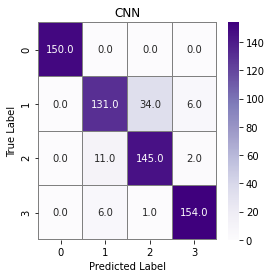

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       150
     Class 1       0.89      0.77      0.82       171
     Class 2       0.81      0.92      0.86       158
     Class 3       0.95      0.96      0.95       161

    accuracy                           0.91       640
   macro avg       0.91      0.91      0.91       640
weighted avg       0.91      0.91      0.91       640



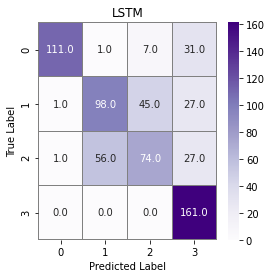

              precision    recall  f1-score   support

     Class 0       0.98      0.74      0.84       150
     Class 1       0.63      0.57      0.60       171
     Class 2       0.59      0.47      0.52       158
     Class 3       0.65      1.00      0.79       161

    accuracy                           0.69       640
   macro avg       0.71      0.70      0.69       640
weighted avg       0.71      0.69      0.69       640



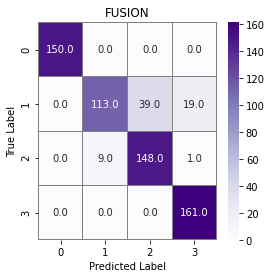

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       150
     Class 1       0.93      0.66      0.77       171
     Class 2       0.79      0.94      0.86       158
     Class 3       0.89      1.00      0.94       161

    accuracy                           0.89       640
   macro avg       0.90      0.90      0.89       640
weighted avg       0.90      0.89      0.89       640



In [15]:
test_model(model_test,testImagesX,df_mv2,testY_new)


**Full Thermal Image (Colored) + 30% Sensor Missing**


In [19]:
df_mv3 = testAttrX_new.copy()

for k in range(0,round(len(df_mv3)*0.3)):
        df_mv3[random.randint(0, len(df_mv3))] = 0

In [20]:
np.where(np.all(df_mv3 == 0, axis=1))

(array([  0,   3,  17,  20,  22,  30,  31,  35,  36,  38,  39,  43,  44,
         48,  50,  59,  61,  64,  67,  70,  75,  78,  81,  90, 107, 109,
        112, 114, 115, 125, 128, 130, 133, 136, 137, 140, 146, 155, 160,
        163, 167, 183, 196, 199, 209, 213, 216, 224, 227, 229, 230, 234,
        241, 243, 245, 247, 250, 251, 253, 270, 272, 278, 285, 289, 291,
        292, 293, 301, 302, 303, 305, 311, 313, 324, 325, 326, 331, 342,
        345, 346, 349, 350, 351, 352, 356, 359, 361, 362, 368, 371, 372,
        375, 380, 381, 382, 383, 384, 387, 388, 399, 406, 407, 412, 416,
        424, 428, 431, 433, 437, 441, 444, 453, 460, 465, 467, 468, 475,
        479, 480, 481, 482, 484, 487, 490, 494, 497, 504, 505, 511, 513,
        514, 516, 521, 526, 528, 534, 535, 536, 538, 540, 541, 542, 548,
        553, 563, 566, 567, 575, 582, 588, 590, 593, 600, 601, 602, 608,
        614, 617, 619, 622, 628, 629, 630, 633, 635, 638]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              1               3                 2
1         1              1               2                 2
2         2              2               2                 2
3         0              0               3                 0
4         1              2               1                 2
5         1              2               1                 2
6         3              3               3                 3
7         2              1               1                 1
8         2              2               2                 2
9         3              3               3                 3
10        3              3               3                 3
11        0              0               0                 0
12        1              1               1                 1
13        0              0               0                 0
14        2              2               1                 2
15        2             

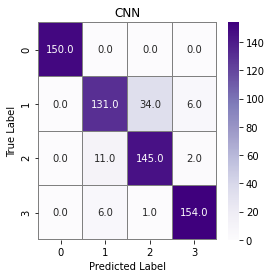

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       150
     Class 1       0.89      0.77      0.82       171
     Class 2       0.81      0.92      0.86       158
     Class 3       0.95      0.96      0.95       161

    accuracy                           0.91       640
   macro avg       0.91      0.91      0.91       640
weighted avg       0.91      0.91      0.91       640



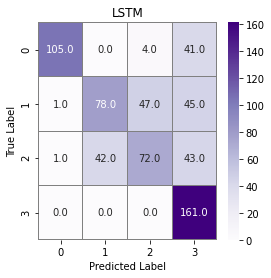

              precision    recall  f1-score   support

     Class 0       0.98      0.70      0.82       150
     Class 1       0.65      0.46      0.54       171
     Class 2       0.59      0.46      0.51       158
     Class 3       0.56      1.00      0.71       161

    accuracy                           0.65       640
   macro avg       0.69      0.65      0.64       640
weighted avg       0.69      0.65      0.64       640



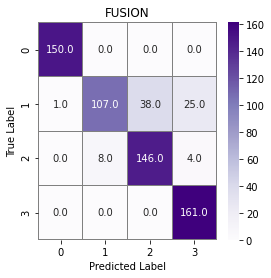

              precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00       150
     Class 1       0.93      0.63      0.75       171
     Class 2       0.79      0.92      0.85       158
     Class 3       0.85      1.00      0.92       161

    accuracy                           0.88       640
   macro avg       0.89      0.89      0.88       640
weighted avg       0.89      0.88      0.88       640



In [21]:
test_model(model_test,testImagesX,df_mv3,testY_new)


**Full Thermal Image (Colored) + 40% Sensor Missing**


In [22]:
df_mv4 = testAttrX_new.copy()

for k in range(0,round(len(df_mv4)*0.4)):
        df_mv4[random.randint(0, len(df_mv4))] = 0

In [23]:
np.where(np.all(df_mv4 == 0, axis=1))

(array([  0,   9,  10,  13,  16,  17,  21,  24,  26,  28,  32,  33,  35,
         37,  38,  40,  42,  48,  51,  54,  56,  60,  64,  65,  67,  70,
         72,  75,  76,  82,  83,  87,  88,  89,  90,  92,  99, 100, 101,
        105, 113, 117, 121, 123, 125, 127, 129, 131, 133, 135, 140, 142,
        143, 149, 152, 157, 165, 166, 168, 169, 170, 172, 175, 176, 182,
        185, 186, 187, 188, 189, 195, 196, 197, 202, 205, 211, 215, 219,
        221, 222, 225, 227, 232, 234, 237, 242, 244, 249, 265, 266, 270,
        272, 273, 275, 277, 278, 279, 281, 283, 293, 294, 296, 298, 299,
        302, 304, 308, 311, 318, 322, 323, 324, 327, 330, 334, 337, 339,
        343, 346, 350, 352, 354, 356, 357, 358, 360, 362, 364, 365, 366,
        367, 368, 369, 370, 371, 374, 376, 381, 393, 404, 407, 411, 414,
        415, 416, 418, 424, 431, 433, 434, 442, 443, 445, 449, 453, 454,
        463, 472, 473, 474, 476, 478, 479, 486, 487, 489, 490, 493, 507,
        511, 514, 517, 520, 524, 525, 528, 531, 535

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              1               3                 2
1         1              1               2                 2
2         2              2               2                 2
3         0              0               0                 0
4         1              2               1                 2
5         1              2               1                 2
6         3              3               3                 3
7         2              1               1                 1
8         2              2               2                 2
9         3              3               3                 3
10        3              3               3                 3
11        0              0               0                 0
12        1              1               1                 1
13        0              0               3                 0
14        2              2               1                 2
15        2             

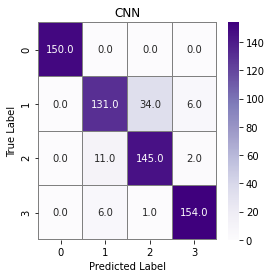

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       150
     Class 1       0.89      0.77      0.82       171
     Class 2       0.81      0.92      0.86       158
     Class 3       0.95      0.96      0.95       161

    accuracy                           0.91       640
   macro avg       0.91      0.91      0.91       640
weighted avg       0.91      0.91      0.91       640



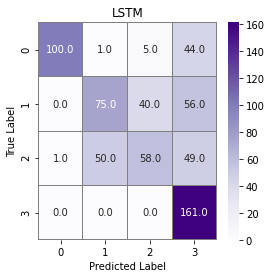

              precision    recall  f1-score   support

     Class 0       0.99      0.67      0.80       150
     Class 1       0.60      0.44      0.51       171
     Class 2       0.56      0.37      0.44       158
     Class 3       0.52      1.00      0.68       161

    accuracy                           0.62       640
   macro avg       0.67      0.62      0.61       640
weighted avg       0.66      0.62      0.60       640



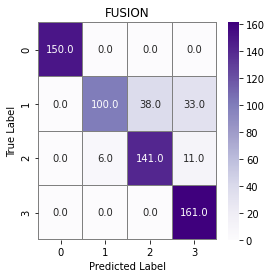

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       150
     Class 1       0.94      0.58      0.72       171
     Class 2       0.79      0.89      0.84       158
     Class 3       0.79      1.00      0.88       161

    accuracy                           0.86       640
   macro avg       0.88      0.87      0.86       640
weighted avg       0.88      0.86      0.86       640



In [24]:
test_model(model_test,testImagesX,df_mv4,testY_new)


**Full Thermal Image (Colored) + 50% Sensor Missing**

In [25]:
df_mv5 = testAttrX_new.copy()

for k in range(0,round(len(df_mv5)*0.5)):
        df_mv5[random.randint(0, len(df_mv5))] = 0

In [26]:
np.where(np.all(df_mv5 == 0, axis=1))

(array([  3,   6,   8,   9,  13,  17,  25,  26,  27,  32,  33,  35,  36,
         38,  39,  42,  44,  46,  48,  49,  52,  53,  55,  56,  68,  69,
         81,  82,  83,  85,  86,  87,  91,  94,  95, 100, 101, 102, 104,
        106, 107, 109, 110, 114, 115, 117, 118, 121, 122, 123, 129, 130,
        131, 132, 134, 135, 145, 146, 151, 154, 156, 158, 160, 161, 162,
        165, 166, 167, 168, 177, 178, 179, 181, 184, 187, 191, 197, 202,
        204, 205, 208, 210, 211, 212, 213, 216, 217, 218, 219, 222, 230,
        238, 244, 246, 248, 250, 253, 255, 258, 260, 268, 269, 271, 276,
        278, 282, 286, 287, 293, 297, 303, 307, 309, 313, 314, 316, 323,
        324, 325, 329, 331, 335, 336, 345, 348, 350, 351, 357, 360, 362,
        364, 365, 367, 368, 369, 373, 374, 375, 377, 378, 379, 380, 382,
        383, 387, 388, 389, 390, 392, 398, 400, 402, 405, 406, 408, 409,
        410, 413, 423, 428, 429, 430, 432, 435, 436, 437, 438, 439, 440,
        443, 454, 456, 457, 458, 462, 464, 475, 478

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              1               1                 1
1         1              1               2                 2
2         2              2               2                 2
3         0              0               3                 0
4         1              2               1                 2
5         1              2               1                 2
6         3              3               3                 3
7         2              1               1                 1
8         2              2               3                 2
9         3              3               3                 3
10        3              3               3                 3
11        0              0               0                 0
12        1              1               1                 1
13        0              0               3                 0
14        2              2               1                 2
15        2             

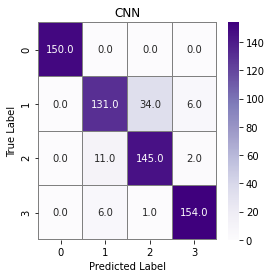

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       150
     Class 1       0.89      0.77      0.82       171
     Class 2       0.81      0.92      0.86       158
     Class 3       0.95      0.96      0.95       161

    accuracy                           0.91       640
   macro avg       0.91      0.91      0.91       640
weighted avg       0.91      0.91      0.91       640



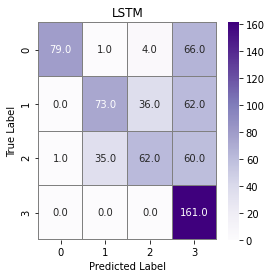

              precision    recall  f1-score   support

     Class 0       0.99      0.53      0.69       150
     Class 1       0.67      0.43      0.52       171
     Class 2       0.61      0.39      0.48       158
     Class 3       0.46      1.00      0.63       161

    accuracy                           0.59       640
   macro avg       0.68      0.59      0.58       640
weighted avg       0.68      0.59      0.58       640



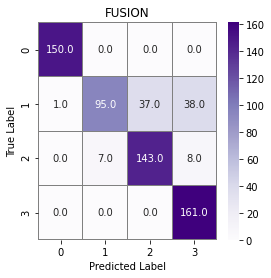

              precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00       150
     Class 1       0.93      0.56      0.70       171
     Class 2       0.79      0.91      0.85       158
     Class 3       0.78      1.00      0.88       161

    accuracy                           0.86       640
   macro avg       0.87      0.87      0.85       640
weighted avg       0.87      0.86      0.85       640



In [27]:
test_model(model_test,testImagesX,df_mv5,testY_new)


**Full Thermal Image (Colored) + 60% Sensor Missing**


In [34]:
df_mv6 = testAttrX_new.copy()

for k in range(0,round(len(df_mv6)*0.6)):
        df_mv6[random.randint(0, len(df_mv6)-1)] = 0


In [35]:
np.where(np.all(df_mv6 == 0, axis=1))

(array([  3,   4,   5,   6,   8,   9,  10,  12,  13,  15,  16,  17,  18,
         19,  23,  26,  27,  33,  35,  36,  37,  39,  41,  43,  44,  45,
         49,  50,  52,  54,  55,  56,  60,  64,  69,  70,  72,  75,  76,
         77,  78,  79,  80,  83,  84,  88,  91,  93,  95,  96,  98, 101,
        102, 103, 106, 116, 124, 126, 131, 134, 136, 138, 144, 147, 150,
        151, 152, 154, 155, 157, 159, 163, 169, 170, 171, 173, 174, 175,
        176, 180, 181, 182, 185, 187, 191, 197, 201, 203, 205, 206, 209,
        212, 218, 219, 221, 223, 226, 227, 228, 232, 234, 236, 240, 241,
        242, 244, 246, 249, 251, 253, 256, 258, 259, 260, 262, 264, 265,
        266, 267, 269, 271, 273, 274, 275, 280, 281, 282, 283, 288, 290,
        292, 293, 294, 298, 299, 302, 303, 305, 307, 308, 310, 311, 312,
        313, 314, 315, 316, 317, 318, 319, 320, 322, 325, 331, 332, 335,
        336, 343, 344, 348, 352, 355, 356, 357, 358, 360, 361, 363, 367,
        372, 377, 382, 383, 389, 390, 393, 395, 398

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              1               1                 1
1         1              1               2                 2
2         2              2               2                 2
3         0              0               3                 0
4         1              2               3                 2
5         1              2               3                 2
6         3              3               3                 3
7         2              1               1                 1
8         2              2               3                 2
9         3              3               3                 3
10        3              3               3                 3
11        0              0               0                 0
12        1              1               3                 3
13        0              0               3                 0
14        2              2               1                 2
15        2             

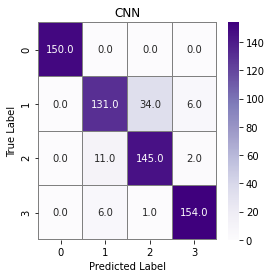

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       150
     Class 1       0.89      0.77      0.82       171
     Class 2       0.81      0.92      0.86       158
     Class 3       0.95      0.96      0.95       161

    accuracy                           0.91       640
   macro avg       0.91      0.91      0.91       640
weighted avg       0.91      0.91      0.91       640



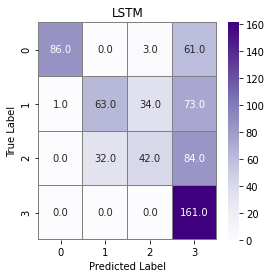

              precision    recall  f1-score   support

     Class 0       0.99      0.57      0.73       150
     Class 1       0.66      0.37      0.47       171
     Class 2       0.53      0.27      0.35       158
     Class 3       0.42      1.00      0.60       161

    accuracy                           0.55       640
   macro avg       0.65      0.55      0.54       640
weighted avg       0.65      0.55      0.53       640



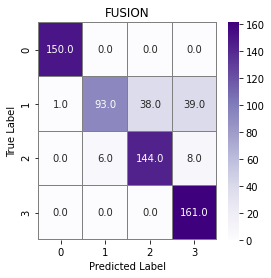

              precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00       150
     Class 1       0.94      0.54      0.69       171
     Class 2       0.79      0.91      0.85       158
     Class 3       0.77      1.00      0.87       161

    accuracy                           0.86       640
   macro avg       0.87      0.86      0.85       640
weighted avg       0.87      0.86      0.85       640



In [36]:
test_model(model_test,testImagesX,df_mv6,testY_new)


**Full Thermal Image (Colored) + 70% Sensor Missing**


In [37]:
df_mv7 = testAttrX_new.copy()

for k in range(0,round(len(df_mv7)*0.7)):
        df_mv7[random.randint(0, len(df_mv7))] = 0

In [38]:
np.where(np.all(df_mv7 == 0, axis=1))

(array([  1,   3,   4,   5,   8,   9,  14,  16,  17,  18,  22,  27,  28,
         30,  31,  33,  34,  35,  40,  41,  42,  43,  44,  45,  47,  49,
         51,  57,  58,  60,  64,  70,  73,  76,  77,  78,  79,  86,  88,
         92,  95,  97,  98, 101, 104, 105, 108, 112, 113, 117, 119, 120,
        121, 122, 124, 125, 127, 128, 129, 130, 131, 133, 136, 140, 141,
        145, 147, 149, 152, 153, 160, 162, 165, 166, 168, 170, 174, 175,
        176, 178, 179, 180, 183, 185, 187, 188, 191, 193, 194, 195, 196,
        198, 200, 202, 206, 213, 214, 219, 221, 222, 223, 224, 226, 227,
        228, 231, 236, 237, 238, 240, 243, 244, 247, 249, 250, 252, 253,
        255, 257, 259, 260, 261, 262, 265, 268, 271, 273, 277, 279, 281,
        282, 283, 284, 288, 290, 294, 299, 300, 304, 305, 307, 309, 310,
        311, 313, 314, 315, 316, 318, 322, 323, 325, 327, 328, 330, 332,
        333, 334, 335, 336, 337, 339, 340, 342, 343, 344, 347, 350, 352,
        353, 354, 356, 357, 359, 360, 362, 363, 364

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              1               1                 1
1         1              1               3                 3
2         2              2               2                 2
3         0              0               3                 0
4         1              2               3                 2
5         1              2               3                 2
6         3              3               3                 3
7         2              1               1                 1
8         2              2               3                 2
9         3              3               3                 3
10        3              3               3                 3
11        0              0               0                 0
12        1              1               1                 1
13        0              0               0                 0
14        2              2               3                 2
15        2             

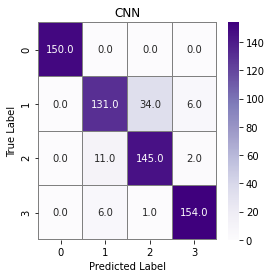

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       150
     Class 1       0.89      0.77      0.82       171
     Class 2       0.81      0.92      0.86       158
     Class 3       0.95      0.96      0.95       161

    accuracy                           0.91       640
   macro avg       0.91      0.91      0.91       640
weighted avg       0.91      0.91      0.91       640



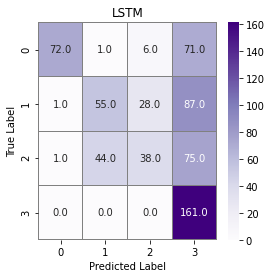

              precision    recall  f1-score   support

     Class 0       0.97      0.48      0.64       150
     Class 1       0.55      0.32      0.41       171
     Class 2       0.53      0.24      0.33       158
     Class 3       0.41      1.00      0.58       161

    accuracy                           0.51       640
   macro avg       0.61      0.51      0.49       640
weighted avg       0.61      0.51      0.49       640



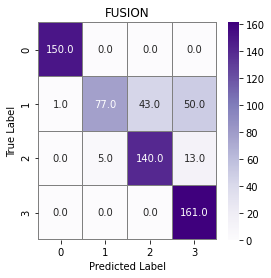

              precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00       150
     Class 1       0.94      0.45      0.61       171
     Class 2       0.77      0.89      0.82       158
     Class 3       0.72      1.00      0.84       161

    accuracy                           0.82       640
   macro avg       0.85      0.83      0.82       640
weighted avg       0.85      0.82      0.81       640



In [39]:
test_model(model_test,testImagesX,df_mv7,testY_new)


**Full Thermal Image (Colored) + 80% Sensor Missing**


In [40]:
df_mv8 = testAttrX_new.copy()

for k in range(0,round(len(df_mv8)*0.8)):
        df_mv8[random.randint(0, len(df_mv8))] = 0

In [41]:
np.where(np.all(df_mv8== 0, axis=1))


(array([  1,   2,   3,   4,   7,   8,   9,  10,  14,  15,  16,  17,  20,
         21,  23,  24,  26,  28,  29,  30,  31,  32,  33,  34,  35,  39,
         40,  42,  44,  47,  49,  50,  52,  53,  54,  56,  57,  58,  59,
         62,  63,  66,  68,  69,  72,  73,  74,  77,  81,  83,  85,  87,
         90,  92,  94,  95,  97, 100, 101, 102, 103, 104, 105, 108, 111,
        113, 116, 118, 119, 121, 122, 128, 132, 136, 137, 138, 139, 141,
        143, 145, 146, 147, 148, 150, 152, 156, 157, 158, 161, 162, 163,
        167, 168, 169, 170, 174, 176, 179, 180, 181, 183, 184, 188, 189,
        190, 191, 193, 195, 196, 201, 203, 204, 205, 206, 208, 210, 211,
        212, 214, 215, 216, 217, 221, 223, 224, 227, 228, 230, 231, 232,
        233, 234, 235, 237, 238, 239, 249, 250, 251, 252, 253, 255, 258,
        262, 263, 266, 268, 269, 270, 271, 272, 273, 278, 281, 282, 284,
        285, 287, 289, 291, 292, 293, 294, 295, 297, 298, 300, 301, 303,
        305, 306, 308, 309, 312, 313, 320, 321, 322

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              1               1                 1
1         1              1               3                 3
2         2              2               3                 2
3         0              0               3                 0
4         1              2               3                 2
5         1              2               1                 2
6         3              3               3                 3
7         2              1               3                 2
8         2              2               3                 2
9         3              3               3                 3
10        3              3               3                 3
11        0              0               0                 0
12        1              1               1                 1
13        0              0               0                 0
14        2              2               3                 2
15        2             

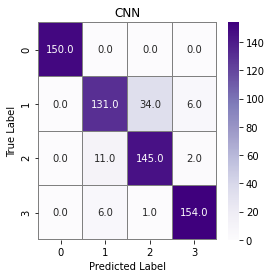

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       150
     Class 1       0.89      0.77      0.82       171
     Class 2       0.81      0.92      0.86       158
     Class 3       0.95      0.96      0.95       161

    accuracy                           0.91       640
   macro avg       0.91      0.91      0.91       640
weighted avg       0.91      0.91      0.91       640



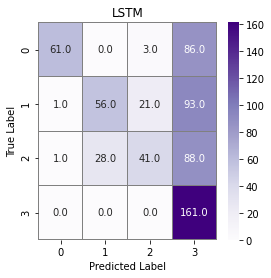

              precision    recall  f1-score   support

     Class 0       0.97      0.41      0.57       150
     Class 1       0.67      0.33      0.44       171
     Class 2       0.63      0.26      0.37       158
     Class 3       0.38      1.00      0.55       161

    accuracy                           0.50       640
   macro avg       0.66      0.50      0.48       640
weighted avg       0.66      0.50      0.48       640



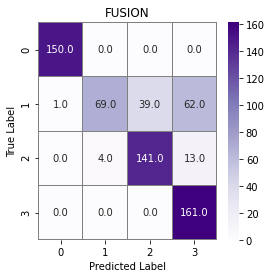

              precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00       150
     Class 1       0.95      0.40      0.57       171
     Class 2       0.78      0.89      0.83       158
     Class 3       0.68      1.00      0.81       161

    accuracy                           0.81       640
   macro avg       0.85      0.82      0.80       640
weighted avg       0.85      0.81      0.79       640



In [42]:
test_model(model_test,testImagesX,df_mv8,testY_new)

**Full Thermal Image (Colored) + 90% Sensor Missing**


In [44]:
df_mv9 = testAttrX_new.copy()

for k in range(0,round(len(df_mv9)*0.9)):
        df_mv9[random.randint(0, len(df_mv9))] = 0

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              1               1                 1
1         1              1               3                 3
2         2              2               3                 2
3         0              0               3                 0
4         1              2               1                 2
5         1              2               3                 2
6         3              3               3                 3
7         2              1               1                 1
8         2              2               2                 2
9         3              3               3                 3
10        3              3               3                 3
11        0              0               3                 0
12        1              1               1                 1
13        0              0               3                 0
14        2              2               3                 2
15        2             

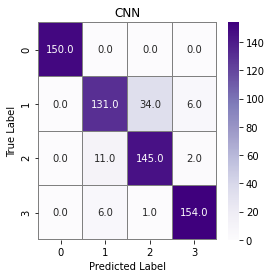

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       150
     Class 1       0.89      0.77      0.82       171
     Class 2       0.81      0.92      0.86       158
     Class 3       0.95      0.96      0.95       161

    accuracy                           0.91       640
   macro avg       0.91      0.91      0.91       640
weighted avg       0.91      0.91      0.91       640



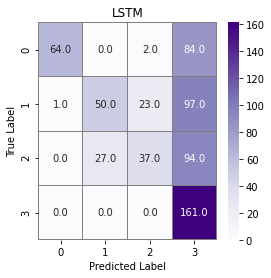

              precision    recall  f1-score   support

     Class 0       0.98      0.43      0.60       150
     Class 1       0.65      0.29      0.40       171
     Class 2       0.60      0.23      0.34       158
     Class 3       0.37      1.00      0.54       161

    accuracy                           0.49       640
   macro avg       0.65      0.49      0.47       640
weighted avg       0.64      0.49      0.47       640



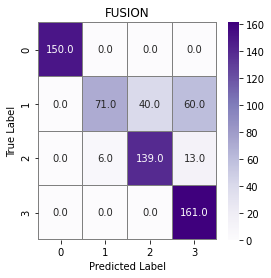

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       150
     Class 1       0.92      0.42      0.57       171
     Class 2       0.78      0.88      0.82       158
     Class 3       0.69      1.00      0.82       161

    accuracy                           0.81       640
   macro avg       0.85      0.82      0.80       640
weighted avg       0.85      0.81      0.80       640



In [45]:
test_model(model_test,testImagesX,df_mv9,testY_new)


**Co-Learning : Only Images (Sensor Null)** 

In [56]:
from keras.models import load_model
model_test = load_model('model_normalfusion64_16July.h5')

In [57]:
testAttrX_nulle=[]
attr=np.zeros((7,1),dtype='uint8')
for i in range(len(testAttrX_new)):
  testAttrX_nulle.append(attr)
testAttrX_nulle=np.array(testAttrX_nulle)

In [58]:
result=model_test.predict([testImagesX,testAttrX_nulle])
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

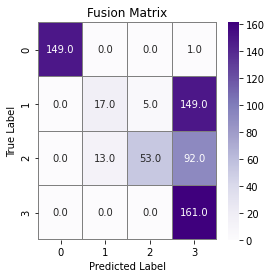

In [59]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

In [60]:
def f1_score(pred, act):
    target_names = ["Class {}".format(i) for i in range(4)]
    print(classification_report(act, pred, target_names=target_names))
    
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       1.00      0.99      1.00       150
     Class 1       0.57      0.10      0.17       171
     Class 2       0.91      0.34      0.49       158
     Class 3       0.40      1.00      0.57       161

    accuracy                           0.59       640
   macro avg       0.72      0.61      0.56       640
weighted avg       0.71      0.59      0.54       640



**10% Thermal Image Missing + Sensor Full**

In [61]:
df_mvi1 = testImagesX.copy()

for k in range(0,round(len(df_mvi1)*0.1)):
        df_mvi1[random.randint(0, len(df_mvi1))] = 0

In [62]:
result=model_test.predict([df_mvi1,testAttrX_new])
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

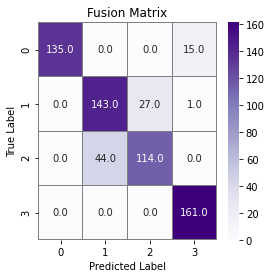

In [63]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

In [64]:
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       1.00      0.90      0.95       150
     Class 1       0.76      0.84      0.80       171
     Class 2       0.81      0.72      0.76       158
     Class 3       0.91      1.00      0.95       161

    accuracy                           0.86       640
   macro avg       0.87      0.86      0.87       640
weighted avg       0.87      0.86      0.86       640



 **20% Thermal Image Missing + Sensor Full**

In [65]:
df_mvi2 = testImagesX.copy()

for k in range(0,round(len(df_mvi2)*0.2)):
        df_mvi2[random.randint(0, len(df_mvi2))] = 0

In [66]:
result=model_test.predict([df_mvi2,testAttrX_new])
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

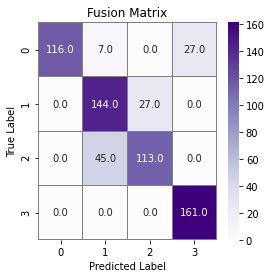

In [67]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

In [68]:
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       1.00      0.77      0.87       150
     Class 1       0.73      0.84      0.78       171
     Class 2       0.81      0.72      0.76       158
     Class 3       0.86      1.00      0.92       161

    accuracy                           0.83       640
   macro avg       0.85      0.83      0.83       640
weighted avg       0.85      0.83      0.83       640



**30% Thermal Image Missing + Sensor Full**

In [69]:
df_mvi3 = testImagesX.copy()

for k in range(0,round(len(df_mvi3)*0.3)):
        df_mvi3[random.randint(0, len(df_mvi3))] = 0

In [70]:
result=model_test.predict([df_mvi3,testAttrX_new])
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

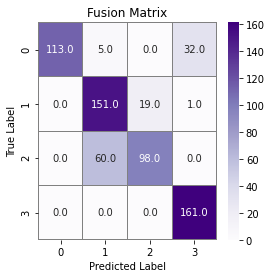

In [71]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

In [72]:
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       1.00      0.75      0.86       150
     Class 1       0.70      0.88      0.78       171
     Class 2       0.84      0.62      0.71       158
     Class 3       0.83      1.00      0.91       161

    accuracy                           0.82       640
   macro avg       0.84      0.81      0.81       640
weighted avg       0.84      0.82      0.81       640



**40% Thermal Image Missing + Sensor Full**

In [73]:
df_mvi4 = testImagesX.copy()

for k in range(0,round(len(df_mvi4)*0.4)):
        df_mvi4[random.randint(0, len(df_mvi4))] = 0

In [74]:
result=model_test.predict([df_mvi4,testAttrX_new])
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

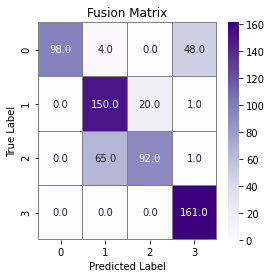

In [75]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

In [76]:
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       1.00      0.65      0.79       150
     Class 1       0.68      0.88      0.77       171
     Class 2       0.82      0.58      0.68       158
     Class 3       0.76      1.00      0.87       161

    accuracy                           0.78       640
   macro avg       0.82      0.78      0.78       640
weighted avg       0.81      0.78      0.78       640



**50% Thermal Image Missing + Sensor Full**

In [77]:
df_mvi5 = testImagesX.copy()

for k in range(0,round(len(df_mvi5)*0.5)):
        df_mvi5[random.randint(0, len(df_mvi5))] = 0

In [78]:
result=model_test.predict([df_mvi5,testAttrX_new])
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

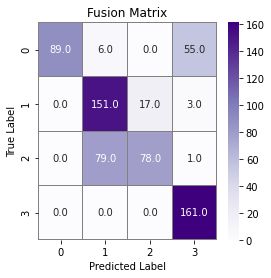

In [79]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

In [80]:
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       1.00      0.59      0.74       150
     Class 1       0.64      0.88      0.74       171
     Class 2       0.82      0.49      0.62       158
     Class 3       0.73      1.00      0.85       161

    accuracy                           0.75       640
   macro avg       0.80      0.74      0.74       640
weighted avg       0.79      0.75      0.74       640



**60% Thermal Image Missing + Sensor Full**

In [81]:
df_mvi6 = testImagesX.copy()

for k in range(0,round(len(df_mvi6)*0.6)):
        df_mvi6[random.randint(0, len(df_mvi6))] = 0

IndexError: ignored

In [82]:
result=model_test.predict([df_mvi6,testAttrX_new])
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

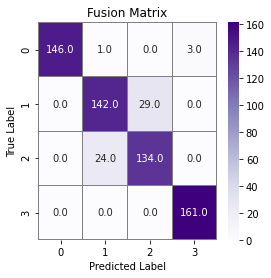

In [83]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

In [84]:
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       1.00      0.97      0.99       150
     Class 1       0.85      0.83      0.84       171
     Class 2       0.82      0.85      0.83       158
     Class 3       0.98      1.00      0.99       161

    accuracy                           0.91       640
   macro avg       0.91      0.91      0.91       640
weighted avg       0.91      0.91      0.91       640



**70% Thermal Image Missing + Sensor Full**

In [85]:
df_mvi7 = testImagesX.copy()

for k in range(0,round(len(df_mvi7)*0.7)):
        df_mvi7[random.randint(0, len(df_mvi7))] = 0

In [86]:
result=model_test.predict([df_mvi7,testAttrX_new])
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

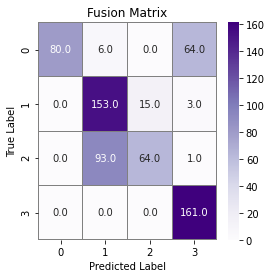

In [87]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

In [88]:
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       1.00      0.53      0.70       150
     Class 1       0.61      0.89      0.72       171
     Class 2       0.81      0.41      0.54       158
     Class 3       0.70      1.00      0.83       161

    accuracy                           0.72       640
   macro avg       0.78      0.71      0.70       640
weighted avg       0.77      0.72      0.70       640



**80% Thermal Image Missing + Sensor Full**

In [89]:
df_mvi8 = testImagesX.copy()

for k in range(0,round(len(df_mvi8)*0.8)):
        df_mvi8[random.randint(0, len(df_mvi8))] = 0

IndexError: ignored

In [90]:
result=model_test.predict([df_mvi8,testAttrX_new])
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

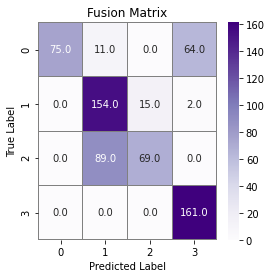

In [91]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

In [92]:
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       1.00      0.50      0.67       150
     Class 1       0.61      0.90      0.72       171
     Class 2       0.82      0.44      0.57       158
     Class 3       0.71      1.00      0.83       161

    accuracy                           0.72       640
   macro avg       0.78      0.71      0.70       640
weighted avg       0.78      0.72      0.70       640



**90% Thermal Image Missing + Sensor Full**

In [93]:
df_mvi9 = testImagesX.copy()

for k in range(0,round(len(df_mvi8)*0.9)):
        df_mvi9[random.randint(0, len(df_mvi9))] = 0

IndexError: ignored

In [94]:
result=model_test.predict([df_mvi9,testAttrX_new])
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

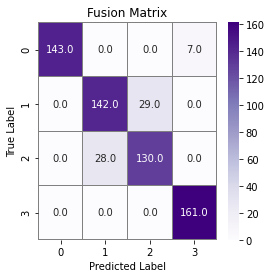

In [95]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

In [96]:
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       1.00      0.95      0.98       150
     Class 1       0.84      0.83      0.83       171
     Class 2       0.82      0.82      0.82       158
     Class 3       0.96      1.00      0.98       161

    accuracy                           0.90       640
   macro avg       0.90      0.90      0.90       640
weighted avg       0.90      0.90      0.90       640



**Only Images, Sensor Null (Multi)**

In [98]:
from keras.models import load_model
model_test= load_model('model_fusion64multi_17July.h5')

In [99]:
testAttrX_nulle=[]
attr=np.zeros((7,1),dtype='uint8')
for i in range(len(testAttrX_new)):
  testAttrX_nulle.append(attr)
testAttrX_nulle=np.array(testAttrX_nulle)

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              1               3                 2
1         1              1               3                 3
2         2              2               3                 2
3         0              0               3                 0
4         1              2               3                 2
5         1              2               3                 2
6         3              3               3                 3
7         2              1               3                 2
8         2              2               3                 2
9         3              3               3                 3
10        3              3               3                 3
11        0              0               3                 0
12        1              1               3                 3
13        0              0               3                 0
14        2              2               3                 2
15        2             

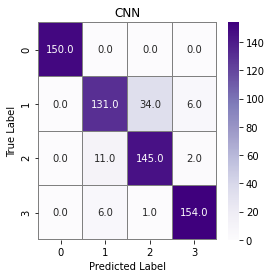

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       150
     Class 1       0.89      0.77      0.82       171
     Class 2       0.81      0.92      0.86       158
     Class 3       0.95      0.96      0.95       161

    accuracy                           0.91       640
   macro avg       0.91      0.91      0.91       640
weighted avg       0.91      0.91      0.91       640



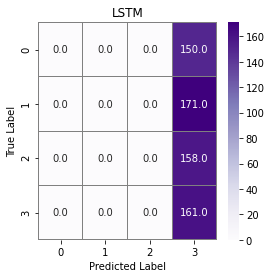

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       150
     Class 1       0.00      0.00      0.00       171
     Class 2       0.00      0.00      0.00       158
     Class 3       0.25      1.00      0.40       161

    accuracy                           0.25       640
   macro avg       0.06      0.25      0.10       640
weighted avg       0.06      0.25      0.10       640



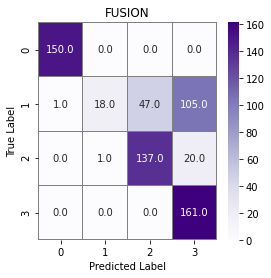

              precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00       150
     Class 1       0.95      0.11      0.19       171
     Class 2       0.74      0.87      0.80       158
     Class 3       0.56      1.00      0.72       161

    accuracy                           0.73       640
   macro avg       0.81      0.74      0.68       640
weighted avg       0.81      0.73      0.66       640



In [100]:
test_model(model_test,testImagesX,testAttrX_nulle,testY_new)


**Full Sensor + 10% Thermal Image Missing**


In [101]:
df_mvi1 = testImagesX.copy()

for k in range(0,round(len(df_mvi1)*0.1)):
        df_mvi1[random.randint(0, len(df_mvi1))] = 0

In [102]:
np.where(np.all(df_mvi1 == 0, axis=1))

(array([  8,   8,   8, ..., 625, 625, 625]),
 array([ 0,  0,  0, ..., 63, 63, 63]),
 array([0, 1, 2, ..., 0, 1, 2]))

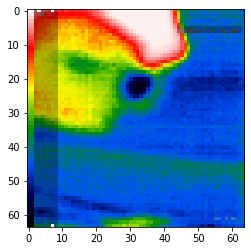

In [103]:
import tensorflow as tf
plt.imshow(tf.squeeze(df_mvi1[5]))

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              1               1                 1
1         1              1               2                 2
2         2              2               2                 2
3         0              0               0                 0
4         1              2               1                 2
5         1              2               1                 2
6         3              3               3                 3
7         2              1               1                 1
8         2              1               2                 1
9         3              3               3                 3
10        3              3               3                 3
11        0              0               0                 0
12        1              1               1                 1
13        0              0               0                 0
14        2              2               1                 2
15        2             

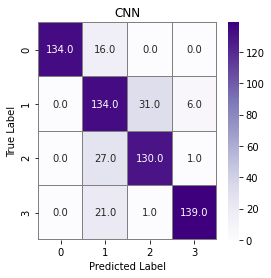

              precision    recall  f1-score   support

     Class 0       1.00      0.89      0.94       150
     Class 1       0.68      0.78      0.73       171
     Class 2       0.80      0.82      0.81       158
     Class 3       0.95      0.86      0.91       161

    accuracy                           0.84       640
   macro avg       0.86      0.84      0.85       640
weighted avg       0.85      0.84      0.84       640



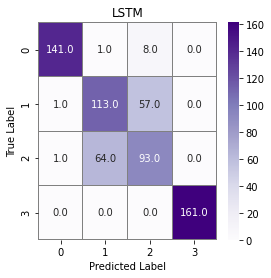

              precision    recall  f1-score   support

     Class 0       0.99      0.94      0.96       150
     Class 1       0.63      0.66      0.65       171
     Class 2       0.59      0.59      0.59       158
     Class 3       1.00      1.00      1.00       161

    accuracy                           0.79       640
   macro avg       0.80      0.80      0.80       640
weighted avg       0.80      0.79      0.80       640



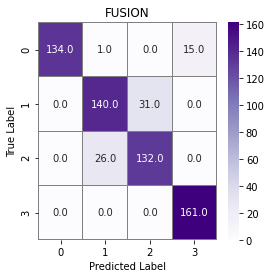

              precision    recall  f1-score   support

     Class 0       1.00      0.89      0.94       150
     Class 1       0.84      0.82      0.83       171
     Class 2       0.81      0.84      0.82       158
     Class 3       0.91      1.00      0.96       161

    accuracy                           0.89       640
   macro avg       0.89      0.89      0.89       640
weighted avg       0.89      0.89      0.89       640



In [104]:
test_model(model_test,df_mvi1,testAttrX_new,testY_new)


**Full Sensor + 20% Thermal Image Missing**


In [105]:
df_mvi2 = testImagesX.copy()

for k in range(0,round(len(df_mvi2)*0.2)):
        df_mvi2[random.randint(0, len(df_mvi2))] = 0

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              1               1                 1
1         1              1               2                 2
2         2              1               2                 1
3         0              1               0                 3
4         1              2               1                 2
5         1              1               1                 1
6         3              3               3                 3
7         2              1               1                 1
8         2              1               2                 1
9         3              3               3                 3
10        3              3               3                 3
11        0              0               0                 0
12        1              1               1                 1
13        0              1               0                 3
14        2              2               1                 2
15        2             

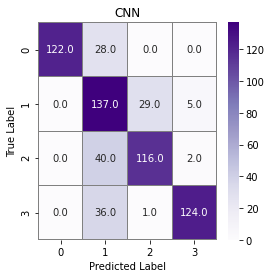

              precision    recall  f1-score   support

     Class 0       1.00      0.81      0.90       150
     Class 1       0.57      0.80      0.67       171
     Class 2       0.79      0.73      0.76       158
     Class 3       0.95      0.77      0.85       161

    accuracy                           0.78       640
   macro avg       0.83      0.78      0.79       640
weighted avg       0.82      0.78      0.79       640



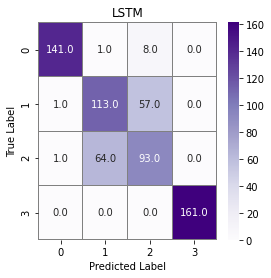

              precision    recall  f1-score   support

     Class 0       0.99      0.94      0.96       150
     Class 1       0.63      0.66      0.65       171
     Class 2       0.59      0.59      0.59       158
     Class 3       1.00      1.00      1.00       161

    accuracy                           0.79       640
   macro avg       0.80      0.80      0.80       640
weighted avg       0.80      0.79      0.80       640



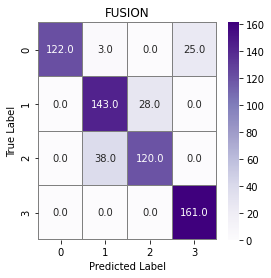

              precision    recall  f1-score   support

     Class 0       1.00      0.81      0.90       150
     Class 1       0.78      0.84      0.81       171
     Class 2       0.81      0.76      0.78       158
     Class 3       0.87      1.00      0.93       161

    accuracy                           0.85       640
   macro avg       0.86      0.85      0.85       640
weighted avg       0.86      0.85      0.85       640



In [106]:
test_model(model_test,df_mvi2,testAttrX_new,testY_new)


**Full Sensor + 30% Thermal Image Missing**


In [107]:
df_mvi3 = testImagesX.copy()

for k in range(0,round(len(df_mvi3)*0.3)):
        df_mvi3[random.randint(0, len(df_mvi3))] = 0

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              1               1                 1
1         1              1               2                 2
2         2              1               2                 1
3         0              1               0                 3
4         1              2               1                 2
5         1              2               1                 2
6         3              3               3                 3
7         2              1               1                 1
8         2              2               2                 2
9         3              1               3                 3
10        3              1               3                 3
11        0              0               0                 0
12        1              1               1                 1
13        0              0               0                 0
14        2              2               1                 2
15        2             

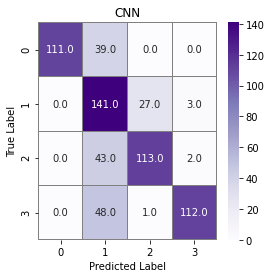

              precision    recall  f1-score   support

     Class 0       1.00      0.74      0.85       150
     Class 1       0.52      0.82      0.64       171
     Class 2       0.80      0.72      0.76       158
     Class 3       0.96      0.70      0.81       161

    accuracy                           0.75       640
   macro avg       0.82      0.74      0.76       640
weighted avg       0.81      0.75      0.76       640



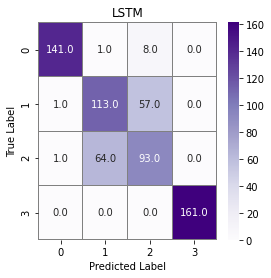

              precision    recall  f1-score   support

     Class 0       0.99      0.94      0.96       150
     Class 1       0.63      0.66      0.65       171
     Class 2       0.59      0.59      0.59       158
     Class 3       1.00      1.00      1.00       161

    accuracy                           0.79       640
   macro avg       0.80      0.80      0.80       640
weighted avg       0.80      0.79      0.80       640



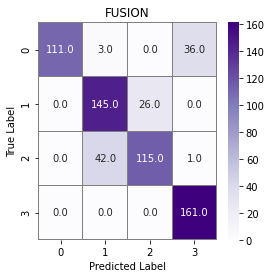

              precision    recall  f1-score   support

     Class 0       1.00      0.74      0.85       150
     Class 1       0.76      0.85      0.80       171
     Class 2       0.82      0.73      0.77       158
     Class 3       0.81      1.00      0.90       161

    accuracy                           0.83       640
   macro avg       0.85      0.83      0.83       640
weighted avg       0.84      0.83      0.83       640



In [108]:
test_model(model_test,df_mvi3,testAttrX_new,testY_new)


**Full Sensor + 40% Thermal Image Missing**


In [117]:
df_mvi4 = testImagesX.copy()

for k in range(0,round(len(df_mvi4)*0.4)):
        df_mvi4[random.randint(0, len(df_mvi4))] = 0

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              1               1                 1
1         1              1               2                 1
2         2              1               2                 1
3         0              1               0                 3
4         1              2               1                 2
5         1              1               1                 1
6         3              3               3                 3
7         2              1               1                 1
8         2              2               2                 2
9         3              1               3                 3
10        3              3               3                 3
11        0              0               0                 0
12        1              1               1                 1
13        0              0               0                 0
14        2              2               1                 2
15        2             

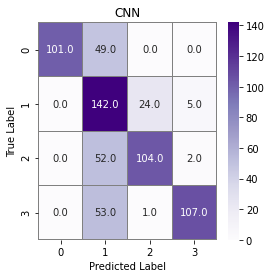

              precision    recall  f1-score   support

     Class 0       1.00      0.67      0.80       150
     Class 1       0.48      0.83      0.61       171
     Class 2       0.81      0.66      0.72       158
     Class 3       0.94      0.66      0.78       161

    accuracy                           0.71       640
   macro avg       0.81      0.71      0.73       640
weighted avg       0.80      0.71      0.73       640



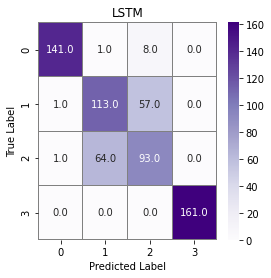

              precision    recall  f1-score   support

     Class 0       0.99      0.94      0.96       150
     Class 1       0.63      0.66      0.65       171
     Class 2       0.59      0.59      0.59       158
     Class 3       1.00      1.00      1.00       161

    accuracy                           0.79       640
   macro avg       0.80      0.80      0.80       640
weighted avg       0.80      0.79      0.80       640



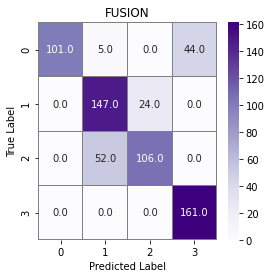

              precision    recall  f1-score   support

     Class 0       1.00      0.67      0.80       150
     Class 1       0.72      0.86      0.78       171
     Class 2       0.82      0.67      0.74       158
     Class 3       0.79      1.00      0.88       161

    accuracy                           0.80       640
   macro avg       0.83      0.80      0.80       640
weighted avg       0.83      0.80      0.80       640



In [118]:
test_model(model_test,df_mvi4,testAttrX_new,testY_new)


**Full Sensor + 50% Thermal Image Missing**


In [111]:
df_mvi5 = testImagesX.copy()

for k in range(0,round(len(df_mvi5)*0.5)):
        df_mvi5[random.randint(0, len(df_mvi5))] = 0

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              1               1                 1
1         1              1               2                 1
2         2              2               2                 2
3         0              0               0                 0
4         1              1               1                 1
5         1              2               1                 2
6         3              3               3                 3
7         2              1               1                 1
8         2              2               2                 2
9         3              3               3                 3
10        3              1               3                 3
11        0              1               0                 3
12        1              1               1                 1
13        0              0               0                 0
14        2              2               1                 2
15        2             

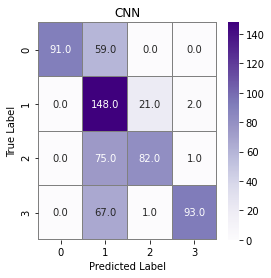

              precision    recall  f1-score   support

     Class 0       1.00      0.61      0.76       150
     Class 1       0.42      0.87      0.57       171
     Class 2       0.79      0.52      0.63       158
     Class 3       0.97      0.58      0.72       161

    accuracy                           0.65       640
   macro avg       0.80      0.64      0.67       640
weighted avg       0.79      0.65      0.67       640



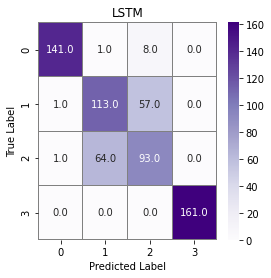

              precision    recall  f1-score   support

     Class 0       0.99      0.94      0.96       150
     Class 1       0.63      0.66      0.65       171
     Class 2       0.59      0.59      0.59       158
     Class 3       1.00      1.00      1.00       161

    accuracy                           0.79       640
   macro avg       0.80      0.80      0.80       640
weighted avg       0.80      0.79      0.80       640



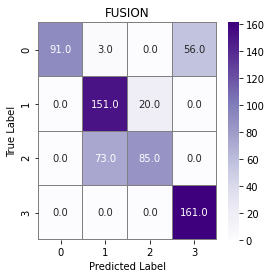

              precision    recall  f1-score   support

     Class 0       1.00      0.61      0.76       150
     Class 1       0.67      0.88      0.76       171
     Class 2       0.81      0.54      0.65       158
     Class 3       0.74      1.00      0.85       161

    accuracy                           0.76       640
   macro avg       0.80      0.76      0.75       640
weighted avg       0.80      0.76      0.75       640



In [112]:
test_model(model_test,df_mvi5,testAttrX_new,testY_new)


**Full Sensor + 60% Thermal Image Missing**


In [119]:
df_mvi6 = testImagesX.copy()

for k in range(0,round(len(df_mvi6)*0.6)):
        df_mvi6[random.randint(0, len(df_mvi6))] = 0

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              1               1                 1
1         1              1               2                 2
2         2              2               2                 2
3         0              1               0                 3
4         1              2               1                 2
5         1              2               1                 2
6         3              1               3                 3
7         2              1               1                 1
8         2              1               2                 1
9         3              1               3                 3
10        3              3               3                 3
11        0              1               0                 3
12        1              1               1                 1
13        0              1               0                 3
14        2              2               1                 2
15        2             

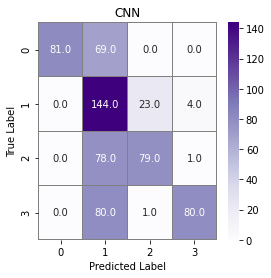

              precision    recall  f1-score   support

     Class 0       1.00      0.54      0.70       150
     Class 1       0.39      0.84      0.53       171
     Class 2       0.77      0.50      0.61       158
     Class 3       0.94      0.50      0.65       161

    accuracy                           0.60       640
   macro avg       0.77      0.59      0.62       640
weighted avg       0.76      0.60      0.62       640



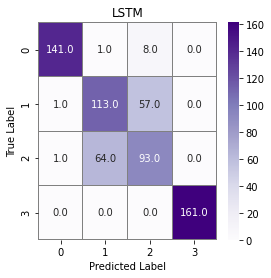

              precision    recall  f1-score   support

     Class 0       0.99      0.94      0.96       150
     Class 1       0.63      0.66      0.65       171
     Class 2       0.59      0.59      0.59       158
     Class 3       1.00      1.00      1.00       161

    accuracy                           0.79       640
   macro avg       0.80      0.80      0.80       640
weighted avg       0.80      0.79      0.80       640



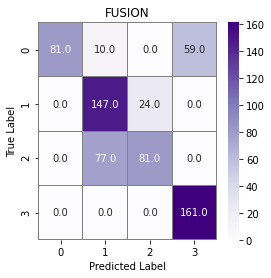

              precision    recall  f1-score   support

     Class 0       1.00      0.54      0.70       150
     Class 1       0.63      0.86      0.73       171
     Class 2       0.77      0.51      0.62       158
     Class 3       0.73      1.00      0.85       161

    accuracy                           0.73       640
   macro avg       0.78      0.73      0.72       640
weighted avg       0.78      0.73      0.72       640



In [120]:
test_model(model_test,df_mvi6,testAttrX_new,testY_new)


**Full Sensor + 70% Thermal Image Missing**


In [121]:
df_mvi7 = testImagesX.copy()

for k in range(0,round(len(df_mvi7)*0.7)):
        df_mvi7[random.randint(0, len(df_mvi7))] = 0

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              1               1                 1
1         1              1               2                 2
2         2              1               2                 1
3         0              1               0                 3
4         1              1               1                 1
5         1              2               1                 2
6         3              1               3                 3
7         2              1               1                 1
8         2              1               2                 1
9         3              3               3                 3
10        3              3               3                 3
11        0              1               0                 3
12        1              1               1                 1
13        0              1               0                 3
14        2              1               1                 1
15        2             

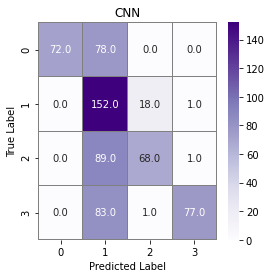

              precision    recall  f1-score   support

     Class 0       1.00      0.48      0.65       150
     Class 1       0.38      0.89      0.53       171
     Class 2       0.78      0.43      0.56       158
     Class 3       0.97      0.48      0.64       161

    accuracy                           0.58       640
   macro avg       0.78      0.57      0.59       640
weighted avg       0.77      0.58      0.59       640



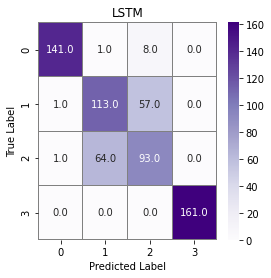

              precision    recall  f1-score   support

     Class 0       0.99      0.94      0.96       150
     Class 1       0.63      0.66      0.65       171
     Class 2       0.59      0.59      0.59       158
     Class 3       1.00      1.00      1.00       161

    accuracy                           0.79       640
   macro avg       0.80      0.80      0.80       640
weighted avg       0.80      0.79      0.80       640



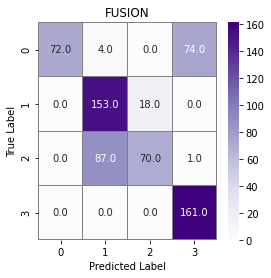

              precision    recall  f1-score   support

     Class 0       1.00      0.48      0.65       150
     Class 1       0.63      0.89      0.74       171
     Class 2       0.80      0.44      0.57       158
     Class 3       0.68      1.00      0.81       161

    accuracy                           0.71       640
   macro avg       0.78      0.70      0.69       640
weighted avg       0.77      0.71      0.69       640



In [122]:
test_model(model_test,df_mvi7,testAttrX_new,testY_new)


**Full Sensor + 80% Thermal Image Missing**


In [123]:
df_mvi8 = testImagesX.copy()

for k in range(0,round(len(df_mvi8)*0.8)):
        df_mvi8[random.randint(0, len(df_mvi8))] = 0

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              1               1                 1
1         1              1               2                 1
2         2              2               2                 2
3         0              1               0                 3
4         1              1               1                 1
5         1              1               1                 1
6         3              3               3                 3
7         2              1               1                 1
8         2              2               2                 2
9         3              3               3                 3
10        3              3               3                 3
11        0              1               0                 3
12        1              1               1                 1
13        0              1               0                 3
14        2              2               1                 2
15        2             

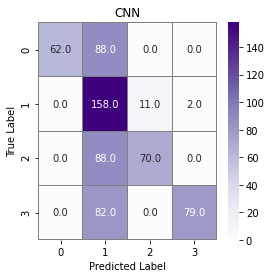

              precision    recall  f1-score   support

     Class 0       1.00      0.41      0.58       150
     Class 1       0.38      0.92      0.54       171
     Class 2       0.86      0.44      0.59       158
     Class 3       0.98      0.49      0.65       161

    accuracy                           0.58       640
   macro avg       0.80      0.57      0.59       640
weighted avg       0.79      0.58      0.59       640



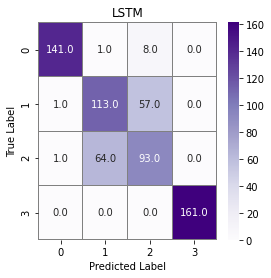

              precision    recall  f1-score   support

     Class 0       0.99      0.94      0.96       150
     Class 1       0.63      0.66      0.65       171
     Class 2       0.59      0.59      0.59       158
     Class 3       1.00      1.00      1.00       161

    accuracy                           0.79       640
   macro avg       0.80      0.80      0.80       640
weighted avg       0.80      0.79      0.80       640



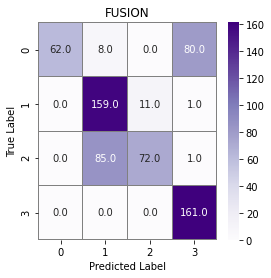

              precision    recall  f1-score   support

     Class 0       1.00      0.41      0.58       150
     Class 1       0.63      0.93      0.75       171
     Class 2       0.87      0.46      0.60       158
     Class 3       0.66      1.00      0.80       161

    accuracy                           0.71       640
   macro avg       0.79      0.70      0.68       640
weighted avg       0.78      0.71      0.69       640



In [124]:
test_model(model_test,df_mvi8,testAttrX_new,testY_new)


**Full Sensor + 90% Thermal Image Missing**


In [128]:
df_mvi9 = testImagesX.copy()

for k in range(0,round(len(df_mvi8)*0.9)):
        df_mvi9[random.randint(0, len(df_mvi9))] = 0

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              1               1                 1
1         1              1               2                 1
2         2              1               2                 1
3         0              1               0                 3
4         1              1               1                 1
5         1              2               1                 2
6         3              1               3                 3
7         2              1               1                 1
8         2              1               2                 1
9         3              3               3                 3
10        3              3               3                 3
11        0              1               0                 3
12        1              1               1                 1
13        0              0               0                 0
14        2              2               1                 2
15        2             

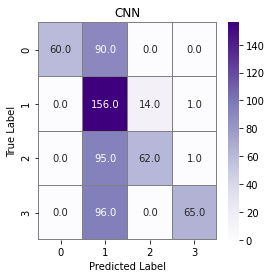

              precision    recall  f1-score   support

     Class 0       1.00      0.40      0.57       150
     Class 1       0.36      0.91      0.51       171
     Class 2       0.82      0.39      0.53       158
     Class 3       0.97      0.40      0.57       161

    accuracy                           0.54       640
   macro avg       0.79      0.53      0.55       640
weighted avg       0.78      0.54      0.55       640



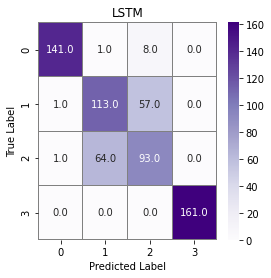

              precision    recall  f1-score   support

     Class 0       0.99      0.94      0.96       150
     Class 1       0.63      0.66      0.65       171
     Class 2       0.59      0.59      0.59       158
     Class 3       1.00      1.00      1.00       161

    accuracy                           0.79       640
   macro avg       0.80      0.80      0.80       640
weighted avg       0.80      0.79      0.80       640



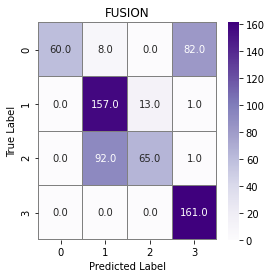

              precision    recall  f1-score   support

     Class 0       1.00      0.40      0.57       150
     Class 1       0.61      0.92      0.73       171
     Class 2       0.83      0.41      0.55       158
     Class 3       0.66      1.00      0.79       161

    accuracy                           0.69       640
   macro avg       0.78      0.68      0.66       640
weighted avg       0.77      0.69      0.67       640



In [129]:
test_model(model_test,df_mvi9,testAttrX_new,testY_new)


 **Alternate : (Odd : MQ Row 0 + Color Image) + (Even : Normal MQ Row + Black)**





In [ ]:
#Making odd sensors array 0 
alternatesenodd = testAttrX_new.copy()
for i in range(1,len(alternatesenodd),2):
  alternatesenodd[i] = 0

In [ ]:
#Making even images black
alternateevenimg = testImagesX.copy()
for i in range(0,len(alternateevenimg),2):
  alternateevenimg[i] = 0

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              3               2                 1
1         1              1               3                 3
2         2              3               2                 1
3         0              0               3                 0
4         1              3               1                 1
5         1              1               3                 3
6         3              3               3                 3
7         2              2               3                 3
8         2              3               2                 3
9         3              3               3                 3
10        3              3               3                 3
11        0              0               3                 0
12        1              3               2                 1
13        0              0               3                 0
14        2              3               2                 1
15        2             

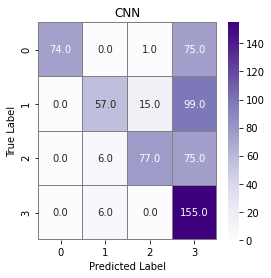

              precision    recall  f1-score   support

     Class 0       1.00      0.49      0.66       150
     Class 1       0.83      0.33      0.47       171
     Class 2       0.83      0.49      0.61       158
     Class 3       0.38      0.96      0.55       161

    accuracy                           0.57       640
   macro avg       0.76      0.57      0.57       640
weighted avg       0.76      0.57      0.57       640



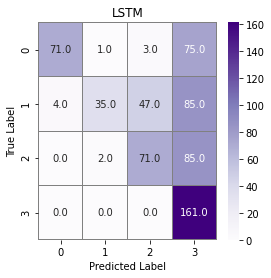

              precision    recall  f1-score   support

     Class 0       0.95      0.47      0.63       150
     Class 1       0.92      0.20      0.33       171
     Class 2       0.59      0.45      0.51       158
     Class 3       0.40      1.00      0.57       161

    accuracy                           0.53       640
   macro avg       0.71      0.53      0.51       640
weighted avg       0.71      0.53      0.51       640



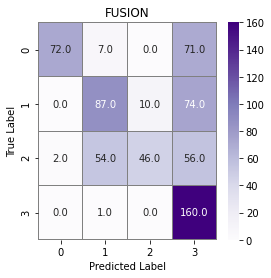

              precision    recall  f1-score   support

     Class 0       0.97      0.48      0.64       150
     Class 1       0.58      0.51      0.54       171
     Class 2       0.82      0.29      0.43       158
     Class 3       0.44      0.99      0.61       161

    accuracy                           0.57       640
   macro avg       0.71      0.57      0.56       640
weighted avg       0.70      0.57      0.56       640



In [ ]:
test_model(model_test,alternateevenimg,alternatesenodd,testY_new)


**Alternate : (Even : MQ Row 0 + Color Image) + (Odd : Normal MQ Row + Black)**





In [ ]:
#Making even sensors array 0 
alternate = testAttrX_new.copy()
for i in range(0,len(alternate),2):
  alternate[i] = 0

In [ ]:
#Making odd images black
alternateimg = testImagesX.copy()
for i in range(1,len(alternateimg),2):
  alternateimg[i] = 0

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              2               3                 2
1         1              3               2                 1
2         2              2               3                 2
3         0              3               0                 3
4         1              2               3                 2
5         1              3               2                 1
6         3              3               3                 3
7         2              3               2                 1
8         2              2               3                 2
9         3              3               3                 3
10        3              3               3                 3
11        0              3               0                 3
12        1              3               3                 3
13        0              3               0                 3
14        2              2               3                 2
15        2             

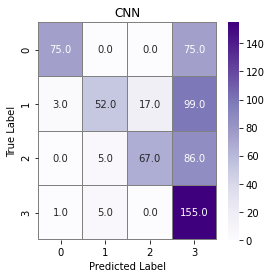

              precision    recall  f1-score   support

     Class 0       0.95      0.50      0.66       150
     Class 1       0.84      0.30      0.45       171
     Class 2       0.80      0.42      0.55       158
     Class 3       0.37      0.96      0.54       161

    accuracy                           0.55       640
   macro avg       0.74      0.55      0.55       640
weighted avg       0.74      0.55      0.54       640



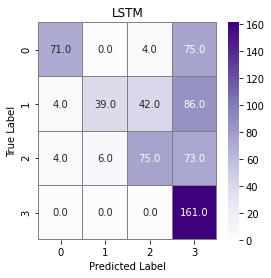

              precision    recall  f1-score   support

     Class 0       0.90      0.47      0.62       150
     Class 1       0.87      0.23      0.36       171
     Class 2       0.62      0.47      0.54       158
     Class 3       0.41      1.00      0.58       161

    accuracy                           0.54       640
   macro avg       0.70      0.54      0.52       640
weighted avg       0.70      0.54      0.52       640



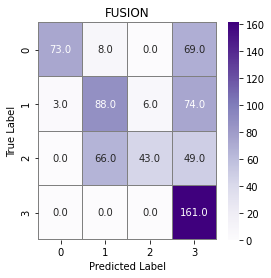

              precision    recall  f1-score   support

     Class 0       0.96      0.49      0.65       150
     Class 1       0.54      0.51      0.53       171
     Class 2       0.88      0.27      0.42       158
     Class 3       0.46      1.00      0.63       161

    accuracy                           0.57       640
   macro avg       0.71      0.57      0.55       640
weighted avg       0.70      0.57      0.55       640



In [ ]:
test_model(model_test,alternateimg,alternate,testY_new)


**Drop MQ2 Column** 

In [ ]:
MQ2drop = testAttrX.copy()
MQ2drop.MQ2 = 0

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              2               0                 2
1         1              1               0                 1
2         2              2               0                 2
3         0              0               0                 0
4         1              2               0                 2
5         1              1               3                 1
6         3              3               3                 3
7         2              2               3                 2
8         2              2               0                 2
9         3              3               3                 3
10        3              3               3                 3
11        0              0               0                 0
12        1              3               3                 3
13        0              0               0                 0
14        2              2               0                 2
15        2             

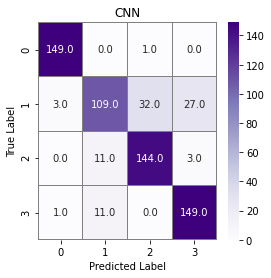

              precision    recall  f1-score   support

     Class 0       0.97      0.99      0.98       150
     Class 1       0.83      0.64      0.72       171
     Class 2       0.81      0.91      0.86       158
     Class 3       0.83      0.93      0.88       161

    accuracy                           0.86       640
   macro avg       0.86      0.87      0.86       640
weighted avg       0.86      0.86      0.86       640



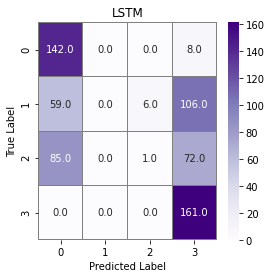

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class 0       0.50      0.95      0.65       150
     Class 1       0.00      0.00      0.00       171
     Class 2       0.14      0.01      0.01       158
     Class 3       0.46      1.00      0.63       161

    accuracy                           0.48       640
   macro avg       0.28      0.49      0.32       640
weighted avg       0.27      0.47      0.32       640



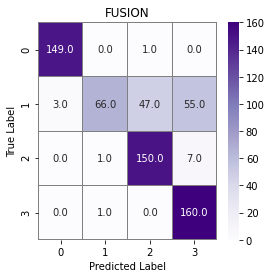

              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.99       150
     Class 1       0.97      0.39      0.55       171
     Class 2       0.76      0.95      0.84       158
     Class 3       0.72      0.99      0.84       161

    accuracy                           0.82       640
   macro avg       0.86      0.83      0.80       640
weighted avg       0.86      0.82      0.80       640



In [ ]:
test_model(model_test,testImagesX,MQ2drop,testY_new)


**Drop MQ3 Column**

In [ ]:
MQ3drop = testAttrX.copy()
MQ3drop.MQ3 = 0

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              2               0                 2
1         1              1               0                 1
2         2              2               0                 2
3         0              0               0                 0
4         1              2               0                 2
5         1              1               3                 1
6         3              3               3                 3
7         2              2               3                 2
8         2              2               0                 2
9         3              3               3                 3
10        3              3               3                 3
11        0              0               0                 0
12        1              3               3                 3
13        0              0               0                 0
14        2              2               0                 2
15        2             

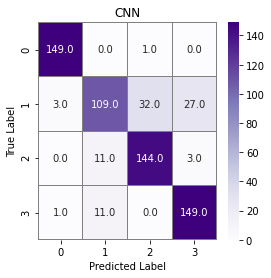

              precision    recall  f1-score   support

     Class 0       0.97      0.99      0.98       150
     Class 1       0.83      0.64      0.72       171
     Class 2       0.81      0.91      0.86       158
     Class 3       0.83      0.93      0.88       161

    accuracy                           0.86       640
   macro avg       0.86      0.87      0.86       640
weighted avg       0.86      0.86      0.86       640



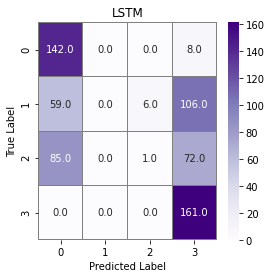

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class 0       0.50      0.95      0.65       150
     Class 1       0.00      0.00      0.00       171
     Class 2       0.14      0.01      0.01       158
     Class 3       0.46      1.00      0.63       161

    accuracy                           0.48       640
   macro avg       0.28      0.49      0.32       640
weighted avg       0.27      0.47      0.32       640



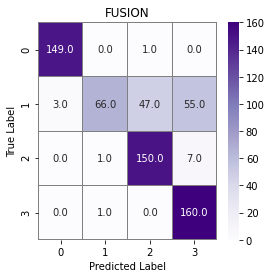

              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.99       150
     Class 1       0.97      0.39      0.55       171
     Class 2       0.76      0.95      0.84       158
     Class 3       0.72      0.99      0.84       161

    accuracy                           0.82       640
   macro avg       0.86      0.83      0.80       640
weighted avg       0.86      0.82      0.80       640



In [ ]:
test_model(model_test,testImagesX,MQ2drop,testY_new)


**Drop MQ5 Column**

In [ ]:
MQ5drop = testAttrX.copy()
MQ5drop.MQ5 = 0

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              2               3                 2
1         1              1               0                 1
2         2              2               0                 2
3         0              0               0                 0
4         1              2               0                 2
5         1              1               3                 1
6         3              3               3                 3
7         2              2               3                 2
8         2              2               0                 2
9         3              3               3                 3
10        3              3               3                 3
11        0              0               0                 0
12        1              3               3                 3
13        0              0               0                 0
14        2              2               0                 2
15        2             

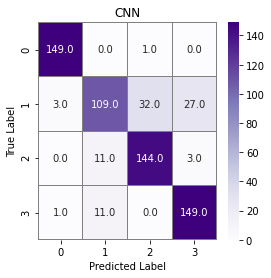

              precision    recall  f1-score   support

     Class 0       0.97      0.99      0.98       150
     Class 1       0.83      0.64      0.72       171
     Class 2       0.81      0.91      0.86       158
     Class 3       0.83      0.93      0.88       161

    accuracy                           0.86       640
   macro avg       0.86      0.87      0.86       640
weighted avg       0.86      0.86      0.86       640



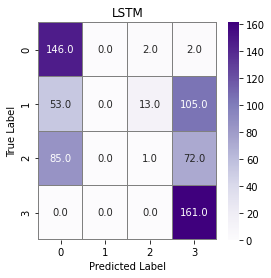

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class 0       0.51      0.97      0.67       150
     Class 1       0.00      0.00      0.00       171
     Class 2       0.06      0.01      0.01       158
     Class 3       0.47      1.00      0.64       161

    accuracy                           0.48       640
   macro avg       0.26      0.49      0.33       640
weighted avg       0.26      0.48      0.32       640



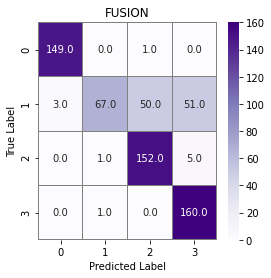

              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.99       150
     Class 1       0.97      0.39      0.56       171
     Class 2       0.75      0.96      0.84       158
     Class 3       0.74      0.99      0.85       161

    accuracy                           0.82       640
   macro avg       0.86      0.84      0.81       640
weighted avg       0.86      0.82      0.80       640



In [ ]:
test_model(model_test,testImagesX,MQ5drop,testY_new)


**Drop MQ6 Column**

In [ ]:
MQ6drop = testAttrX.copy()
MQ6drop.MQ6 = 0

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              2               3                 2
1         1              1               0                 1
2         2              2               0                 2
3         0              0               0                 0
4         1              2               2                 2
5         1              1               3                 1
6         3              3               3                 3
7         2              2               3                 2
8         2              2               0                 2
9         3              3               3                 3
10        3              3               3                 3
11        0              0               0                 0
12        1              3               3                 3
13        0              0               0                 0
14        2              2               3                 2
15        2             

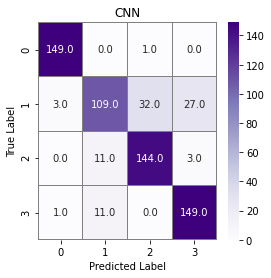

              precision    recall  f1-score   support

     Class 0       0.97      0.99      0.98       150
     Class 1       0.83      0.64      0.72       171
     Class 2       0.81      0.91      0.86       158
     Class 3       0.83      0.93      0.88       161

    accuracy                           0.86       640
   macro avg       0.86      0.87      0.86       640
weighted avg       0.86      0.86      0.86       640



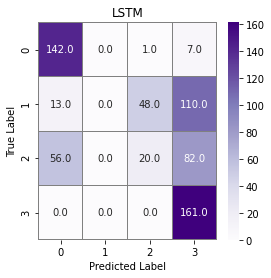

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class 0       0.67      0.95      0.79       150
     Class 1       0.00      0.00      0.00       171
     Class 2       0.29      0.13      0.18       158
     Class 3       0.45      1.00      0.62       161

    accuracy                           0.50       640
   macro avg       0.35      0.52      0.40       640
weighted avg       0.34      0.50      0.38       640



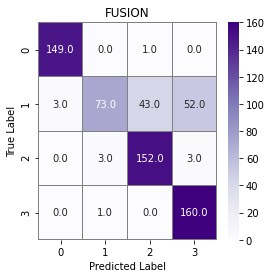

              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.99       150
     Class 1       0.95      0.43      0.59       171
     Class 2       0.78      0.96      0.86       158
     Class 3       0.74      0.99      0.85       161

    accuracy                           0.83       640
   macro avg       0.86      0.84      0.82       640
weighted avg       0.86      0.83      0.81       640



In [ ]:
test_model(model_test,testImagesX,MQ6drop,testY_new)


**Drop MQ7 Column**

In [ ]:
MQ7drop = testAttrX.copy()
MQ7drop.MQ7 = 0

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              2               2                 2
1         1              1               0                 1
2         2              2               0                 2
3         0              0               3                 0
4         1              2               2                 2
5         1              1               2                 1
6         3              3               3                 3
7         2              2               3                 2
8         2              2               2                 2
9         3              3               3                 3
10        3              3               3                 3
11        0              0               3                 0
12        1              3               2                 3
13        0              0               0                 0
14        2              2               2                 2
15        2             

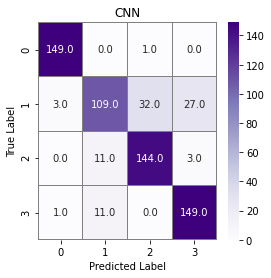

              precision    recall  f1-score   support

     Class 0       0.97      0.99      0.98       150
     Class 1       0.83      0.64      0.72       171
     Class 2       0.81      0.91      0.86       158
     Class 3       0.83      0.93      0.88       161

    accuracy                           0.86       640
   macro avg       0.86      0.87      0.86       640
weighted avg       0.86      0.86      0.86       640



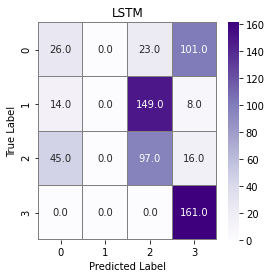

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class 0       0.31      0.17      0.22       150
     Class 1       0.00      0.00      0.00       171
     Class 2       0.36      0.61      0.45       158
     Class 3       0.56      1.00      0.72       161

    accuracy                           0.44       640
   macro avg       0.31      0.45      0.35       640
weighted avg       0.30      0.44      0.35       640



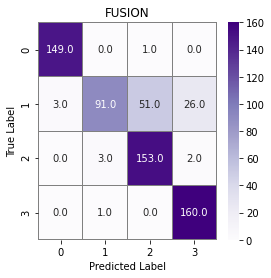

              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.99       150
     Class 1       0.96      0.53      0.68       171
     Class 2       0.75      0.97      0.84       158
     Class 3       0.85      0.99      0.92       161

    accuracy                           0.86       640
   macro avg       0.88      0.87      0.86       640
weighted avg       0.88      0.86      0.85       640



In [ ]:
test_model(model_test,testImagesX,MQ7drop,testY_new)


**Drop MQ8 Column**

In [ ]:
MQ8drop = testAttrX.copy()
MQ8drop.MQ8 = 0

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              2               0                 2
1         1              1               0                 1
2         2              2               0                 2
3         0              0               0                 0
4         1              2               0                 2
5         1              1               0                 1
6         3              3               0                 3
7         2              2               0                 2
8         2              2               0                 2
9         3              3               0                 3
10        3              3               0                 3
11        0              0               0                 0
12        1              3               0                 1
13        0              0               0                 0
14        2              2               0                 2
15        2             

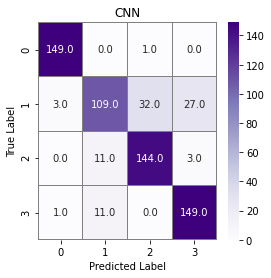

              precision    recall  f1-score   support

     Class 0       0.97      0.99      0.98       150
     Class 1       0.83      0.64      0.72       171
     Class 2       0.81      0.91      0.86       158
     Class 3       0.83      0.93      0.88       161

    accuracy                           0.86       640
   macro avg       0.86      0.87      0.86       640
weighted avg       0.86      0.86      0.86       640



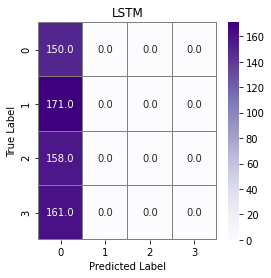

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class 0       0.23      1.00      0.38       150
     Class 1       0.00      0.00      0.00       171
     Class 2       0.00      0.00      0.00       158
     Class 3       0.00      0.00      0.00       161

    accuracy                           0.23       640
   macro avg       0.06      0.25      0.09       640
weighted avg       0.05      0.23      0.09       640



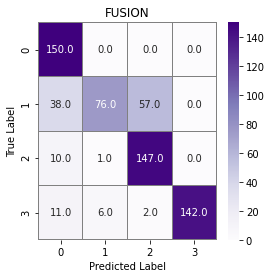

              precision    recall  f1-score   support

     Class 0       0.72      1.00      0.84       150
     Class 1       0.92      0.44      0.60       171
     Class 2       0.71      0.93      0.81       158
     Class 3       1.00      0.88      0.94       161

    accuracy                           0.80       640
   macro avg       0.84      0.81      0.79       640
weighted avg       0.84      0.80      0.79       640



In [ ]:
test_model(model_test,testImagesX,MQ8drop,testY_new)


**Drop MQ135 Column**

In [ ]:
MQ135drop = testAttrX.copy()
MQ135drop.MQ135 = 0

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              2               3                 2
1         1              1               3                 1
2         2              2               3                 2
3         0              0               3                 0
4         1              2               3                 2
5         1              1               3                 3
6         3              3               3                 3
7         2              2               3                 2
8         2              2               3                 2
9         3              3               3                 3
10        3              3               3                 3
11        0              0               3                 3
12        1              3               3                 3
13        0              0               3                 0
14        2              2               3                 2
15        2             

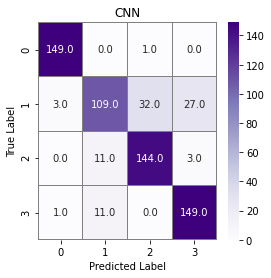

              precision    recall  f1-score   support

     Class 0       0.97      0.99      0.98       150
     Class 1       0.83      0.64      0.72       171
     Class 2       0.81      0.91      0.86       158
     Class 3       0.83      0.93      0.88       161

    accuracy                           0.86       640
   macro avg       0.86      0.87      0.86       640
weighted avg       0.86      0.86      0.86       640



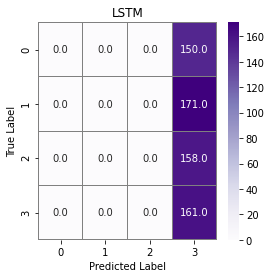

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       150
     Class 1       0.00      0.00      0.00       171
     Class 2       0.00      0.00      0.00       158
     Class 3       0.25      1.00      0.40       161

    accuracy                           0.25       640
   macro avg       0.06      0.25      0.10       640
weighted avg       0.06      0.25      0.10       640



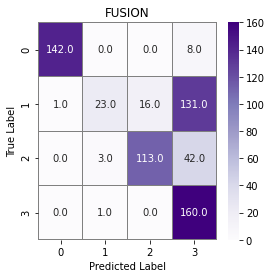

              precision    recall  f1-score   support

     Class 0       0.99      0.95      0.97       150
     Class 1       0.85      0.13      0.23       171
     Class 2       0.88      0.72      0.79       158
     Class 3       0.47      0.99      0.64       161

    accuracy                           0.68       640
   macro avg       0.80      0.70      0.66       640
weighted avg       0.79      0.68      0.64       640



In [ ]:
test_model(model_test,testImagesX,MQ135drop,testY_new)


**Noise in Normal Fusion Images - Gaussian**

In [ ]:
import skimage
from skimage import filters
import matplotlib.pyplot as plt

In [ ]:
noisyimages= []
for i in range(0,len(testImagesX)):
  #img1 = skimage.util.random_noise(testImagesX[i], mode='gaussian')
  img1 = filters.gaussian(testImagesX[i],sigma=1)
  noisyimages.append(img1)
noisyimagesgau=np.array(noisyimages)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  after removing the cwd from sys.path.


In [ ]:
noisyimagesgau.shape

(640, 32, 32, 3)

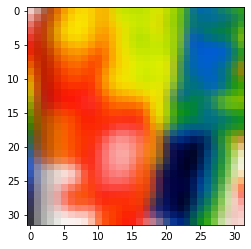

In [ ]:
import tensorflow as tf
plt.imshow(tf.squeeze(noisyimagesgau[0]))

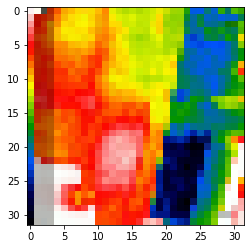

In [ ]:
import tensorflow as tf
plt.imshow(tf.squeeze(testImagesX[0]))

In [ ]:
result=model_test.predict([noisyimagesgau,testAttrX_new])
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

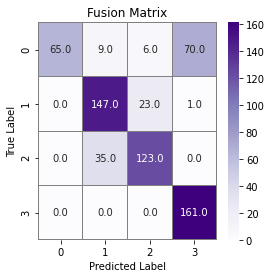

In [ ]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

In [ ]:
def f1_score(pred, act):
    target_names = ["Class {}".format(i) for i in range(4)]
    print(classification_report(act, pred, target_names=target_names))
    
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       1.00      0.43      0.60       150
     Class 1       0.77      0.86      0.81       171
     Class 2       0.81      0.78      0.79       158
     Class 3       0.69      1.00      0.82       161

    accuracy                           0.78       640
   macro avg       0.82      0.77      0.76       640
weighted avg       0.81      0.78      0.76       640



In [ ]:
score = model_test.evaluate([noisyimagesgau,testAttrX_new],testY_new, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4875505864620209
Test accuracy: 0.840624988079071


**Noise in Images - LocalVar**

In [ ]:
from keras.models import load_model
model_test = load_model('/content/drive/MyDrive/Thermal Cam Data/model_normalfusion32_15july.h5')


In [ ]:
noisyimageslocal= []
for i in range(0,len(testImagesX)):
  lvar = filters.gaussian(testImagesX[i], sigma=1) + 1e-10
  img1 = skimage.util.random_noise(testImagesX[i], mode='localvar',local_vars=lvar*4)
  noisyimageslocal.append(img1)
noisyimageslocal=np.array(noisyimageslocal)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  This is separate from the ipykernel package so we can avoid doing imports until


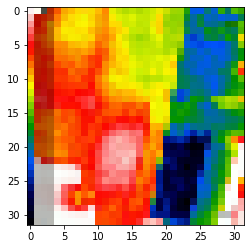

In [ ]:
import tensorflow as tf
plt.imshow(tf.squeeze(testImagesX[0]))

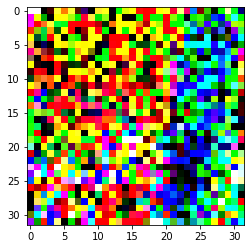

In [ ]:
import tensorflow as tf
plt.imshow(tf.squeeze(noisyimageslocal[0]))

In [ ]:
result=model_test.predict([noisyimageslocal,testAttrX_new])
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

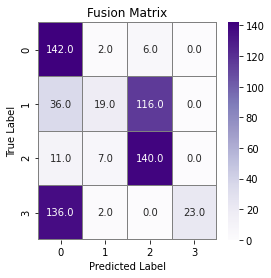

In [ ]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

In [ ]:
def f1_score(pred, act):
    target_names = ["Class {}".format(i) for i in range(4)]
    print(classification_report(act, pred, target_names=target_names))
    
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       0.44      0.95      0.60       150
     Class 1       0.63      0.11      0.19       171
     Class 2       0.53      0.89      0.67       158
     Class 3       1.00      0.14      0.25       161

    accuracy                           0.51       640
   macro avg       0.65      0.52      0.43       640
weighted avg       0.66      0.51      0.42       640



In [ ]:
score = model_test.evaluate([noisyimageslocal,testAttrX_new],testY_new, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.2071248292922974
Test accuracy: 0.5062500238418579


**Noise in Images - Poisson**

In [ ]:
noisyimagespoisson= []
for i in range(0,len(testImagesX)):
  img1 = skimage.util.random_noise(testImagesX[i], mode='poisson',seed =42, clip = False)
  noisyimagespoisson.append(img1)
noisyimagespoisson=np.array(noisyimagespoisson)

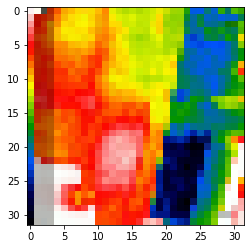

In [ ]:
import tensorflow as tf
plt.imshow(tf.squeeze(testImagesX[0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


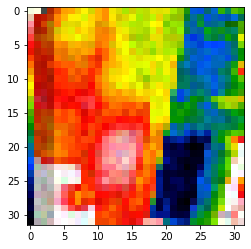

In [ ]:
import tensorflow as tf
plt.imshow(tf.squeeze(noisyimagespoisson[0]))

In [ ]:
result=model_test.predict([noisyimagespoisson,testAttrX_new])
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

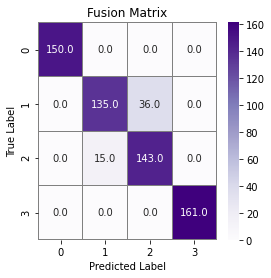

In [ ]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

In [ ]:
def f1_score(pred, act):
    target_names = ["Class {}".format(i) for i in range(4)]
    print(classification_report(act, pred, target_names=target_names))
    
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       150
     Class 1       0.90      0.79      0.84       171
     Class 2       0.80      0.91      0.85       158
     Class 3       1.00      1.00      1.00       161

    accuracy                           0.92       640
   macro avg       0.92      0.92      0.92       640
weighted avg       0.92      0.92      0.92       640



In [ ]:
score = model_test.evaluate([noisyimagespoisson,testAttrX_new],testY_new, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.31180500984191895
Test accuracy: 0.9203125238418579


**Noise in Images - Salt**

In [ ]:
noisyimagessalt= []
for i in range(0,len(testImagesX)):
  img1 = skimage.util.random_noise(testImagesX[i], mode='salt', amount = 0.8)
  noisyimagessalt.append(img1)
noisyimagessalt=np.array(noisyimagessalt)

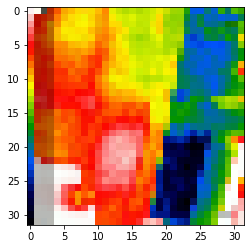

In [ ]:
import tensorflow as tf
plt.imshow(tf.squeeze(testImagesX[0]))

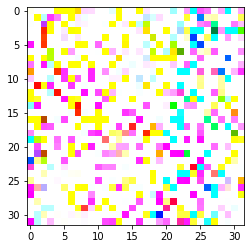

In [ ]:
import tensorflow as tf
plt.imshow(tf.squeeze(noisyimagessalt[0]))

In [ ]:
result=model_test.predict([noisyimagessalt,testAttrX_new])
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

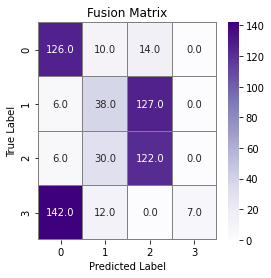

In [ ]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

In [ ]:
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       0.45      0.84      0.59       150
     Class 1       0.42      0.22      0.29       171
     Class 2       0.46      0.77      0.58       158
     Class 3       1.00      0.04      0.08       161

    accuracy                           0.46       640
   macro avg       0.58      0.47      0.39       640
weighted avg       0.58      0.46      0.38       640



In [ ]:
score = model_test.evaluate([noisyimagessalt,testAttrX_new],testY_new, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.4395639896392822
Test accuracy: 0.45781248807907104


**Noise in Images - Pepper**

In [ ]:
noisyimagespepper= []
for i in range(0,len(testImagesX)):
  img1 = skimage.util.random_noise(testImagesX[i], mode='pepper', amount=0.3)
  noisyimagespepper.append(img1)
noisyimagespepper=np.array(noisyimagespepper)

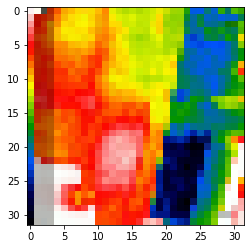

In [ ]:
import tensorflow as tf
plt.imshow(tf.squeeze(testImagesX[0]))

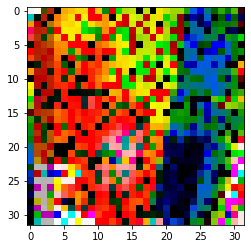

In [ ]:
import tensorflow as tf
plt.imshow(tf.squeeze(noisyimagespepper[0]))

In [ ]:
result=model_test.predict([noisyimagespepper,testAttrX_new])
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

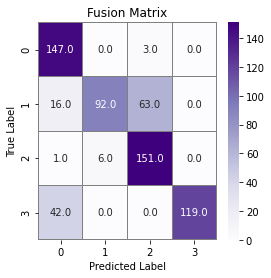

In [ ]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

In [ ]:
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       0.71      0.98      0.83       150
     Class 1       0.94      0.54      0.68       171
     Class 2       0.70      0.96      0.81       158
     Class 3       1.00      0.74      0.85       161

    accuracy                           0.80       640
   macro avg       0.84      0.80      0.79       640
weighted avg       0.84      0.80      0.79       640



In [ ]:
score = model_test.evaluate([noisyimagespepper,testAttrX_new],testY_new, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5533755421638489
Test accuracy: 0.7953125238418579


**Noise in Images - Salt and Pepper**

In [ ]:
noisyimagessp= []
for i in range(0,len(testImagesX)):
  img1 = skimage.util.random_noise(testImagesX[i], mode='s&p', amount = 0.5)
  noisyimagessp.append(img1)
noisyimagessp=np.array(noisyimagessp)

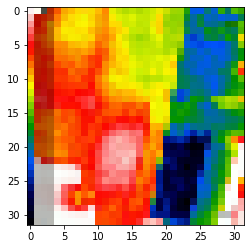

In [ ]:
import tensorflow as tf
plt.imshow(tf.squeeze(testImagesX[0]))

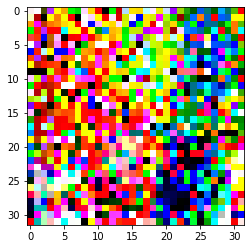

In [ ]:
import tensorflow as tf
plt.imshow(tf.squeeze(noisyimagessp[0]))

In [ ]:
result=model_test.predict([noisyimagessp,testAttrX_new])
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

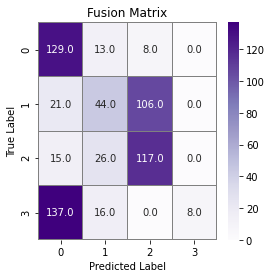

In [ ]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

In [ ]:
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       0.43      0.86      0.57       150
     Class 1       0.44      0.26      0.33       171
     Class 2       0.51      0.74      0.60       158
     Class 3       1.00      0.05      0.09       161

    accuracy                           0.47       640
   macro avg       0.59      0.48      0.40       640
weighted avg       0.60      0.47      0.39       640



In [ ]:
score = model_test.evaluate([noisyimagessp,testAttrX_new],testY_new, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.6078382730484009
Test accuracy: 0.46562498807907104


**Noise in Images - Speckle**

In [ ]:
noisyimagesspeckle= []
for i in range(0,len(testImagesX)):
  img1 = skimage.util.random_noise(testImagesX[i], mode='speckle', mean=0.1, var = 0.5)
  noisyimagesspeckle.append(img1)
noisyimagesspeckle=np.array(noisyimagesspeckle)

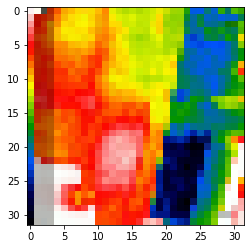

In [ ]:
import tensorflow as tf
plt.imshow(tf.squeeze(testImagesX[0]))

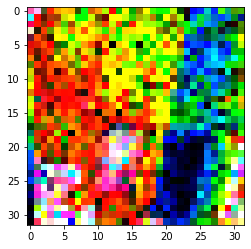

In [ ]:
import tensorflow as tf
plt.imshow(tf.squeeze(noisyimagesspeckle[0]))

In [ ]:
result=model_test.predict([noisyimagesspeckle,testAttrX_new])
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

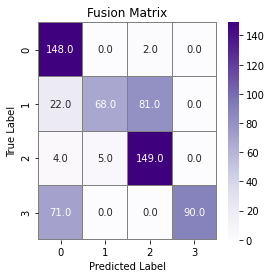

In [ ]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

In [ ]:
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       0.60      0.99      0.75       150
     Class 1       0.93      0.40      0.56       171
     Class 2       0.64      0.94      0.76       158
     Class 3       1.00      0.56      0.72       161

    accuracy                           0.71       640
   macro avg       0.79      0.72      0.70       640
weighted avg       0.80      0.71      0.69       640



In [ ]:
score = model_test.evaluate([noisyimagesspeckle,testAttrX_new],testY_new, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.682020366191864
Test accuracy: 0.7109375


**Sensor Noise** (Normal Fusion) - **White text Noise**

In [ ]:
# add noise sampled from zero-mean Gaussian with standard deviation p at every time step
def white_noise(data, p):
    for i in range(len(data)):
        #for time in range(len(data[i])):
            r = np.random.normal(0,p)
            data[i] = r + data[i]
    return data

In [ ]:
testAttrX.describe()

MQ2         MQ3         MQ5  ...         MQ7         MQ8       MQ135
count  640.000000  640.000000  640.000000  ...  640.000000  640.000000  640.000000
mean   680.090625  463.948438  407.510938  ...  570.560938  549.076563  417.628125
std     92.532655   69.910308   54.788852  ...   82.558858  149.779772   75.412019
min    502.000000  339.000000  292.000000  ...  364.000000  230.000000  277.000000
25%    597.750000  407.000000  369.000000  ...  533.000000  471.250000  356.750000
50%    708.000000  517.000000  404.000000  ...  581.000000  582.500000  437.000000
75%    757.000000  529.000000  444.000000  ...  636.000000  649.000000  472.000000
max    824.000000  538.000000  596.000000  ...  703.000000  779.000000  581.000000

[8 rows x 7 columns]

In [ ]:
white = white_noise(testAttrX_new,1000)

In [ ]:
white

array([[[792],
        [564],
        [478],
        ...,
        [696],
        [741],
        [510]],

       [[730],
        [452],
        [437],
        ...,
        [582],
        [704],
        [502]],

       [[666],
        [402],
        [374],
        ...,
        [559],
        [616],
        [376]],

       ...,

       [[702],
        [507],
        [371],
        ...,
        [575],
        [550],
        [420]],

       [[593],
        [329],
        [300],
        ...,
        [478],
        [530],
        [301]],

       [[634],
        [359],
        [298],
        ...,
        [562],
        [575],
        [300]]])

In [ ]:
result=model_test.predict([testImagesX,white])
pred_fusion = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusion})

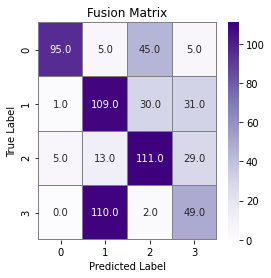

In [ ]:
cm = confusion_matrix(testY_new,pred_fusion)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion Matrix")
plt.show()

In [ ]:
f1_score(pred_fusion,testY_new)

              precision    recall  f1-score   support

     Class 0       0.94      0.63      0.76       150
     Class 1       0.46      0.64      0.53       171
     Class 2       0.59      0.70      0.64       158
     Class 3       0.43      0.30      0.36       161

    accuracy                           0.57       640
   macro avg       0.61      0.57      0.57       640
weighted avg       0.60      0.57      0.57       640



In [ ]:
score = model_test.evaluate([testImagesX,white],testY_new, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.3692386150360107
Test accuracy: 0.5687500238418579


**Structured Drop**

In [ ]:
# independently for each modality, each time step is chosen with probability p 
# at which all feature dimensions are dropped
def structured_drop(data, p):
    for i in range(len(data)):
        #for time in range(len(data[i])):
            t = np.random.random_sample()
            print(t)
            print(p)
            print(data[i].shape)
            if t < p:
              data[i] = np.zeros(data[i].shape)
    return data
                

In [ ]:
structureddrop = structured_drop(testAttrX_new,0.75)

0.7654739337425387
0.75
(7, 1)
0.11057263444949128
0.75
(7, 1)
0.8669926703407408
0.75
(7, 1)
0.23769288850820747
0.75
(7, 1)
0.4460780475126638
0.75
(7, 1)
0.9725196283033054
0.75
(7, 1)
0.21563262150754436
0.75
(7, 1)
0.4393217259665747
0.75
(7, 1)
0.07502372863401452
0.75
(7, 1)
0.8830870221682037
0.75
(7, 1)
0.8104996196492047
0.75
(7, 1)
0.13917792692400077
0.75
(7, 1)
0.7174256966148497
0.75
(7, 1)
0.7012729127898998
0.75
(7, 1)
0.9370230783415513
0.75
(7, 1)
0.6632635301081329
0.75
(7, 1)
0.09611705545862392
0.75
(7, 1)
0.49817563791664854
0.75
(7, 1)
0.014326321504461337
0.75
(7, 1)
0.054329202057165404
0.75
(7, 1)
0.3462695790643311
0.75
(7, 1)
0.9114679508560105
0.75
(7, 1)
0.15478032996872249
0.75
(7, 1)
0.9309048489069093
0.75
(7, 1)
0.045956480987845216
0.75
(7, 1)
0.7152534268070558
0.75
(7, 1)
0.20232578769223686
0.75
(7, 1)
0.7538746872839498
0.75
(7, 1)
0.36652762293688457
0.75
(7, 1)
0.5556000575779009
0.75
(7, 1)
0.5305908205287947
0.75
(7, 1)
0.8790981741384623
0.75

In [ ]:

structureddrop

array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]])

In [ ]:
np.where(np.all(structureddrop == 0, axis=1))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 118, 119,
        120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
        133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
        146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
        159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
        172, 173, 174, 175, 176, 177, 178, 179, 180

In [ ]:
resultstructured =model_test.predict([testImagesX,structureddrop])
pred_fusionstructured = np.argmax(resultstructured, axis=-1)
comparestructured=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_fusionstructured})

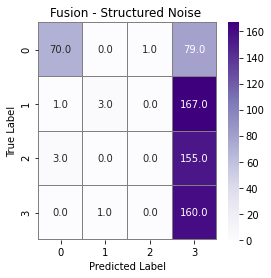

In [ ]:
cm = confusion_matrix(testY_new,pred_fusionstructured)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fusion - Structured Noise ")
plt.show()

In [ ]:
f1_score(pred_fusionstructured,testY_new)

              precision    recall  f1-score   support

     Class 0       0.95      0.47      0.62       150
     Class 1       0.75      0.02      0.03       171
     Class 2       0.00      0.00      0.00       158
     Class 3       0.29      0.99      0.44       161

    accuracy                           0.36       640
   macro avg       0.50      0.37      0.28       640
weighted avg       0.49      0.36      0.27       640



In [ ]:
model_test.evaluate([testImagesX,structureddrop],testY_new)

20/20 [==============================] - 0s 15ms/step - loss: 4.3840 - accuracy: 0.3641


[4.383996963500977, 0.36406248807907104]

**Multi Sensor 32x32 Image Noise**

In [ ]:
from keras.models import load_model
model_test= load_model('/content/drive/MyDrive/Thermal Cam Data/model_fusion32multi_17July.h5')

**Gaussian** 

In [ ]:
noisyimages= []
for i in range(0,len(testImagesX)):
  #img1 = skimage.util.random_noise(testImagesX[i], mode='gaussian')
  img1 = filters.gaussian(testImagesX[i],sigma=1)
  noisyimages.append(img1)
noisyimagesgau=np.array(noisyimages)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  after removing the cwd from sys.path.


     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              2               0                 3
1         1              3               0                 3
2         2              2               3                 2
3         0              3               0                 3
4         1              2               0                 3
5         1              3               0                 3
6         3              3               0                 3
7         2              2               0                 3
8         2              2               0                 2
9         3              3               0                 3
10        3              3               0                 3
11        0              3               0                 3
12        1              3               3                 3
13        0              3               3                 3
14        2              2               0                 3
15        2             

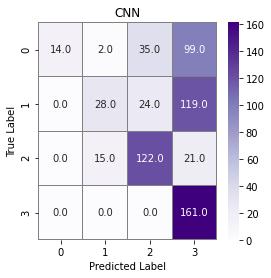

              precision    recall  f1-score   support

     Class 0       1.00      0.09      0.17       150
     Class 1       0.62      0.16      0.26       171
     Class 2       0.67      0.77      0.72       158
     Class 3       0.40      1.00      0.57       161

    accuracy                           0.51       640
   macro avg       0.67      0.51      0.43       640
weighted avg       0.67      0.51      0.43       640



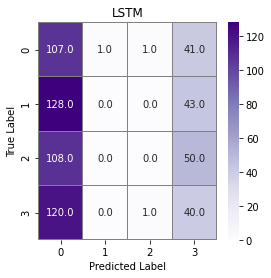

              precision    recall  f1-score   support

     Class 0       0.23      0.71      0.35       150
     Class 1       0.00      0.00      0.00       171
     Class 2       0.00      0.00      0.00       158
     Class 3       0.23      0.25      0.24       161

    accuracy                           0.23       640
   macro avg       0.12      0.24      0.15       640
weighted avg       0.11      0.23      0.14       640



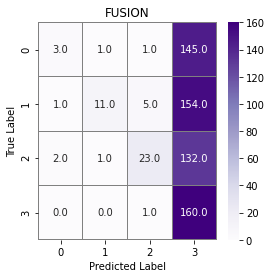

              precision    recall  f1-score   support

     Class 0       0.50      0.02      0.04       150
     Class 1       0.85      0.06      0.12       171
     Class 2       0.77      0.15      0.24       158
     Class 3       0.27      0.99      0.43       161

    accuracy                           0.31       640
   macro avg       0.60      0.31      0.21       640
weighted avg       0.60      0.31      0.21       640



In [ ]:
test_model(model_test,noisyimagesgau,testAttrX_new,testY_new)

**LocalVar**

In [ ]:
noisyimageslocal= []
for i in range(0,len(testImagesX)):
  lvar = filters.gaussian(testImagesX[i], sigma=1) + 1e-10
  img1 = skimage.util.random_noise(testImagesX[i], mode='localvar',local_vars=lvar*2)
  noisyimageslocal.append(img1)
noisyimageslocal=np.array(noisyimageslocal)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  This is separate from the ipykernel package so we can avoid doing imports until


     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              0               1                 1
1         1              0               2                 2
2         2              2               1                 2
3         0              0               0                 0
4         1              0               1                 0
5         1              0               1                 2
6         3              0               3                 0
7         2              0               1                 2
8         2              2               2                 2
9         3              0               3                 0
10        3              2               3                 0
11        0              0               0                 0
12        1              0               1                 0
13        0              0               0                 0
14        2              2               1                 2
15        2             

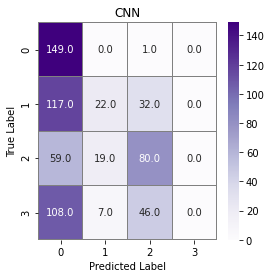

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class 0       0.34      0.99      0.51       150
     Class 1       0.46      0.13      0.20       171
     Class 2       0.50      0.51      0.50       158
     Class 3       0.00      0.00      0.00       161

    accuracy                           0.39       640
   macro avg       0.33      0.41      0.30       640
weighted avg       0.33      0.39      0.30       640



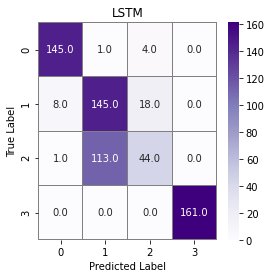

              precision    recall  f1-score   support

     Class 0       0.94      0.97      0.95       150
     Class 1       0.56      0.85      0.67       171
     Class 2       0.67      0.28      0.39       158
     Class 3       1.00      1.00      1.00       161

    accuracy                           0.77       640
   macro avg       0.79      0.77      0.76       640
weighted avg       0.79      0.77      0.75       640



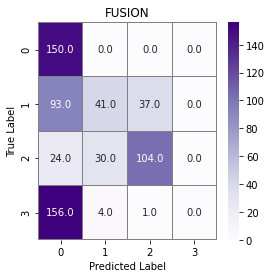

              precision    recall  f1-score   support

     Class 0       0.35      1.00      0.52       150
     Class 1       0.55      0.24      0.33       171
     Class 2       0.73      0.66      0.69       158
     Class 3       0.00      0.00      0.00       161

    accuracy                           0.46       640
   macro avg       0.41      0.47      0.39       640
weighted avg       0.41      0.46      0.38       640



In [ ]:
test_model(model_test,noisyimageslocal,testAttrX_new,testY_new)

**Poisson**

In [ ]:
noisyimagespoisson= []
for i in range(0,len(testImagesX)):
  img1 = skimage.util.random_noise(testImagesX[i], mode='poisson',seed =42, clip =True)
  noisyimagespoisson.append(img1)
noisyimagespoisson=np.array(noisyimagespoisson)

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              2               1                 2
1         1              1               2                 1
2         2              2               1                 2
3         0              0               0                 0
4         1              2               1                 2
5         1              2               1                 2
6         3              3               3                 3
7         2              2               1                 2
8         2              2               2                 2
9         3              3               3                 3
10        3              3               3                 3
11        0              0               0                 0
12        1              1               1                 1
13        0              0               0                 0
14        2              2               1                 2
15        2             

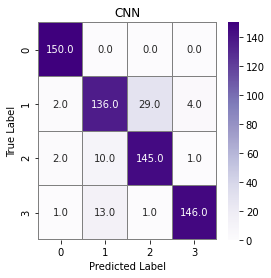

              precision    recall  f1-score   support

     Class 0       0.97      1.00      0.98       150
     Class 1       0.86      0.80      0.82       171
     Class 2       0.83      0.92      0.87       158
     Class 3       0.97      0.91      0.94       161

    accuracy                           0.90       640
   macro avg       0.90      0.90      0.90       640
weighted avg       0.90      0.90      0.90       640



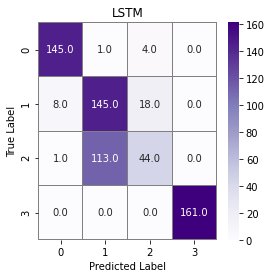

              precision    recall  f1-score   support

     Class 0       0.94      0.97      0.95       150
     Class 1       0.56      0.85      0.67       171
     Class 2       0.67      0.28      0.39       158
     Class 3       1.00      1.00      1.00       161

    accuracy                           0.77       640
   macro avg       0.79      0.77      0.76       640
weighted avg       0.79      0.77      0.75       640



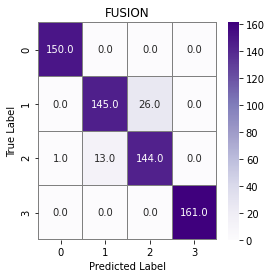

              precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00       150
     Class 1       0.92      0.85      0.88       171
     Class 2       0.85      0.91      0.88       158
     Class 3       1.00      1.00      1.00       161

    accuracy                           0.94       640
   macro avg       0.94      0.94      0.94       640
weighted avg       0.94      0.94      0.94       640



In [ ]:
test_model(model_test,noisyimagespoisson,testAttrX_new,testY_new)

**Salt**

In [ ]:
noisyimagessalt= []
for i in range(0,len(testImagesX)):
  img1 = skimage.util.random_noise(testImagesX[i], mode='salt', amount = 0.1)
  noisyimagessalt.append(img1)
noisyimagessalt=np.array(noisyimagessalt)

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              2               1                 2
1         1              0               2                 2
2         2              2               1                 2
3         0              0               0                 0
4         1              2               1                 2
5         1              2               1                 2
6         3              0               3                 0
7         2              0               1                 2
8         2              2               2                 2
9         3              0               3                 0
10        3              0               3                 0
11        0              0               0                 0
12        1              0               1                 1
13        0              0               0                 0
14        2              2               1                 2
15        2             

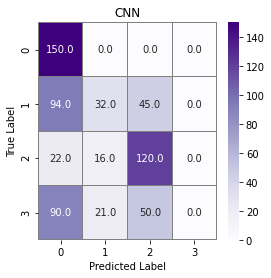

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class 0       0.42      1.00      0.59       150
     Class 1       0.46      0.19      0.27       171
     Class 2       0.56      0.76      0.64       158
     Class 3       0.00      0.00      0.00       161

    accuracy                           0.47       640
   macro avg       0.36      0.49      0.38       640
weighted avg       0.36      0.47      0.37       640



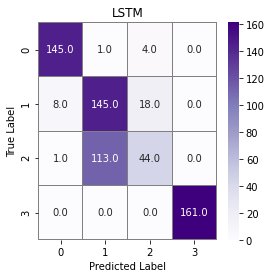

              precision    recall  f1-score   support

     Class 0       0.94      0.97      0.95       150
     Class 1       0.56      0.85      0.67       171
     Class 2       0.67      0.28      0.39       158
     Class 3       1.00      1.00      1.00       161

    accuracy                           0.77       640
   macro avg       0.79      0.77      0.76       640
weighted avg       0.79      0.77      0.75       640



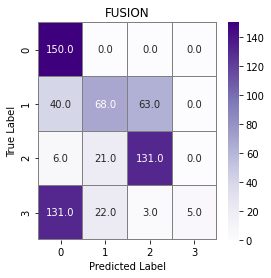

              precision    recall  f1-score   support

     Class 0       0.46      1.00      0.63       150
     Class 1       0.61      0.40      0.48       171
     Class 2       0.66      0.83      0.74       158
     Class 3       1.00      0.03      0.06       161

    accuracy                           0.55       640
   macro avg       0.68      0.56      0.48       640
weighted avg       0.69      0.55      0.47       640



In [ ]:
test_model(model_test,noisyimagessalt,testAttrX_new,testY_new)

**Pepper**

In [ ]:
noisyimagespepper= []
for i in range(0,len(testImagesX)):
  img1 = skimage.util.random_noise(testImagesX[i], mode='pepper', amount=0.3)
  noisyimagespepper.append(img1)
noisyimagespepper=np.array(noisyimagespepper)

In [ ]:
test_model(model_test,noisyimagespepper,testAttrX_new,testY_new)

**Salt and Pepper**

In [ ]:
noisyimagessp= []
for i in range(0,len(testImagesX)):
  img1 = skimage.util.random_noise(testImagesX[i], mode='s&p', amount = 0.5)
  noisyimagessp.append(img1)
noisyimagessp=np.array(noisyimagessp)

In [ ]:
test_model(model_test,noisyimagessp,testAttrX_new,testY_new)

**Speckle**

In [ ]:
noisyimagesspeckle= []
for i in range(0,len(testImagesX)):
  img1 = skimage.util.random_noise(testImagesX[i], mode='speckle', mean=0.1, var = 0.5)
  noisyimagesspeckle.append(img1)
noisyimagesspeckle=np.array(noisyimagesspeckle)

In [ ]:
test_model(model_test,noisyimagesspeckle,testAttrX_new,testY_new)

**Sensor Noise** (Multi Fusion) - **White text Noise**

In [ ]:
# add noise sampled from zero-mean Gaussian with standard deviation p at every time step
def white_noise(data, p):
    for i in range(len(data)):
        #for time in range(len(data[i])):
            r = np.random.normal(0,p)
            data[i] = r + data[i]
    return data

In [ ]:
white = white_noise(testAttrX_new,45)

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              2               2                 2
1         1              1               1                 1
2         2              2               2                 2
3         0              0               0                 0
4         1              2               2                 2
5         1              1               3                 1
6         3              3               3                 3
7         2              2               2                 2
8         2              2               2                 2
9         3              3               3                 3
10        3              3               3                 3
11        0              0               0                 0
12        1              3               3                 3
13        0              0               0                 0
14        2              2               2                 2
15        2             

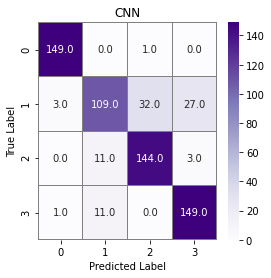

              precision    recall  f1-score   support

     Class 0       0.97      0.99      0.98       150
     Class 1       0.83      0.64      0.72       171
     Class 2       0.81      0.91      0.86       158
     Class 3       0.83      0.93      0.88       161

    accuracy                           0.86       640
   macro avg       0.86      0.87      0.86       640
weighted avg       0.86      0.86      0.86       640



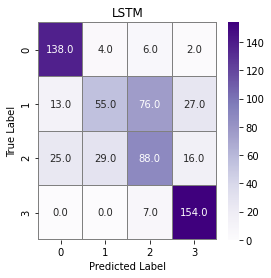

              precision    recall  f1-score   support

     Class 0       0.78      0.92      0.85       150
     Class 1       0.62      0.32      0.42       171
     Class 2       0.50      0.56      0.53       158
     Class 3       0.77      0.96      0.86       161

    accuracy                           0.68       640
   macro avg       0.67      0.69      0.66       640
weighted avg       0.67      0.68      0.66       640



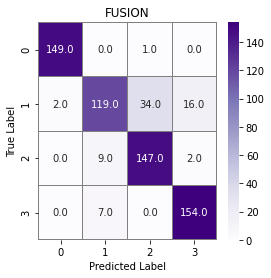

              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99       150
     Class 1       0.88      0.70      0.78       171
     Class 2       0.81      0.93      0.86       158
     Class 3       0.90      0.96      0.92       161

    accuracy                           0.89       640
   macro avg       0.89      0.89      0.89       640
weighted avg       0.89      0.89      0.89       640



In [ ]:
test_model(model_test,testImagesX,white,testY_new)

In [ ]:
# independently for each modality, each time step is chosen with probability p 
# at which all feature dimensions are dropped
def structured_drop(data, p):
    for i in range(len(data)):
        #for time in range(len(data[i])):
            t = np.random.random_sample()
            print(t)
            print(p)
            print(data[i].shape)
            if t < p:
              data[i] = np.zeros(data[i].shape)
    return data

In [ ]:
structureddrop = structured_drop(testAttrX_new,0.45)

0.40254400819663316
0.45
(7, 1)
0.8976098696600489
0.45
(7, 1)
0.7692948370144101
0.45
(7, 1)
0.46688596630657897
0.45
(7, 1)
0.2717371974399797
0.45
(7, 1)
0.16190318276150195
0.45
(7, 1)
0.4033599396733937
0.45
(7, 1)
0.7118033879476742
0.45
(7, 1)
0.639864412303696
0.45
(7, 1)
0.826620000811617
0.45
(7, 1)
0.32286363261622175
0.45
(7, 1)
0.9113322240497389
0.45
(7, 1)
0.8516042806929344
0.45
(7, 1)
0.8363224791806444
0.45
(7, 1)
0.858894658306968
0.45
(7, 1)
0.7993341835809459
0.45
(7, 1)
0.4836869217121019
0.45
(7, 1)
0.9975453930553799
0.45
(7, 1)
0.6211866008295237
0.45
(7, 1)
0.5118332027901858
0.45
(7, 1)
0.19273968794609264
0.45
(7, 1)
0.22662210075904843
0.45
(7, 1)
0.36088127843112583
0.45
(7, 1)
0.7238125341599345
0.45
(7, 1)
0.43417850764051447
0.45
(7, 1)
0.6798152530168745
0.45
(7, 1)
0.5568037580240481
0.45
(7, 1)
0.0414712450528123
0.45
(7, 1)
0.24873722922757113
0.45
(7, 1)
0.12085163903587326
0.45
(7, 1)
0.3738995745975483
0.45
(7, 1)
0.9462613716511963
0.45
(7, 1)
0

     Actual  Predicted_CNN  Predicted_lstm  Predicted_fusion
0         1              2               3                 2
1         1              1               1                 1
2         2              2               2                 2
3         0              0               0                 0
4         1              2               3                 2
5         1              1               3                 3
6         3              3               3                 3
7         2              2               2                 2
8         2              2               2                 2
9         3              3               3                 3
10        3              3               3                 3
11        0              0               0                 0
12        1              3               3                 3
13        0              0               0                 0
14        2              2               2                 2
15        2             

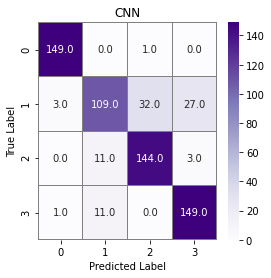

              precision    recall  f1-score   support

     Class 0       0.97      0.99      0.98       150
     Class 1       0.83      0.64      0.72       171
     Class 2       0.81      0.91      0.86       158
     Class 3       0.83      0.93      0.88       161

    accuracy                           0.86       640
   macro avg       0.86      0.87      0.86       640
weighted avg       0.86      0.86      0.86       640



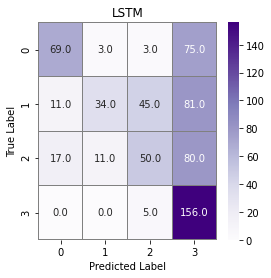

              precision    recall  f1-score   support

     Class 0       0.71      0.46      0.56       150
     Class 1       0.71      0.20      0.31       171
     Class 2       0.49      0.32      0.38       158
     Class 3       0.40      0.97      0.56       161

    accuracy                           0.48       640
   macro avg       0.58      0.49      0.45       640
weighted avg       0.58      0.48      0.45       640



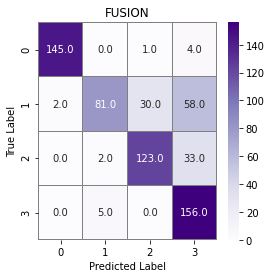

              precision    recall  f1-score   support

     Class 0       0.99      0.97      0.98       150
     Class 1       0.92      0.47      0.63       171
     Class 2       0.80      0.78      0.79       158
     Class 3       0.62      0.97      0.76       161

    accuracy                           0.79       640
   macro avg       0.83      0.80      0.79       640
weighted avg       0.83      0.79      0.78       640



In [ ]:
test_model(model_test,testImagesX,structureddrop,testY_new)

**CNN Individual 32x32**

In [ ]:
cnn_input = Input(shape = (32, 32, 3))
y = Conv2D(64, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l1_l2(l1 = 0.005, l2 =0.005))(cnn_input)
y = MaxPooling2D((2, 2), padding = 'same')(y)
#y = Dropout(0.25)(y)
y= Conv2D(32, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l1_l2(l1 = 0.005, l2 =0.005))(y)
y = MaxPooling2D((2, 2), padding = 'same')(y)
#y = Dropout(0.25)(y)
y= Conv2D(16, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l2(0.005))(y)
y = MaxPooling2D((2, 2), padding = 'same')(y)
y = Dropout(0.25)(y)
cnn_flatten= Flatten()(y)

output_cnn=Dense(4, activation='softmax',name='CNN_output')(cnn_flatten)

model_cnn = Model(inputs=[cnn_input], outputs=[output_cnn])

model_cnn.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 5, 5, 16)          4624      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 16)          0   

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(images,labels,test_size=0.20,random_state=42)
X_val,X_te,y_val,y_te=train_test_split(X_val,y_val,test_size=0.50,random_state=42)
print(X_train.shape)
print(X_te.shape)
print(X_val.shape)
print(y_train.shape)
print(y_te.shape)
print(y_val.shape)

(5120, 32, 32, 3)
(640, 32, 32, 3)
(640, 32, 32, 3)
(5120,)
(640,)
(640,)


In [ ]:
y_te[2]

1.0

In [ ]:
opt = Adam(lr=0.006, decay=1e-3)
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history=model_cnn.fit(X_train,y_train,batch_size=20,epochs = 100,verbose = 1,validation_data = (X_val,y_val))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
256/256 [==============================] - 10s 35ms/step - loss: 1.9661 - accuracy: 0.4220 - val_loss: 1.1539 - val_accuracy: 0.5469
Epoch 2/100
256/256 [==============================] - 9s 34ms/step - loss: 1.1612 - accuracy: 0.5504 - val_loss: 1.0754 - val_accuracy: 0.5797
Epoch 3/100
256/256 [==============================] - 9s 34ms/step - loss: 1.0679 - accuracy: 0.6032 - val_loss: 1.0073 - val_accuracy: 0.6016
Epoch 4/100
256/256 [==============================] - 9s 34ms/step - loss: 1.0246 - accuracy: 0.6095 - val_loss: 0.9741 - val_accuracy: 0.6219
Epoch 5/100
256/256 [==============================] - 9s 35ms/step - loss: 0.9953 - accuracy: 0.6211 - val_loss: 0.9245 - val_accuracy: 0.6484
Epoch 6/100
256/256 [==============================] - 9s 35ms/step - loss: 0.9487 - accuracy: 0.6525 - val_loss: 0.8653 - val_accuracy: 0.7156
Epoch 7/100
256/256 [==============================] - 9s 34ms/step - loss: 0.8928 - accuracy: 0.6789 - val_loss: 0.8456 - val_accuracy

In [ ]:
score = model_cnn.evaluate(X_te, y_te, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5502673983573914
Test accuracy: 0.8218749761581421


In [ ]:
model_cnn.save('model_cnn4classes32x32_8010.h5')

In [ ]:
model_cnn.save_weights('model_cnn4classes32x32_8010_weights.h5')

In [ ]:
model_cnn01 = tf.keras.models.load_model('model_cnn4classes32x32_8010.h5')
result=model_cnn01.predict([X_te])

In [ ]:
pred_cnn = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':y_te,'Predicted_CNN':pred_cnn})

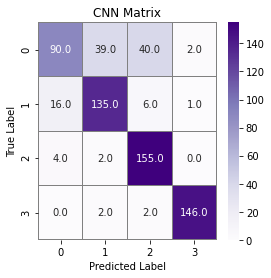

In [ ]:
cm = confusion_matrix(y_te,pred_cnn)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("CNN Matrix")
plt.show()

In [ ]:
def f1_score(pred, act):
    target_names = ["Class {}".format(i) for i in range(4)]
    print(classification_report(act, pred, target_names=target_names))

In [ ]:
f1_score(pred_cnn,y_te)

              precision    recall  f1-score   support

     Class 0       0.82      0.53      0.64       171
     Class 1       0.76      0.85      0.80       158
     Class 2       0.76      0.96      0.85       161
     Class 3       0.98      0.97      0.98       150

    accuracy                           0.82       640
   macro avg       0.83      0.83      0.82       640
weighted avg       0.83      0.82      0.81       640



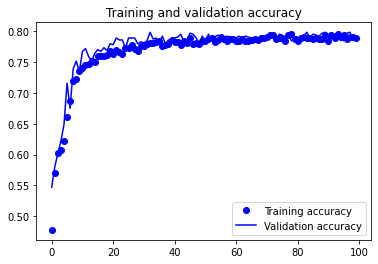

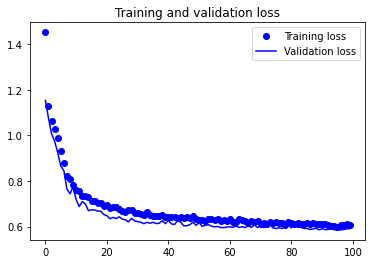

In [ ]:
#Loss and Accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

** Individual CNN 32x32 with different Noisy Test Images**

**Gaussian Noise**

In [ ]:
import skimage
import matplotlib.pyplot as plt

In [ ]:
noisyimages= []
for i in range(0,len(X_te)):
  img1 = skimage.util.random_noise(X_te[i], mode='gaussian')
  noisyimages.append(img1)
noisyimagesgau=np.array(noisyimages)

In [ ]:
result=model_cnn01.predict([noisyimagesgau])
pred_cnn = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':y_te,'Predicted_CNN':pred_cnn})

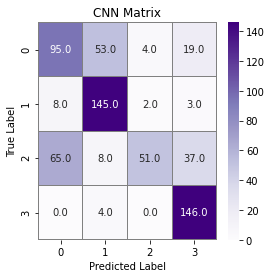

In [ ]:
cm = confusion_matrix(y_te,pred_cnn)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("CNN Matrix")
plt.show()

In [ ]:
f1_score(pred_cnn,y_te)

              precision    recall  f1-score   support

     Class 0       0.57      0.56      0.56       171
     Class 1       0.69      0.92      0.79       158
     Class 2       0.89      0.32      0.47       161
     Class 3       0.71      0.97      0.82       150

    accuracy                           0.68       640
   macro avg       0.72      0.69      0.66       640
weighted avg       0.71      0.68      0.65       640



In [ ]:
score = model_cnn01.evaluate(noisyimagesgau,y_te, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.840886116027832
Test accuracy: 0.682812511920929


**Noise in CNN Images - LocalVar**

In [ ]:
noisyimageslocal= []
for i in range(0,len(X_te)):
  img1 = skimage.util.random_noise(X_te[i], mode='localvar')
  noisyimageslocal.append(img1)
noisyimageslocal=np.array(noisyimageslocal)

In [ ]:
result=model_cnn01.predict([noisyimageslocal])
pred_cnn = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':y_te,'Predicted_CNN':pred_cnn})

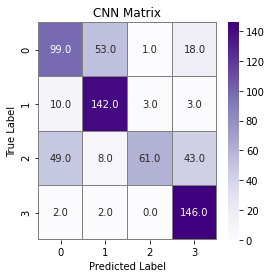

In [ ]:
cm = confusion_matrix(y_te,pred_cnn)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("CNN Matrix")
plt.show()

In [ ]:
f1_score(pred_cnn,y_te)

              precision    recall  f1-score   support

     Class 0       0.62      0.58      0.60       171
     Class 1       0.69      0.90      0.78       158
     Class 2       0.94      0.38      0.54       161
     Class 3       0.70      0.97      0.81       150

    accuracy                           0.70       640
   macro avg       0.74      0.71      0.68       640
weighted avg       0.74      0.70      0.68       640



In [ ]:
score = model_cnn01.evaluate(noisyimageslocal,y_te, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8458534479141235
Test accuracy: 0.699999988079071


**Poisson Noise**

In [ ]:
noisyimagespoisson= []
for i in range(0,len(X_te)):
  img1 = skimage.util.random_noise(X_te[i], mode='poisson')
  noisyimagespoisson.append(img1)
noisyimagespoisson=np.array(noisyimagespoisson)

In [ ]:
result=model_cnn01.predict([noisyimagespoisson])
pred_cnn = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':y_te,'Predicted_CNN':pred_cnn})

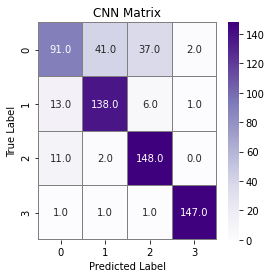

In [ ]:
cm = confusion_matrix(y_te,pred_cnn)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("CNN Matrix")
plt.show()

In [ ]:
f1_score(pred_cnn,y_te)

              precision    recall  f1-score   support

     Class 0       0.78      0.53      0.63       171
     Class 1       0.76      0.87      0.81       158
     Class 2       0.77      0.92      0.84       161
     Class 3       0.98      0.98      0.98       150

    accuracy                           0.82       640
   macro avg       0.82      0.83      0.82       640
weighted avg       0.82      0.82      0.81       640



In [ ]:
score = model_cnn01.evaluate(noisyimagespoisson,y_te, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5593676567077637
Test accuracy: 0.8187500238418579


**Salt Noise**

In [ ]:
noisyimagessalt= []
for i in range(0,len(X_te)):
  img1 = skimage.util.random_noise(X_te[i], mode='salt')
  noisyimagessalt.append(img1)
noisyimagessalt=np.array(noisyimagessalt)

In [ ]:
result=model_cnn01.predict([noisyimagessalt])
pred_cnn = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':y_te,'Predicted_CNN':pred_cnn})

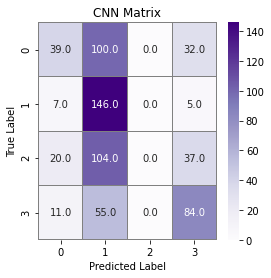

In [ ]:
cm = confusion_matrix(y_te,pred_cnn)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("CNN Matrix")
plt.show()

In [ ]:
f1_score(pred_cnn,y_te)

              precision    recall  f1-score   support

     Class 0       0.51      0.23      0.31       171
     Class 1       0.36      0.92      0.52       158
     Class 2       0.00      0.00      0.00       161
     Class 3       0.53      0.56      0.55       150

    accuracy                           0.42       640
   macro avg       0.35      0.43      0.34       640
weighted avg       0.35      0.42      0.34       640



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
score = model_cnn01.evaluate(noisyimagessalt,y_te, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.8153553009033203
Test accuracy: 0.4203124940395355


**Pepper Noise**

In [ ]:
noisyimagespepper= []
for i in range(0,len(X_te)):
  img1 = skimage.util.random_noise(X_te[i], mode='pepper')
  noisyimagespepper.append(img1)
noisyimagespepper=np.array(noisyimagespepper)

In [ ]:
result=model_cnn01.predict([noisyimagespepper])
pred_cnn = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':y_te,'Predicted_CNN':pred_cnn})

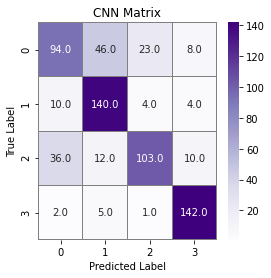

In [ ]:
cm = confusion_matrix(y_te,pred_cnn)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("CNN Matrix")
plt.show()

In [ ]:
f1_score(pred_cnn,y_te)

              precision    recall  f1-score   support

     Class 0       0.66      0.55      0.60       171
     Class 1       0.69      0.89      0.78       158
     Class 2       0.79      0.64      0.71       161
     Class 3       0.87      0.95      0.90       150

    accuracy                           0.75       640
   macro avg       0.75      0.76      0.75       640
weighted avg       0.75      0.75      0.74       640



In [ ]:
score = model_cnn01.evaluate(noisyimagespepper,y_te, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7646118402481079
Test accuracy: 0.7484375238418579


**Salt and Pepper**

In [ ]:
noisyimagessp= []
for i in range(0,len(X_te)):
  img1 = skimage.util.random_noise(X_te[i], mode='s&p')
  noisyimagessp.append(img1)
noisyimagessp=np.array(noisyimagessp)

In [ ]:
result=model_cnn01.predict([noisyimagessp])
pred_cnn = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':y_te,'Predicted_CNN':pred_cnn})

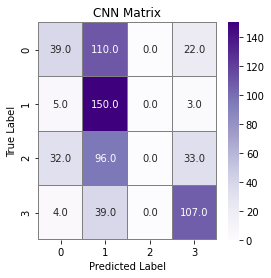

In [ ]:
cm = confusion_matrix(y_te,pred_cnn)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("CNN Matrix")
plt.show()

In [ ]:
f1_score(pred_cnn,y_te)

              precision    recall  f1-score   support

     Class 0       0.49      0.23      0.31       171
     Class 1       0.38      0.95      0.54       158
     Class 2       0.00      0.00      0.00       161
     Class 3       0.65      0.71      0.68       150

    accuracy                           0.46       640
   macro avg       0.38      0.47      0.38       640
weighted avg       0.38      0.46      0.38       640



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
score = model_cnn01.evaluate(noisyimagessp,y_te, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.2442893981933594
Test accuracy: 0.4625000059604645


**Speckle Noise**

In [ ]:
noisyimagesspeckle= []
for i in range(0,len(X_te)):
  img1 = skimage.util.random_noise(X_te[i], mode='speckle')
  noisyimagesspeckle.append(img1)
noisyimagesspeckle=np.array(noisyimagesspeckle)

In [ ]:
result=model_cnn01.predict([noisyimagesspeckle])
pred_cnn = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':y_te,'Predicted_CNN':pred_cnn})

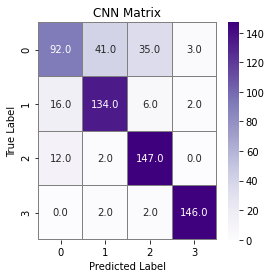

In [ ]:
cm = confusion_matrix(y_te,pred_cnn)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("CNN Matrix")
plt.show()

In [ ]:
f1_score(pred_cnn,y_te)

              precision    recall  f1-score   support

     Class 0       0.77      0.54      0.63       171
     Class 1       0.75      0.85      0.80       158
     Class 2       0.77      0.91      0.84       161
     Class 3       0.97      0.97      0.97       150

    accuracy                           0.81       640
   macro avg       0.81      0.82      0.81       640
weighted avg       0.81      0.81      0.80       640



In [ ]:
score = model_cnn01.evaluate(noisyimagessp,y_te, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.2442893981933594
Test accuracy: 0.4625000059604645


**Individual LSTM 32x32**

In [ ]:
lstm_input = Input(shape=(7,1))
lstm_output =(LSTM(5,return_sequences=False,input_shape = (7,1),kernel_regularizer=regularizers.l2( 0.001)))(lstm_input)

output_lstm=Dense(4, activation='softmax',name='LSTM_output')(lstm_output)

model_lstm = Model(inputs=[lstm_input], outputs=[output_lstm])

model_lstm.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 7, 1)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 5)                 140       
_________________________________________________________________
LSTM_output (Dense)          (None, 4)                 24        
Total params: 164
Trainable params: 164
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_lstm01 = load_model('/content/model_lstm_6Jul.h5')
result=model_lstm01.predict([testAttrX_new])

In [ ]:
pred_lstm = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_LSTM':pred_lstm})

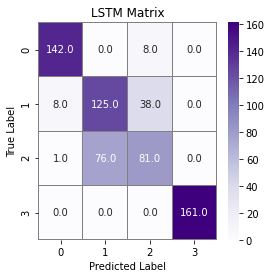

In [ ]:
cm = confusion_matrix(testY_new,pred_lstm)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("LSTM Matrix")
plt.show()

In [ ]:
f1_score(pred_lstm,testY_new)

              precision    recall  f1-score   support

     Class 0       0.94      0.95      0.94       150
     Class 1       0.62      0.73      0.67       171
     Class 2       0.64      0.51      0.57       158
     Class 3       1.00      1.00      1.00       161

    accuracy                           0.80       640
   macro avg       0.80      0.80      0.80       640
weighted avg       0.80      0.80      0.79       640



**Noise in Individual LSTM**

**White Noise**

In [ ]:
def white_noise(data, p):
    for i in range(len(data)):
        #for time in range(len(data[i])):
            r = np.random.normal(0,p)
            data[i] = r + data[i]
    return data

In [ ]:
white = white_noise(testAttrX_new,45)

In [ ]:
result=model_lstm01.predict([white])
pred_lstm = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_LSTM':pred_lstm})

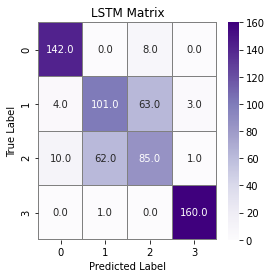

In [ ]:
cm = confusion_matrix(testY_new,pred_lstm)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("LSTM Matrix")
plt.show()

In [ ]:
f1_score(pred_lstm,testY_new)

              precision    recall  f1-score   support

     Class 0       0.91      0.95      0.93       150
     Class 1       0.62      0.59      0.60       171
     Class 2       0.54      0.54      0.54       158
     Class 3       0.98      0.99      0.98       161

    accuracy                           0.76       640
   macro avg       0.76      0.77      0.76       640
weighted avg       0.76      0.76      0.76       640



**Structured Noise**

In [ ]:
# independently for each modality, each time step is chosen with probability p 
# at which all feature dimensions are dropped
def structured_drop(data, p):
    for i in range(len(data)):
        #for time in range(len(data[i])):
            t = np.random.random_sample()
            print(t)
            print(p)
            print(data[i].shape)
            if t < p:
              data[i] = np.zeros(data[i].shape)
    return data

In [ ]:
structureddrop = structured_drop(testAttrX_new,0.45)

0.659971013287382
0.45
(7, 1)
0.39257234260360485
0.45
(7, 1)
0.5149685188926978
0.45
(7, 1)
0.85888039546776
0.45
(7, 1)
0.9363776721525042
0.45
(7, 1)
0.02954521092641238
0.45
(7, 1)
0.3031784305029951
0.45
(7, 1)
0.2984785773160268
0.45
(7, 1)
0.27018207829203567
0.45
(7, 1)
0.24893843675300564
0.45
(7, 1)
0.6984412080338472
0.45
(7, 1)
0.1816109446111236
0.45
(7, 1)
0.6895954606155241
0.45
(7, 1)
0.022443486578432426
0.45
(7, 1)
0.8449832761225189
0.45
(7, 1)
0.03224638985364214
0.45
(7, 1)
0.8831118540573465
0.45
(7, 1)
0.3474279630297247
0.45
(7, 1)
0.34781412869478634
0.45
(7, 1)
0.28298841936396424
0.45
(7, 1)
0.88093011094426
0.45
(7, 1)
0.363469509079289
0.45
(7, 1)
0.19373810471271125
0.45
(7, 1)
0.9711527714411365
0.45
(7, 1)
0.6240735762789803
0.45
(7, 1)
0.5417767423083598
0.45
(7, 1)
0.3111325968227946
0.45
(7, 1)
0.3702008245761338
0.45
(7, 1)
0.12202713906306228
0.45
(7, 1)
0.0550511002316203
0.45
(7, 1)
0.9450679074783259
0.45
(7, 1)
0.031137214486650522
0.45
(7, 1)
0

In [ ]:
np.where(np.all(structureddrop == 0, axis=1))

(array([  1,   5,   6,   7,   8,   9,  11,  13,  15,  17,  18,  19,  21,
         22,  26,  27,  28,  29,  31,  33,  34,  35,  37,  40,  41,  44,
         45,  48,  49,  50,  51,  54,  59,  60,  61,  63,  64,  66,  69,
         72,  73,  76,  77,  78,  79,  82,  83,  84,  85,  86,  88,  89,
         90,  91,  94,  95,  96,  97, 100, 101, 102, 104, 105, 106, 108,
        109, 110, 113, 115, 116, 119, 121, 122, 123, 124, 126, 128, 131,
        132, 133, 134, 135, 136, 138, 144, 146, 147, 150, 151, 153, 155,
        157, 158, 159, 160, 161, 165, 166, 170, 174, 175, 176, 178, 183,
        184, 185, 188, 189, 192, 193, 199, 200, 201, 203, 204, 205, 206,
        207, 208, 211, 214, 216, 218, 220, 223, 225, 226, 227, 228, 230,
        231, 235, 236, 239, 240, 246, 249, 251, 256, 258, 265, 266, 270,
        271, 272, 273, 276, 278, 285, 287, 290, 291, 295, 297, 299, 300,
        304, 310, 315, 316, 317, 320, 322, 324, 328, 332, 333, 334, 336,
        337, 339, 341, 342, 347, 348, 349, 352, 353

In [ ]:
result=model_lstm01.predict([structureddrop])
pred_lstm = np.argmax(result, axis=-1)
compare=pd.DataFrame({'Actual':testY_new,'Predicted_Fusion':pred_lstm})

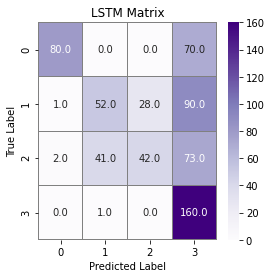

In [ ]:
cm = confusion_matrix(testY_new,pred_lstm)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("LSTM Matrix")
plt.show()

In [ ]:
f1_score(pred_lstm,testY_new)

              precision    recall  f1-score   support

     Class 0       0.96      0.53      0.69       150
     Class 1       0.55      0.30      0.39       171
     Class 2       0.60      0.27      0.37       158
     Class 3       0.41      0.99      0.58       161

    accuracy                           0.52       640
   macro avg       0.63      0.52      0.51       640
weighted avg       0.62      0.52      0.50       640



**Random Noise**

In [ ]:
def apply_random_noise(self, image, percent=30):
        """Apply random noise on an image (not used)"""
        random = np.random.randint(0, 100)
        if random < percent:
            image = random_noise(image)
        return image

**32x32 Normal Fusion**